In [1]:
'''                                       Rainfall Weather Forecasting
Project Description
Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given 
location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere 
at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather 
observations of different locations in Australia

Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

   [PERFORMED ACTIONS]                                                                    [COLUMN NUMBER]
   
* IMPORTING LIBRARIES-----------------------------------------------------------------------   [2] 
* IMPORTING PROJECT FILE (.csv)                                                                [3]
* COLUMN DISCRIPTIION ----------------------------------------------------------------------   [5]                                                       
* REPLACING COLUMN NAME WITH SMALL LATTERS (if required)                                       [8]
* FINDING SHAPE OF DATASET (df.shape())  ---------------------------------------------------   [10]                                                
* FINDING INFORMATION OF DATASET (df.info())                                                   [12]
* CHECKING NULL VALUES ---------------------------------------------------------------------   [13]                                                                   
* RERPLACING NULL VALUES (with SIMPLE-IMPUTER)                                                 [17]
* REMOVING IRRELEVANT COLUMNS (if required)-------------------------------------------------   []
* APPLYING UNIVARIATE ANALYSIS                                                                 [30]
* APPLYING BIVARIATE & MULTI-VARIATE ANALYSIS-----------------------------------------------   [111]
* APPLYING ENCODING TECHNIQUES                                                                 [142]
* FINDING CORRELATION-----------------------------------------------------------------------   [155]
* ANALYSING OUTLIERS                                                                           [161]
* REMOVING OF OUTLIERS----------------------------------------------------------------------   [167]
* CHECKING REMOVAL OF OUTLIERS                                                                 [174]
* CHECKING SKEWNESS-------------------------------------------------------------------------   [189]
* DIVIDING DATA INTO INDEPENDENT & TARGET                                                      [191]
* IMPORTING LIBRARIES FOR APPLYING SCALING TECHNIQUES---------------------------------------   [200]
* APPLYING SCALING TECHNIQUES FOR CONDITION-1 (where 'RainTomorrow' is Target Column)          [203]
* APPLYING SCALING TECHNIQUES FOR CONDITION-2 (where 'RAINFALL' is Target Column)-----------   [215]
* FINDING MULTI-COLLINEARITY                                                                   [227]
* CALCULATING VIF FOR CONDITION-1-----------------------------------------------------------   [229]
* CALCULATING VIF FOR CONDITION-2                                                              [237]
* APPLYING RESAMPLING TECHNIQUE (SMOTE- FOR CONDITION-1)------------------------------------   [245]
* APPLYING ML-CLASSIFICATION MODELS (FOR CONDITION-1)                                          [258]
* Applying Train-Test-Split-----------------------------------------------------------------   [259]
* Applying GRID-SEARCH-CV for Model                                                            [273]
* APPLYING FINAL MODEL----------------------------------------------------------------------   [281]
* CHECKING SAMPLES                                                                             [290]
* SAVING MODEL INTO .pkl File (FOR CONDITION-1)---------------------------------------------   [294]
* APPLYING ML-REGRESSION MODEL (FOR CONDITION-2)                                               [296]
* APPLYING FINAL MODEL----------------------------------------------------------------------   [307]
* SAVING MODEL INTO .pkl File (FOR CONDITION-2)                                                [308]
* OVERALL SUMMARY / CONCLUSION -------------------------------------------------------------   [311]

'''

'                                       Rainfall Weather Forecasting\nProject Description\nWeather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given \nlocation and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere \nat a given place and using meteorology to project how the atmosphere will change.\nRain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather \nobservations of different locations in Australia\n\nHere, predict two things:\n \n1. Problem Statement: \na) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.\nb)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.\n\n* COLUMN DISCRIPTIION\n* REPLACING COLUMN NAME WITH SMALL LATTERS (if required)\n* FINDING SHAPE OF DATASET (

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv ('main_weather.csv',parse_dates=["Date"])
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
pd.set_option('display.max_columns', None)
df.head(5)

# here below we can see the all 40 columns in the details.

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
'''
Date  - The date of observation
Location  -The common name of the location of the weather station
MinTemp  -The minimum temperature in degrees celsius
MaxTemp -The maximum temperature in degrees celsius
Rainfall  -The amount of rainfall recorded for the day in mm
Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
Sunshine  -The number of hours of bright sunshine in the day.
WindGustDir- The direction of the strongest wind gust in the 24 hours to midnight
WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
WindDir9am -Direction of the wind at 9am
WindDir3pm -Direction of the wind at 3pm
WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
Humidity9am -Humidity (percent) at 9am
Humidity3pm -Humidity (percent) at 3pm
Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
Cloud9am - Fraction of sky obscured by cloud at 9am. 
Cloud3pm -Fraction of sky obscured by cloud 
Temp9am-Temperature (degrees C) at 9am
Temp3pm -Temperature (degrees C) at 3pm
RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

'''

'\nDate  - The date of observation\nLocation  -The common name of the location of the weather station\nMinTemp  -The minimum temperature in degrees celsius\nMaxTemp -The maximum temperature in degrees celsius\nRainfall  -The amount of rainfall recorded for the day in mm\nEvaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am\nSunshine  -The number of hours of bright sunshine in the day.\nWindGustDir- The direction of the strongest wind gust in the 24 hours to midnight\nWindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight\nWindDir9am -Direction of the wind at 9am\nWindDir3pm -Direction of the wind at 3pm\nWindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am\nWindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm\nHumidity9am -Humidity (percent) at 9am\nHumidity3pm -Humidity (percent) at 3pm\nPressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am\nPressure3pm -Atmospheric pressu

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
column = ['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windSpeed9am', 'windSpeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'raintomorrow']

In [8]:
df.columns=column

In [9]:
df.columns
# here below we put all column names in small latter for convinience.

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windSpeed9am', 'windSpeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'raintomorrow'],
      dtype='object')

In [10]:
df.shape
# there are 8,425 rows and 23 columns are present in our dataset.

(8425, 23)

In [11]:
df.dtypes
# here below we find that there are 2 types of data is present inside our dataset i.e = 'object' & 'float' 

date             datetime64[ns]
location                 object
mintemp                 float64
maxtemp                 float64
rainfall                float64
evaporation             float64
sunshine                float64
windgustdir              object
windgustspeed           float64
winddir9am               object
winddir3pm               object
windSpeed9am            float64
windSpeed3pm            float64
humidity9am             float64
humidity3pm             float64
pressure9am             float64
pressure3pm             float64
cloud9am                float64
cloud3pm                float64
temp9am                 float64
temp3pm                 float64
raintoday                object
raintomorrow             object
dtype: object

In [12]:
df.info()

# there may presence of NULL VLAUES in our dataset.
# no. of columns with 'object' datatype is = 07
# no. of columns with 'float' datatype is = 16

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           8425 non-null   datetime64[ns]
 1   location       8425 non-null   object        
 2   mintemp        8350 non-null   float64       
 3   maxtemp        8365 non-null   float64       
 4   rainfall       8185 non-null   float64       
 5   evaporation    4913 non-null   float64       
 6   sunshine       4431 non-null   float64       
 7   windgustdir    7434 non-null   object        
 8   windgustspeed  7434 non-null   float64       
 9   winddir9am     7596 non-null   object        
 10  winddir3pm     8117 non-null   object        
 11  windSpeed9am   8349 non-null   float64       
 12  windSpeed3pm   8318 non-null   float64       
 13  humidity9am    8366 non-null   float64       
 14  humidity3pm    8323 non-null   float64       
 15  pressure9am    7116 n

=======  CHECKING NULL VALUES =============

In [13]:
df.isnull().sum()

# here below we can find the presence of null vlaues in our dataset, every column is having NULL VALUE except DATE & LOCATION.
# EVEN TARGET COLUMNS ARE ALSO HAVING NULL VALUES = "RainTomorrow" & "Rainfall"

date                0
location            0
mintemp            75
maxtemp            60
rainfall          240
evaporation      3512
sunshine         3994
windgustdir       991
windgustspeed     991
winddir9am        829
winddir3pm        308
windSpeed9am       76
windSpeed3pm      107
humidity9am        59
humidity3pm       102
pressure9am      1309
pressure3pm      1312
cloud9am         2421
cloud3pm         2455
temp9am            56
temp3pm            96
raintoday         240
raintomorrow      239
dtype: int64

In [14]:
# CHECKING NUL VALUES WITH THE HELP OF HEATMAP :-

<AxesSubplot:>

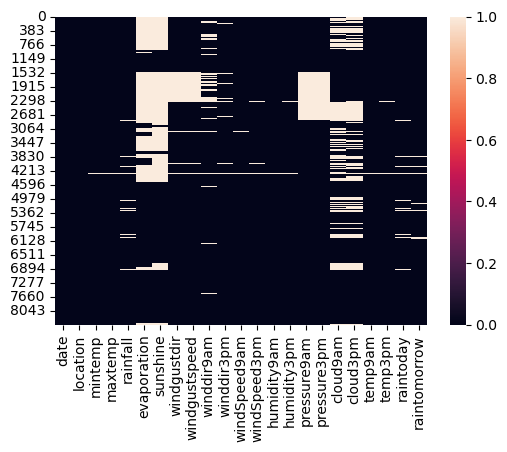

In [15]:
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull())

# Here inthe heatmap also we can clearly find the presence of null values inside the dataframe.

In [16]:
'''So from above analysis we can find that there is a presence of NULL VALUES in our dataset. so we have to replace them with
the appropriate value. '''

'So from above analysis we can find that there is a presence of NULL VALUES in our dataset. so we have to replace them with\nthe appropriate value. '

=========== Replacing Null Values =============

In [17]:
df.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windSpeed9am', 'windSpeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'raintomorrow'],
      dtype='object')

In [18]:
for i in df.columns:
    null_positions = np.where(df[i].isnull())[0]
    print("Null positions in column:", null_positions)

# here from the above we can find that the NULL-VALUES are present in the column at what positions / index number.
# so firt we have to check them...

Null positions in column: []
Null positions in column: []
Null positions in column: [ 284  444  453  459  612 1189 1518 1562 1563 1565 1597 1612 1658 1661
 1667 1685 1697 1717 1722 1736 1737 1738 1739 1756 1765 1813 1814 1815
 1816 1817 1818 1827 1837 1851 1928 1954 1960 1975 1987 2033 2069 2082
 2111 2127 2134 2163 2164 2165 2166 2167 2168 2175 2199 2200 2201 2208
 2228 2235 2247 2273 2282 2289 2291 2297 2902 3437 3438 3439 3614 3754
 4289 4290 4291 4466 6495]
Null positions in column: [ 283  452  455  458  464 1188 1561 1562 1611 1657 1716 1725 1735 1736
 1737 1738 1755 1764 1812 1813 1814 1815 1816 1817 1826 1836 1850 1913
 1953 1986 2068 2081 2126 2133 2162 2163 2164 2165 2166 2167 2174 2198
 2199 2207 2227 2234 2286 2288 2290 2303 2304 2319 3437 3438 3613 4289
 4290 4465 6495 8424]
Null positions in column: [  15  284  436  438  444  453  456  465  612  929 1812 1813 1814 1815
 1816 1817 1818 2069 2164 2165 2166 2167 2199 2200 2460 2506 2679 2825
 2826 2839 2840 2846 2847 2848 297

In [19]:
''' so upto here from the above analysis we can find that the columns in which NULL VLAUES are present are all in "Folat"
datatypes, except "windgudtdir", "winddir9am", "winddir3pm", "raintoday", & "raintomorrow" are in OBJECT datatype.'''

' so upto here from the above analysis we can find that the columns in which NULL VLAUES are present are all in "Folat"\ndatatypes, except "windgudtdir", "winddir9am", "winddir3pm", "raintoday", & "raintomorrow" are in OBJECT datatype.'

============ To Replace the Null-Values from the dataset, we have to import Simple IMputer Librarie.========

In [20]:
from sklearn.impute import SimpleImputer

In [21]:
imp = SimpleImputer(strategy="mean")
imp1 = SimpleImputer(strategy="most_frequent")

# Can only use these strategies: ['mean', 'median', 'most_frequent', 'constant']  got strategy=mostfrequent
# here for the 'flaot' datatype columns, we can replace the NULL VALUES with the MEAN of that column.
# and for 'string/object' datatype columns, we can replace the NULL VALUES with "MODE/ MOST FREQUENT" of that column.
#  we can replace the null values with the 'MEAN' values present in the columns.
#  so the null values can be replaced by the MEAN values ARRIVED in the column.

In [22]:
df.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windSpeed9am', 'windSpeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'raintomorrow'],
      dtype='object')

In [23]:
float_nan_columns = ['mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine','windgustspeed','windSpeed9am', 'windSpeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm']

In [24]:
object_nan_columns = ['windgustdir', 'winddir9am', 'winddir3pm','raintoday', 'raintomorrow']

In [25]:
for i in float_nan_columns:
    df[i]= imp.fit_transform(df[i].values.reshape(-1,1))
    
# Here we are Replacing all Nan Values Column Together with their Mean of the columns, by using "FOR LOOP"

In [26]:
for i in object_nan_columns:
    df[i]= imp1.fit_transform(df[i].values.reshape(-1,1))
    
# Here we are Replacing all Nan Values Column Together with their Mode/Most Frequent of the columns, by using "FOR LOOP"

In [27]:
df.isnull().sum()

# here below we can succesfully replaced all the null values with their appropriate substitues.

date             0
location         0
mintemp          0
maxtemp          0
rainfall         0
evaporation      0
sunshine         0
windgustdir      0
windgustspeed    0
winddir9am       0
winddir3pm       0
windSpeed9am     0
windSpeed3pm     0
humidity9am      0
humidity3pm      0
pressure9am      0
pressure3pm      0
cloud9am         0
cloud3pm         0
temp9am          0
temp3pm          0
raintoday        0
raintomorrow     0
dtype: int64

In [28]:
df

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,windSpeed9am,windSpeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,5.389395,7.632205,W,44.000000,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.100000,0.0,5.389395,7.632205,WNW,44.000000,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.700000,0.0,5.389395,7.632205,WSW,46.000000,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.000000,0.0,5.389395,7.632205,NE,24.000000,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.300000,1.0,5.389395,7.632205,W,41.000000,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.400000,0.0,5.389395,7.632205,E,31.000000,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.300000,0.0,5.389395,7.632205,NNW,22.000000,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.900000,0.0,5.389395,7.632205,N,37.000000,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.000000,0.0,5.389395,7.632205,SE,28.000000,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,No,No


<AxesSubplot:>

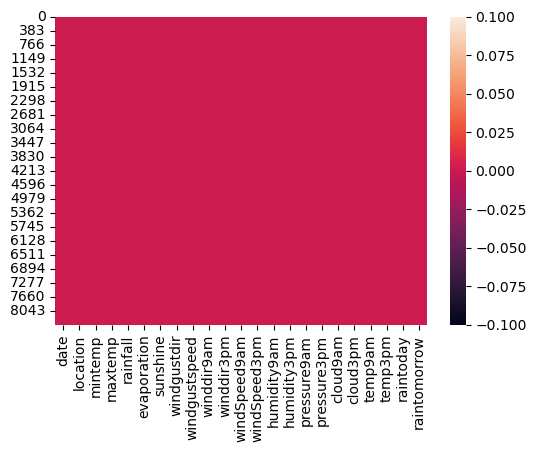

In [29]:
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull())

# with the help of heatmap also we can clearly seen absence of  NULL VALUES , in the following columns of dataset.

                    ========================  REPLACED NULL VALUES SUCCESSFULLY =========================

=========UNIVARIATE ANALYSIS (Analysing each column individually) ===================================================

In [30]:
df.shape

(8425, 23)

In [31]:
df.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windSpeed9am', 'windSpeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'raintomorrow'],
      dtype='object')

1)==> Analysing Date Column

In [32]:
df['date'].nunique()
# out of total =8425 rows only 3004 dates are unique in the column.

3004

In [33]:
df['date'].min()

Timestamp('2008-12-01 00:00:00')

In [34]:
df['date'].max()

Timestamp('2017-06-25 00:00:00')

In [35]:
'''
CONCLUSION :- That means tha data given is in between [ 1st-December-2008 -to- 25-June-2017 ]
'''

'\nCONCLUSION :- That means tha data given is in between [ 1st-December-2008 -to- 25-June-2017 ]\n'

2) ==> Analysing Location Column .

In [36]:
df['location'].unique()
# following are the unique names of the locations.

array(['Albury', 'CoffsHarbour', 'Newcastle', 'Penrith', 'Williamtown',
       'Wollongong', 'Melbourne', 'Brisbane', 'Adelaide', 'PerthAirport',
       'Darwin', 'Uluru'], dtype=object)

In [37]:
df['location'].nunique()

# there are 12 numbers of unique loacations are present in the given dataset.

12

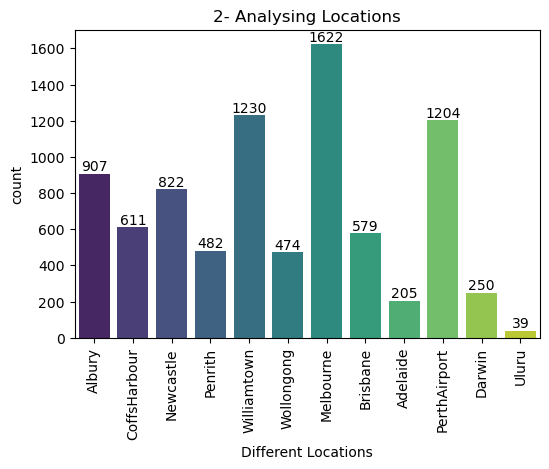

In [38]:
plt.figure(figsize = (6,4), facecolor='white')
plt.title('2- Analysing Locations')
ax = sns.countplot(df['location'],palette='viridis')
ax.bar_label(ax.containers[0])
plt.xlabel('Different Locations', fontsize = 10)
plt.xticks(rotation=90,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.show()

In [39]:
''' Here in the above countplot we found that the Maximum Density/Counts is at    MelBourn > WilliamTown > PerthAirport
                                                                                   (1622)       (1230)       (1204)
                                                                                   
                                            the 3 Minimum Density/Counts is at    Uluru    < Adelaide    < Darwin
                                                                                   (39)       (205)         (250) 
'''

' Here in the above countplot we found that the Maximum Density/Counts is at    MelBourn > WilliamTown > PerthAirport\n                                                                                   (1622)       (1230)       (1204)\n                                                                                   \n                                            the 3 Minimum Density/Counts is at    Uluru    < Adelaide    < Darwin\n                                                                                   (39)       (205)         (250) \n'

3) Analysing Minimum & Maximum Temperature ==>

In [40]:
print(df['mintemp'].nunique())
print(df['maxtemp'].nunique())

# Min-Temp. ==> out 8425 values , there are 286 Unique Values of 'Minimum Temperature' are present in the column.
# Max-Temp. ==> out of 8425 values, there are 332 Unique Values of 'Maximum Temperature' are present in the column.

286
332


In [41]:
print (df['mintemp'].min())
print (df['mintemp'].max())
print (df['mintemp'].mean())

# the LOWEST VALUE of MINMUM TEMPERATURE RECORDED is = -2.0 °C
#  the Highest Minimum Temperature Recorded is = 28.5 °C
#  the MEAN of the total Values Present inside the column of Minimum Temperature is = 13.19 °C

-2.0
28.5
13.193305389221567


In [42]:
print (df['maxtemp'].min())
print (df['maxtemp'].max())
print (df['maxtemp'].mean())

# the LOWEST VALUE of MAXIMUM TEMPERATURE RECORDED is = 8.2 °C
#  the Highest MAXIMUM Temperature Recorded is = 45.5 °C
#  the MEAN of the total Values Present inside the column of MAXIMUM Temperature is = 23.85 °C

8.2
45.5
23.859976090854737


In [43]:
'''
CONCLUSION ==
Minimum (lowest) to Maximum (highest) Temperature of Enviornment during the Period is = -2.0 °C  -to-  45.5 °C

that means in WINTERS the temperature goes very down till (-2.0 °C) VERYMUCH COLDEST IN WINTERS
and in SUMMERS the temperature goes very high till (45.5 °C) VERYMUCH HOTTEST IN SUMMERS.

REASON- I THINK ITS ALL HAPPENING DUE TO GLOBAL WARMING (may be)
'''

'\nCONCLUSION ==\nMinimum (lowest) to Maximum (highest) Temperature of Enviornment during the Period is = -2.0 °C  -to-  45.5 °C\n\nthat means in WINTERS the temperature goes very down till (-2.0 °C) VERYMUCH COLDEST IN WINTERS\nand in SUMMERS the temperature goes very high till (45.5 °C) VERYMUCH HOTTEST IN SUMMERS.\n\nREASON- I THINK ITS ALL HAPPENING DUE TO GLOBAL WARMING (may be)\n'

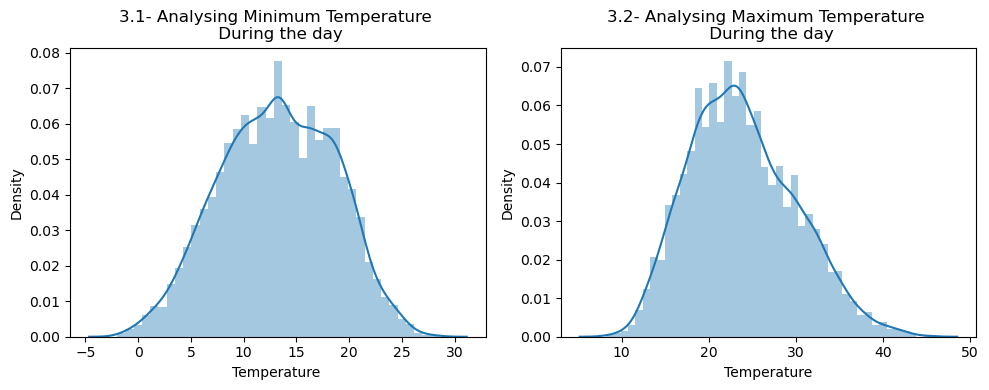

In [44]:
plt.figure(figsize = (10,4), facecolor='white')

plt.subplot (1,2,1)
plt.title('3.1- Analysing Minimum Temperature \n During the day')
sns.distplot(df['mintemp'])
plt.xlabel('Temperature ', fontsize = 10)
plt.xticks(rotation=0,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')

plt.subplot (1,2,2)
plt.title('3.2- Analysing Maximum Temperature \n During the day')
sns.distplot(df['maxtemp'])
plt.xlabel('Temperature', fontsize = 10)
plt.xticks(rotation=0,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')

plt.tight_layout()
plt.show()

In [45]:
''' CONCLUSION =

    Here from the above Histogram we find that most the time during the day, Minimum Temperature is lying in b/w 10-15 °C,
    therefor above we also found the MEAN /AVERAGE of Minimum temperature is = (13.19°C)
    * The Lowest Minimum Temperature on any day is = -2.0 °C
    
    And most of the time the Maxium Temperature during the day is lying in b/w =  18 -25 °C,
    therefore above we also calculate the MEAN /AVERAGE of Maximum temperature is = (23.85 °C)
    * The Highest Maximum Temperature on any day is = 45.5 °C
    '''

' CONCLUSION =\n\n    Here from the above Histogram we find that most the time during the day, Minimum Temperature is lying in b/w 10-15 °C,\n    therefor above we also found the MEAN /AVERAGE of Minimum temperature is = (13.19°C)\n    * The Lowest Minimum Temperature on any day is = -2.0 °C\n    \n    And most of the time the Maxium Temperature during the day is lying in b/w =  18 -25 °C,\n    therefore above we also calculate the MEAN /AVERAGE of Maximum temperature is = (23.85 °C)\n    * The Highest Maximum Temperature on any day is = 45.5 °C\n    '

4) Analysing Rainfall ==>

In [46]:
df['rainfall'].nunique()

# here the data of rainfall present in (mm)
# out of total 8425 vlaues there are 251 unique values are present in the given dataset.

251

In [47]:
print (df['rainfall'].min())
print (df['rainfall'].max())
print (df['rainfall'].mean())

'''
the LOWEST VALUE of RAINFALL RECORDED is = 0.00 MM 
the Highest RAINFALL during DAY Recorded is = 371 MM (14.60 Inches rainfall in a SINGLE DAY, it is a very HUGE AMOUNT) 
the MEAN/ AVERAGE of the total RAINFALL DATA Present inside the column of RAINFALL is = 2.80 MM '''

0.0
371.0
2.805913255956055


'\nthe LOWEST VALUE of RAINFALL RECORDED is = 0.00 MM \nthe Highest RAINFALL during DAY Recorded is = 371 MM (14.60 Inches rainfall in a SINGLE DAY, it is a very HUGE AMOUNT) \nthe MEAN/ AVERAGE of the total RAINFALL DATA Present inside the column of RAINFALL is = 2.80 MM '

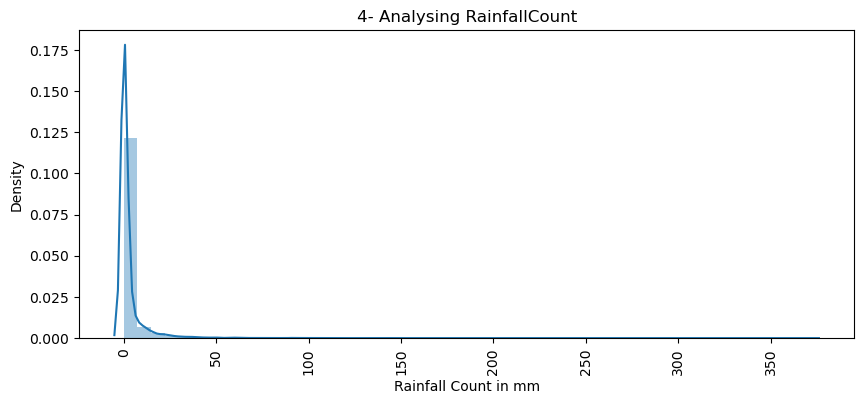

' Conclusion - Here in the below histogram we find that MAXIMUM number of Counts are are lying in between 0-10 mm\n                 that means at most of the time the rainfall is in b/w 0-10 mm only.\n                 but we are also having highest values till above = 350 mm\n                 that means on some of few days the rainfall is highest till 370 mm in a day'

In [48]:
plt.figure(figsize = (10,4), facecolor='white')
plt.title('4- Analysing RainfallCount')
sns.distplot(df['rainfall'])
plt.xlabel('Rainfall Count in mm', fontsize = 10)
plt.xticks(rotation=90,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.show()

''' Conclusion - Here in the below histogram we find that MAXIMUM number of Counts are are lying in between 0-10 mm
                 that means at most of the time the rainfall is in b/w 0-10 mm only.
                 but we are also having highest values till above = 350 mm
                 that means on some of few days the rainfall is highest till 370 mm in a day'''

5) Analysing Evopration ==>

In [49]:
# Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

In [50]:
df['evaporation'].nunique()

117

In [51]:
print (df['evaporation'].min())
print (df['evaporation'].max())
print (df['evaporation'].mean())

# the minimum evaporation during a day is 0.0 mm
# the Maximum evaporation during a day is 145 mm
# the mean / average evaporation of a any is 5.38 mm

0.0
145.0
5.389395481375852


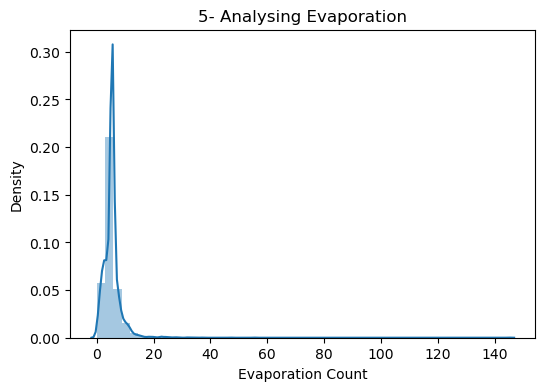

'Here in the below plot we can clearly find that the Highest Numbers of Evaporation count is lying in between 0-20 on \n   most of the days .\n   The Maximum value of Evaporation is highest upto =  more then 140 (145) '

In [52]:
plt.figure(figsize = (6,4), facecolor='white')
plt.title('5- Analysing Evaporation')
sns.distplot(df['evaporation'])
plt.xlabel('Evaporation Count', fontsize = 10)
plt.xticks(rotation=0,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.show()

'''CONCLUSION -Here in the below plot we can clearly find that the Highest Numbers of Evaporation count is lying in 
               between 0-20 on most of the days .
               The Maximum value of Evaporation is highest upto =  more then 140 (145) '''

6) Analysing Sunshine ==>

In [53]:
# Sunshine  -The number of hours of bright sunshine in the day.

In [54]:
df['sunshine'].nunique()

# out of 8425 there are 141 unique values are present in the column.

141

In [55]:
print (df['sunshine'].min())
print (df['sunshine'].max())
print (df['sunshine'].mean())

# the minimum Sunshine hours during a day is 0.0 hours
# the Maximum Sunshine hours during a day is 13.9 hours
# the mean / average Sunshine hours of a any is 7.63 hours

0.0
13.9
7.63220491988277


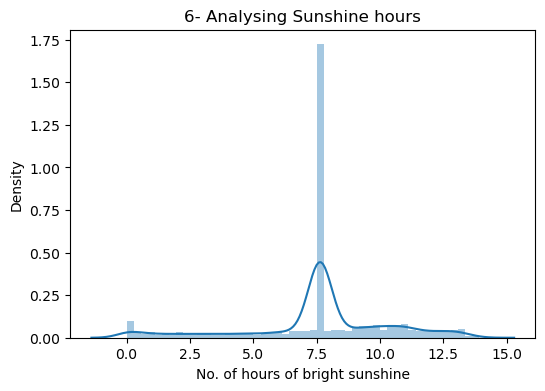

' here from the above plot we can find that the number of counts of Bright Sunshine Hours are highest in between 7 - 8 hours'

In [56]:
plt.figure(figsize = (6,4), facecolor='white')
plt.title('6- Analysing Sunshine hours')
sns.distplot(df['sunshine'])
plt.xlabel('No. of hours of bright sunshine', fontsize = 10)
plt.xticks(rotation=0,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.show()

'''CONCLUSIION-  here from the above plot we can find that the number of counts of Bright Sunshine Hours are 
                 highest in between 7 - 8 hours'''

7) Analysing Strongest Wind Direction ==>

In [57]:
# WindGustDir- The direction of the strongest wind gust in the 24 hours to midnight

In [58]:
df['windgustdir'].nunique()

16

In [59]:
df['windgustdir'].unique()
# E= East,  W=West,  N=North,  S=South

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [60]:
df['windgustdir'].value_counts()
# Most oF the times the strongest wind direction is of N-North Winds
# then SSE- South SouthEast & S-South

N      1704
SSE     578
S       577
SW      572
E       557
WNW     531
W       507
WSW     504
SE      484
ENE     415
SSW     396
NW      383
NE      353
NNE     343
ESE     302
NNW     219
Name: windgustdir, dtype: int64

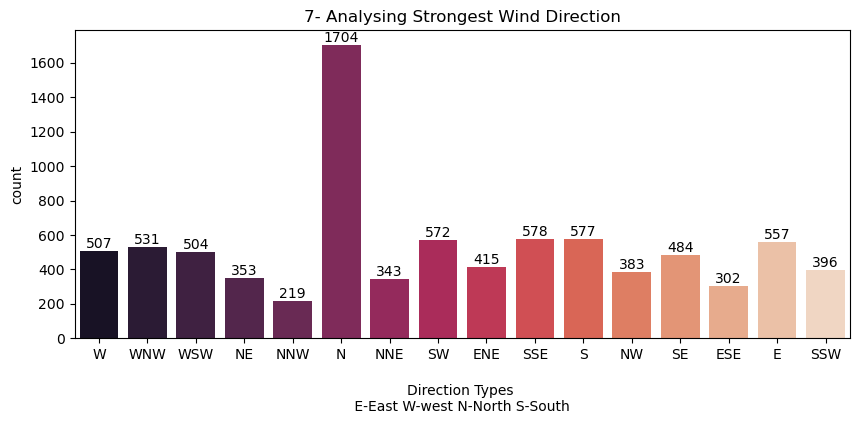

' Here in the below plot we find that Highest Number of Counts - 1704 is at N-North Direction.\n    that means at most of the time during the day, the direction of wind gust is in N-NORTH DIRECTION\n'

In [61]:
plt.figure(figsize = (10,4), facecolor='white')
plt.title('7- Analysing Strongest Wind Direction')
ax = sns.countplot(df['windgustdir'],palette='rocket')
ax.bar_label(ax.containers[0])
plt.xlabel('\nDirection Types \n E-East W-west N-North S-South ', fontsize = 10)
plt.xticks(rotation=0,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.show()

''' CONCLUSION- Here in the below plot we find that Highest Number of Counts - 1704 is at N-North Direction.
                that means at most of the time during the day, the direction of wind gust is in N-NORTH DIRECTION
'''

8) Analysing Speed (km/hr) of Strongest Wind

In [62]:
# WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

In [63]:
df['windgustspeed'].nunique()
# out of 8425 values there are 53 unique speed values are present inside the column.

53

In [64]:
print(df['windgustspeed'].min(),'km/hr')
print(df['windgustspeed'].max(),'km/hr')
print(df['windgustspeed'].mean(),'km/hr')

''' Minimum speed of Strog Wind Gust is = 7.0 km/hr during any day
    Maximum speed of Strog Wind Gust is = 107.0 km/hr during any day
    Mean / Average speed of Strog Wind Gust is = 40.17 km/hr during any day'''

7.0 km/hr
107.0 km/hr
40.17446865751997 km/hr


' Minimum speed of Strog Wind Gust is = 7.0 km/hr during any day\n    Maximum speed of Strog Wind Gust is = 107.0 km/hr during any day\n    Mean / Average speed of Strog Wind Gust is = 40.17 km/hr during any day'

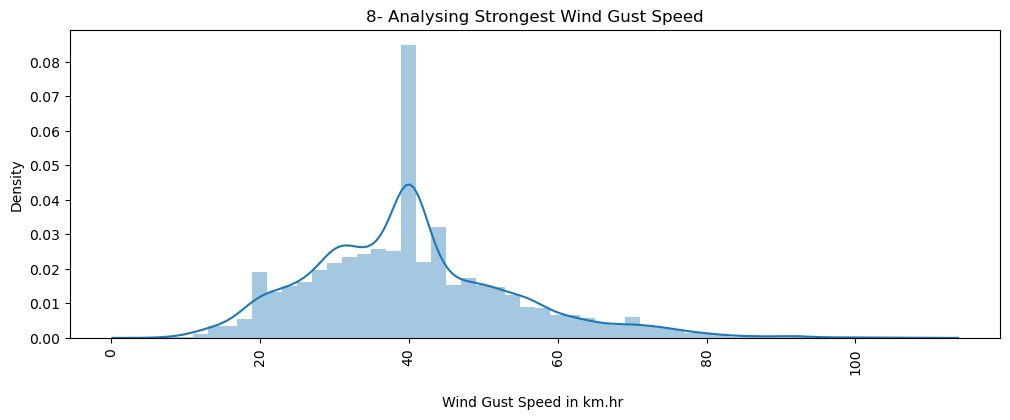

' Minimum speed of Strog Wind Gust is = 7.0 km/hr during any day\n    Maximum speed of Strog Wind Gust is = 107.0 km/hr during any day\n    Maximum Density of speed of Strog Wind Gust is in b/w = 40 - 45  km/hr during any day'

In [65]:
plt.figure(figsize = (12,4), facecolor='white')
plt.title('8- Analysing Strongest Wind Gust Speed')
sns.distplot(df['windgustspeed'])
# ax.bar_label(ax.containers[0])
plt.xlabel('\nWind Gust Speed in km.hr ', fontsize = 10)
plt.xticks(rotation=90,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.show()

'''CONCLUSION-  Minimum speed of Strog Wind Gust is = 7.0 km/hr during any day
                Maximum speed of Strog Wind Gust is = 107.0 km/hr during any day
                Maximum Density of speed of Strog Wind Gust is in b/w = 40 - 45  km/hr during any day'''

9) Analysing Wind Direction at 9 am & 3 pm ==>

In [66]:
# WindDir9am -Direction of the wind at 9am
# WindDir3pm -Direction of the wind at 3pm


In [67]:
print(df['winddir9am'].nunique())
print(df['winddir3pm'].nunique())


16
16


In [68]:
df['winddir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', 'N', 'SSW', 'WSW',
       'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [69]:
df['winddir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', 'NE'], dtype=object)

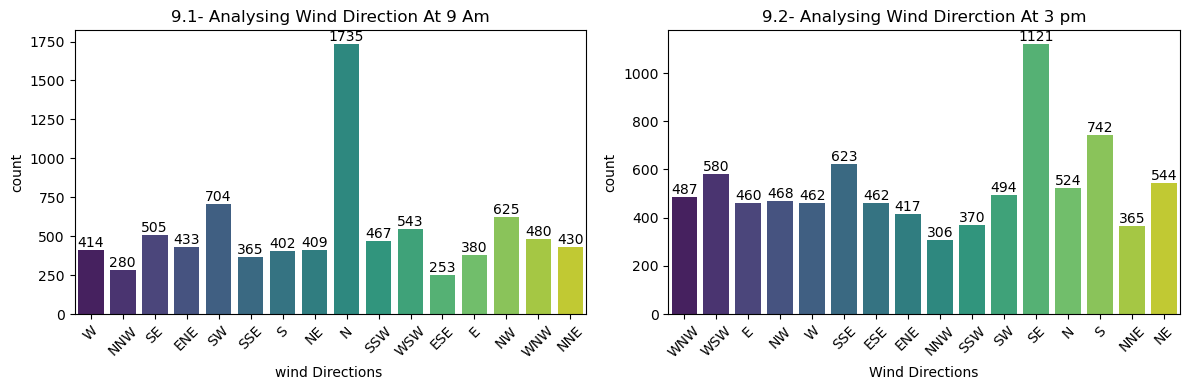

In [70]:
plt.figure(figsize = (12,4), facecolor='white')

plt.subplot (1,2,1)
plt.title('9.1- Analysing Wind Direction At 9 Am')
ax= sns.countplot(df['winddir9am'],palette='viridis')
ax.bar_label(ax.containers[0])
plt.xlabel('wind Directions ', fontsize = 10)
plt.xticks(rotation=45,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')

plt.subplot (1,2,2)
plt.title('9.2- Analysing Wind Direrction At 3 pm')
ax= sns.countplot(df['winddir3pm'],palette='viridis')
ax.bar_label(ax.containers[0])
plt.xlabel('Wind Directions', fontsize = 10)
plt.xticks(rotation=45,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')


plt.tight_layout()
plt.show()

In [71]:
'''Here when we comapre both above plots then we found following thind :- 

1- Overall wind directions in all directions is Littlebit higher at 3pm as comapred to 9am.
   (that means the speed of wind is higher at 3pm compared to 9am)
   
2- The total Number of day count of wind in "N-NORTH DIRECTION" at 9am is Highest = 1735 days
   (that means from total days , the wind is floating in N-NORTH DIRECTION on 1735 days)
   
3- Where as at 3pm the wind is floating in SE-SOUTH EAST DIRECTION on Highest days = 1121 days
   
   
CONCLUSION -  During the period the direction of wind at 9am (morning time) is N-NORTH DIRECTION on maximum 1735 days.
                                the direction of wind at 3pm (Evening time) is SE_SOUTH EAST DIRECTION on maximum 1121 days.
'''

'Here when we comapre both above plots then we found following thind :- \n\n1- Overall wind directions in all directions is Littlebit higher at 3pm as comapred to 9am.\n   (that means the speed of wind is higher at 3pm compared to 9am)\n   \n2- The total Number of day count of wind in "N-NORTH DIRECTION" at 9am is Highest = 1735 days\n   (that means from total days , the wind is floating in N-NORTH DIRECTION on 1735 days)\n   \n3- Where as at 3pm the wind is floating in SE-SOUTH EAST DIRECTION on Highest days = 1121 days\n   \n   \nCONCLUSION -  During the period the direction of wind at 9am (morning time) is N-NORTH DIRECTION on maximum 1735 days.\n                                the direction of wind at 3pm (Evening time) is SE_SOUTH EAST DIRECTION on maximum 1121 days.\n'

In [72]:
print(df['windSpeed9am'].nunique())
print(df['windSpeed3pm'].nunique())

35
36


10) Analysing Speed of Wind at 9am & 3pm 

In [73]:
# WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
# WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

In [74]:
df.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windSpeed9am', 'windSpeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'raintomorrow'],
      dtype='object')

In [75]:
print(df['windSpeed9am'].nunique())
print(df['windSpeed3pm'].nunique())

# there are 35 & 36 numbers of unique values are present at 9am & 3pm respectively.

35
36


In [76]:
print(df['windSpeed9am'].min(),'km/hr')
print(df['windSpeed9am'].max(),'km/hr','= The Maximum Speed Of Wind At 9am')
print(df['windSpeed9am'].mean(),'km/hr','= The Mean/average speed of wind at 9am')


0.0 km/hr
63.0 km/hr = The Maximum Speed Of Wind At 9am
13.847646424721523 km/hr = The Mean/average speed of wind at 9am


In [77]:
print(df['windSpeed3pm'].min(),'km/hr')
print(df['windSpeed3pm'].max(),'km/hr','= The Maximum Speed Of Wind At 3pm')
print(df['windSpeed3pm'].mean(),'km/hr','= The Mean/average speed of wind at 3pm')


0.0 km/hr
83.0 km/hr = The Maximum Speed Of Wind At 3pm
18.533661937965867 km/hr = The Mean/average speed of wind at 3pm


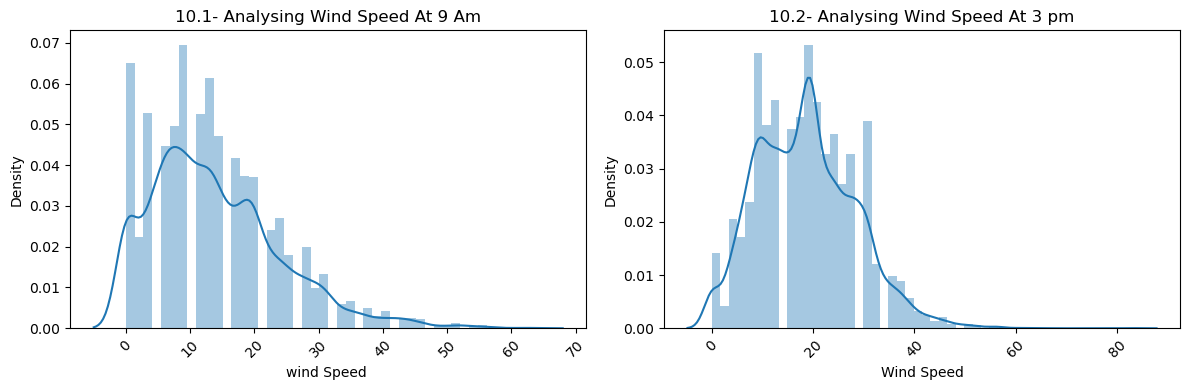

In [78]:
plt.figure(figsize = (12,4), facecolor='white')

plt.subplot (1,2,1)
plt.title('10.1- Analysing Wind Speed At 9 Am')
sns.distplot(df['windSpeed9am'])
# ax.bar_label(ax.containers[0])
plt.xlabel('wind Speed ', fontsize = 10)
plt.xticks(rotation=45,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')

plt.subplot (1,2,2)
plt.title('10.2- Analysing Wind Speed At 3 pm')
sns.distplot(df['windSpeed3pm'])
# ax.bar_label(ax.containers[0])
plt.xlabel('Wind Speed', fontsize = 10)
plt.xticks(rotation=45,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')


plt.tight_layout()
plt.show()

In [79]:
''' Here from the above analysis we can conclude that -
    The Maximum speed of wind is Higher at 3PM (83 km/hr) as comapred to 9AM (63km/hr) 
    The Average Speed of Wind is also Higher at 3PM (18.53 km/hr) as compared to 9AM (13.84 km.hr)
    
    CONCLUSION :- THE SPEED OF WIND IS HIGHER AT EVENING TIME 
'''

' Here from the above analysis we can conclude that -\n    The Maximum speed of wind is Higher at 3PM (83 km/hr) as comapred to 9AM (63km/hr) \n    The Average Speed of Wind is also Higher at 3PM (18.53 km/hr) as compared to 9AM (13.84 km.hr)\n    \n    CONCLUSION :- THE SPEED OF WIND IS HIGHER AT EVENING TIME \n'

9 & 10 ) Analysing Both Wind Directions & Wind Speed Together :-

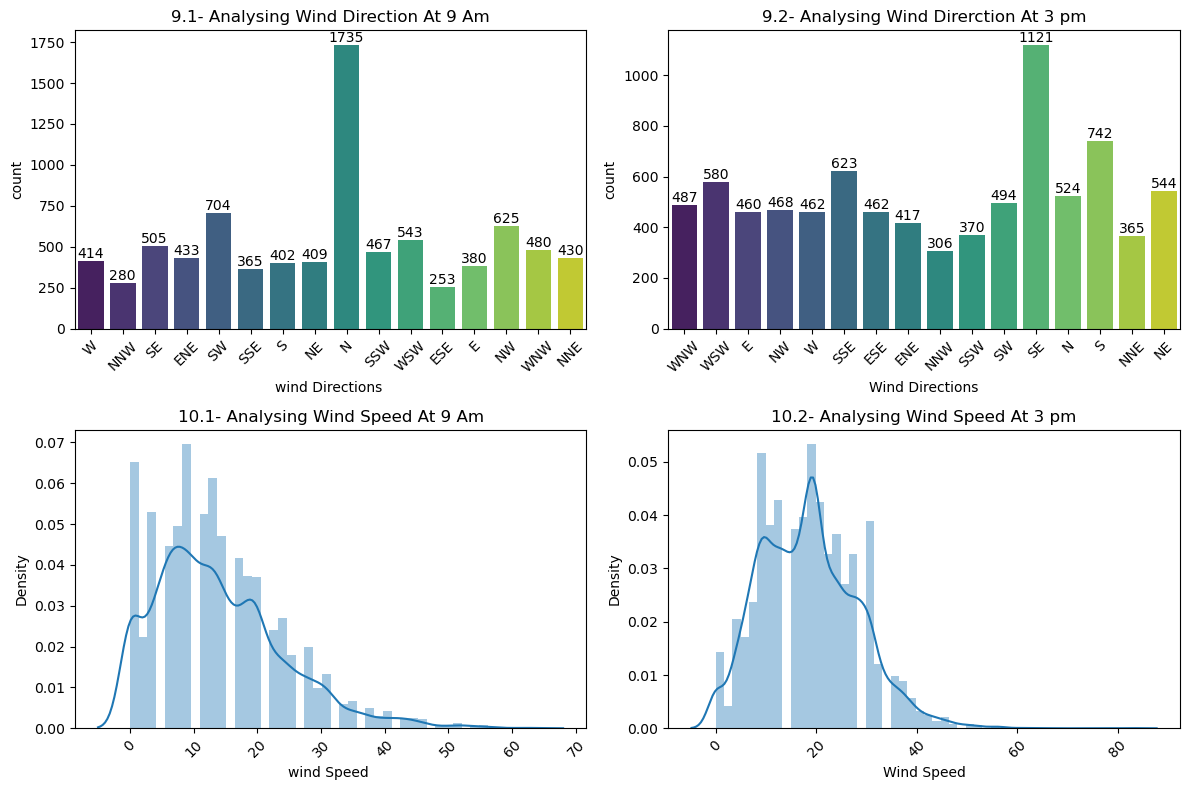

In [80]:
plt.figure(figsize = (12,8), facecolor='white')

plt.subplot (2,2,1)
plt.title('9.1- Analysing Wind Direction At 9 Am')
ax= sns.countplot(df['winddir9am'],palette='viridis')
ax.bar_label(ax.containers[0])
plt.xlabel('wind Directions ', fontsize = 10)
plt.xticks(rotation=45,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')

plt.subplot (2,2,2)
plt.title('9.2- Analysing Wind Direrction At 3 pm')
ax= sns.countplot(df['winddir3pm'],palette='viridis')
ax.bar_label(ax.containers[0])
plt.xlabel('Wind Directions', fontsize = 10)
plt.xticks(rotation=45,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')

plt.subplot (2,2,3)
plt.title('10.1- Analysing Wind Speed At 9 Am')
sns.distplot(df['windSpeed9am'])
# ax.bar_label(ax.containers[0])
plt.xlabel('wind Speed ', fontsize = 10)
plt.xticks(rotation=45,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')

plt.subplot (2,2,4)
plt.title('10.2- Analysing Wind Speed At 3 pm')
sns.distplot(df['windSpeed3pm'])
# ax.bar_label(ax.containers[0])
plt.xlabel('Wind Speed', fontsize = 10)
plt.xticks(rotation=45,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')


plt.tight_layout()
plt.show()

In [81]:
'''   
CONCLUSION-1 -  During the period the direction of wind at 9am (morning time) is in N-NORTH DIRECTION on maximum 1735 days.
(for 9.1 & 9.2)             the direction of wind at 3pm (Evening time) is in SE_SOUTH EAST DIRECTION on maximum 1121 days.
                           * Overall wind directions in all directions is Littlebit higher at 3pm as comapred to 9am.
                           * (that means the speed of wind is higher at 3pm compared to 9am)

CONCLUSION-2 :- THE SPEED OF WIND IS HIGHER AT EVENING TIME (3pm)
(for 10.1 & 10.2)
'''

'   \nCONCLUSION-1 -  During the period the direction of wind at 9am (morning time) is in N-NORTH DIRECTION on maximum 1735 days.\n(for 9.1 & 9.2)             the direction of wind at 3pm (Evening time) is in SE_SOUTH EAST DIRECTION on maximum 1121 days.\n                           * Overall wind directions in all directions is Littlebit higher at 3pm as comapred to 9am.\n                           * (that means the speed of wind is higher at 3pm compared to 9am)\n\nCONCLUSION-2 :- THE SPEED OF WIND IS HIGHER AT EVENING TIME (3pm)\n(for 10.1 & 10.2)\n'

11) Analysing Humidity at 9am & 3pm

In [82]:
# Humidity9am -Humidity (percent) at 9am
# Humidity3pm -Humidity (percent) at 3pm


In [83]:
print(df['humidity9am'].nunique())
print(df['humidity3pm'].nunique())

# there are 91 & 95 unique values are present in Humidity at 9am & 3pm columns.

91
95


In [84]:
print(df['humidity9am'].min(),'%','=> Minimum Humidity at any day at 9am')
print(df['humidity9am'].max(),'%','=> Maximum Humidity at any day at 9am')
print(round(df['humidity9am'].mean()),'%','=> Mean/average Humidity at 9 am')


10.0 % => Minimum Humidity at any day at 9am
100.0 % => Maximum Humidity at any day at 9am
68 % => Mean/average Humidity at 9 am


In [85]:
print(df['humidity3pm'].min(),'%','=> Minimum Humidity at any day at 3pm')
print(df['humidity3pm'].max(),'%','=> Maximum Humidity at any day at 3pm')
print(round(df['humidity3pm'].mean()),'%','=> Mean/average Humidity at 3pm')


6.0 % => Minimum Humidity at any day at 3pm
99.0 % => Maximum Humidity at any day at 3pm
51 % => Mean/average Humidity at 3pm


In [86]:
'''
here above we can find that the MINIMUM & AVERAGE HUMIDITY OF 9AM HIGHER THEN 3PM
Maximum humidity at both timestamps are almost same.
'''

'\nhere above we can find that the MINIMUM & AVERAGE HUMIDITY OF 9AM HIGHER THEN 3PM\nMaximum humidity at both timestamps are almost same.\n'

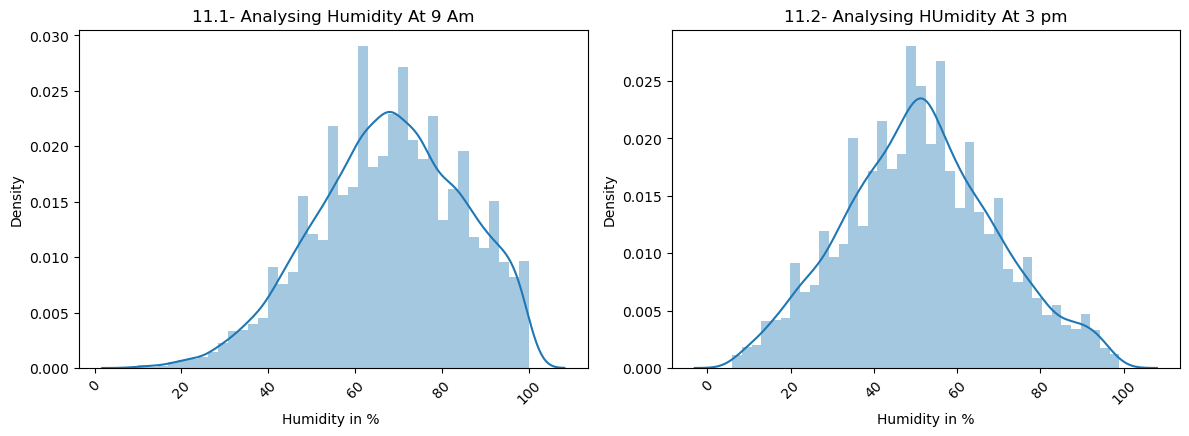

In [87]:
plt.figure(figsize = (12,8), facecolor='white')


plt.subplot (2,2,1)
plt.title('11.1- Analysing Humidity At 9 Am')
sns.distplot(df['humidity9am'])
# ax.bar_label(ax.containers[0])
plt.xlabel('Humidity in % ', fontsize = 10)
plt.xticks(rotation=45,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')

plt.subplot (2,2,2)
plt.title('11.2- Analysing HUmidity At 3 pm')
sns.distplot(df['humidity3pm'])
# ax.bar_label(ax.containers[0])
plt.xlabel('Humidity in %', fontsize = 10)
plt.xticks(rotation=45,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')


plt.tight_layout()
plt.show()

In [88]:
''' Here we can clealry see the difference between the both curves.
    3pm curve is almost bell-shaped, whereas at 9am we can find a little bit 'left-skewed curve' & data above 60% is also..
    ... a little bit higher as compared to 3pm curve.
    
    CONCLUSION - THE HUMIDITY AT 9AM (avg- 69%) IS HIGHER THEN 3PM (avg-58 %) 
'''

" Here we can clealry see the difference between the both curves.\n    3pm curve is almost bell-shaped, whereas at 9am we can find a little bit 'left-skewed curve' & data above 60% is also..\n    ... a little bit higher as compared to 3pm curve.\n    \n    CONCLUSION - THE HUMIDITY AT 9AM (avg- 69%) IS HIGHER THEN 3PM (avg-58 %) \n"

12) Anallysing Pressure at 9am & 3pm 

In [89]:
# Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
# Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

In [90]:
print(df['pressure9am'].nunique())
print(df['pressure3pm'].nunique())

# there are 385 & 375 unique values are present in Pressure at 9am & 3pm columns.

385
375


In [91]:
print(round(df['pressure9am'].min()),'hpa','=> Minimum Atmospheric pressure (hpa) reduced to mean sea level at 9am')
print(round(df['pressure9am'].max()),'hpa','=> Maximum Atmospheric pressure (hpa) reduced to mean sea level at 9am')
print(round(df['pressure9am'].mean()),'hpa','=> Average/Mean Atmospheric pressure (hpa) reduced to mean sea level at 9am')

990 hpa => Minimum Atmospheric pressure (hpa) reduced to mean sea level at 9am
1039 hpa => Maximum Atmospheric pressure (hpa) reduced to mean sea level at 9am
1018 hpa => Average/Mean Atmospheric pressure (hpa) reduced to mean sea level at 9am


In [92]:
print(round(df['pressure3pm'].min()),'hpa','=> Minimum Atmospheric pressure (hpa) reduced to mean sea level at 3pm')
print(round(df['pressure3pm'].max()),'hpa','=> Maximum Atmospheric pressure (hpa) reduced to mean sea level at 3pm')
print(round(df['pressure3pm'].mean()),'hpa','=> Average/Mean Atmospheric pressure (hpa) reduced to mean sea level at 3pm')

983 hpa => Minimum Atmospheric pressure (hpa) reduced to mean sea level at 3pm
1036 hpa => Maximum Atmospheric pressure (hpa) reduced to mean sea level at 3pm
1015 hpa => Average/Mean Atmospheric pressure (hpa) reduced to mean sea level at 3pm


In [93]:
''' Here from the above analysis we can find that the Minimum, Maximum & Average/Mean Values of Atmospheric Pressure at 9am
    is Higher then the Atmospheric Pressure at 3pm'''

' Here from the above analysis we can find that the Minimum, Maximum & Average/Mean Values of Atmospheric Pressure at 9am\n    is Higher then the Atmospheric Pressure at 3pm'

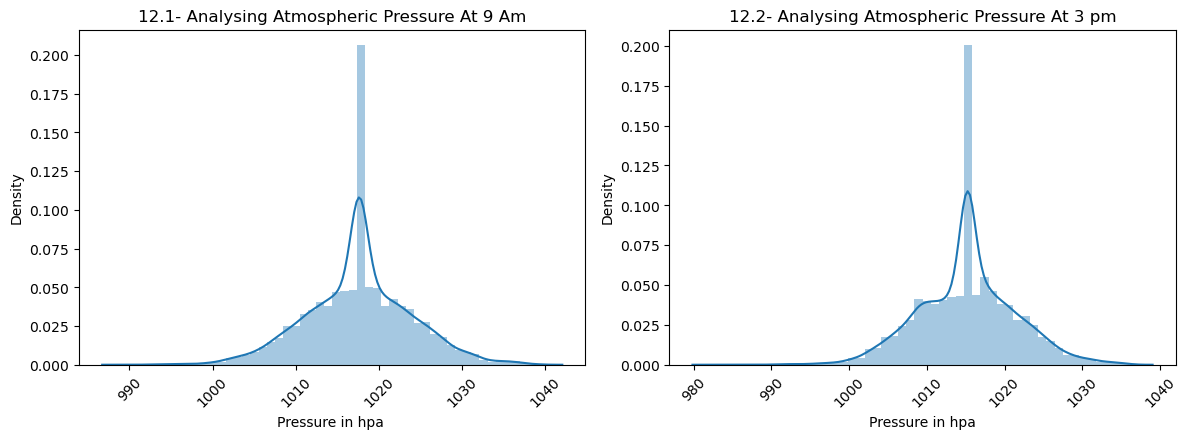

In [94]:
plt.figure(figsize = (12,8), facecolor='white')


plt.subplot (2,2,1)
plt.title('12.1- Analysing Atmospheric Pressure At 9 Am')
sns.distplot(df['pressure9am'])
# ax.bar_label(ax.containers[0])
plt.xlabel('Pressure in hpa ', fontsize = 10)
plt.xticks(rotation=45,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')

plt.subplot (2,2,2)
plt.title('12.2- Analysing Atmospheric Pressure At 3 pm')
sns.distplot(df['pressure3pm'])
# ax.bar_label(ax.containers[0])
plt.xlabel('Pressure in hpa', fontsize = 10)
plt.xticks(rotation=45,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')


plt.tight_layout()
plt.show()

In [95]:
'''CONCLUSION - THE AMOSPHERIC PRESSURE AT 9AM & 3PM IS ALMOST SIMILAR'''

'CONCLUSION - THE AMOSPHERIC PRESSURE AT 9AM & 3PM IS ALMOST SIMILAR'

13) Analysing Cloud & Temperature at 9am & 3pm -

In [96]:
# Cloud9am - Fraction of sky obscured by cloud at 9am. 
# Cloud3pm -Fraction of sky obscured by cloud 
# Temp9am-Temperature (degrees C) at 9am
# Temp3pm -Temperature (degrees C) at 3pm

In [97]:
# Fraction of sky obscured by cloud at 9am & 3pm =====>>>>>

In [98]:
print(df['cloud9am'].nunique())
print(df['cloud3pm'].nunique())
print(df['temp9am'].nunique())
print(df['temp3pm'].nunique())

# Number of unique values present inside the column are as follows :-

10
10
305
329


In [99]:
print(df['cloud9am'].min(),'=> Fraction of sky obscured by cloud at 9am')
print(df['cloud9am'].max(),'=> Fraction of sky obscured by cloud at 9am')
print(round(df['cloud9am'].mean()),'=> Fraction of sky obscured by cloud at 9am')

0.0 => Fraction of sky obscured by cloud at 9am
8.0 => Fraction of sky obscured by cloud at 9am
5 => Fraction of sky obscured by cloud at 9am


In [100]:
print(df['cloud3pm'].min(),'=> Fraction of sky obscured by cloud at 3pm')
print(df['cloud3pm'].max(),'=> Fraction of sky obscured by cloud at 3pm')
print(round(df['cloud3pm'].mean()),'=> Fraction of sky obscured by cloud at 3pm')

0.0 => Fraction of sky obscured by cloud at 3pm
8.0 => Fraction of sky obscured by cloud at 3pm
5 => Fraction of sky obscured by cloud at 3pm


In [101]:
'''Conclusion - Clouds Obscured at 9am & 3pm is almost similar'''

'Conclusion - Clouds Obscured at 9am & 3pm is almost similar'

In [102]:
#  Analysing Minimum, Maximum & Average Temperature at 9am & 3pm.=====>>>>>>

In [103]:
print(df['temp9am'].min(),'°C','=> Minimum Temperature at 9am')
print(df['temp9am'].max(),'°C','=> Maximum Temperature at 9am')
print(round(df['temp9am'].mean()),'°C','=> Mean / Average Temperature at 9am')

1.9 °C => Minimum Temperature at 9am
39.4 °C => Maximum Temperature at 9am
18 °C => Mean / Average Temperature at 9am


In [104]:
print(df['temp3pm'].min(),'°C','=> Minimum Temperature at 3pm')
print(df['temp3pm'].max(),'°C','=> Maximum Temperature at 3pm')
print(round(df['temp3pm'].mean()),'°C','=> Mean / Average Temperature at 3pm')

7.3 °C => Minimum Temperature at 3pm
44.1 °C => Maximum Temperature at 3pm
22 °C => Mean / Average Temperature at 3pm


In [105]:
'''Conclusion - The Minimum , Maximum & Mean/Average Temperature Values are Higher at 3Pm as compared to 9am'''

'Conclusion - The Minimum , Maximum & Mean/Average Temperature Values are Higher at 3Pm as compared to 9am'

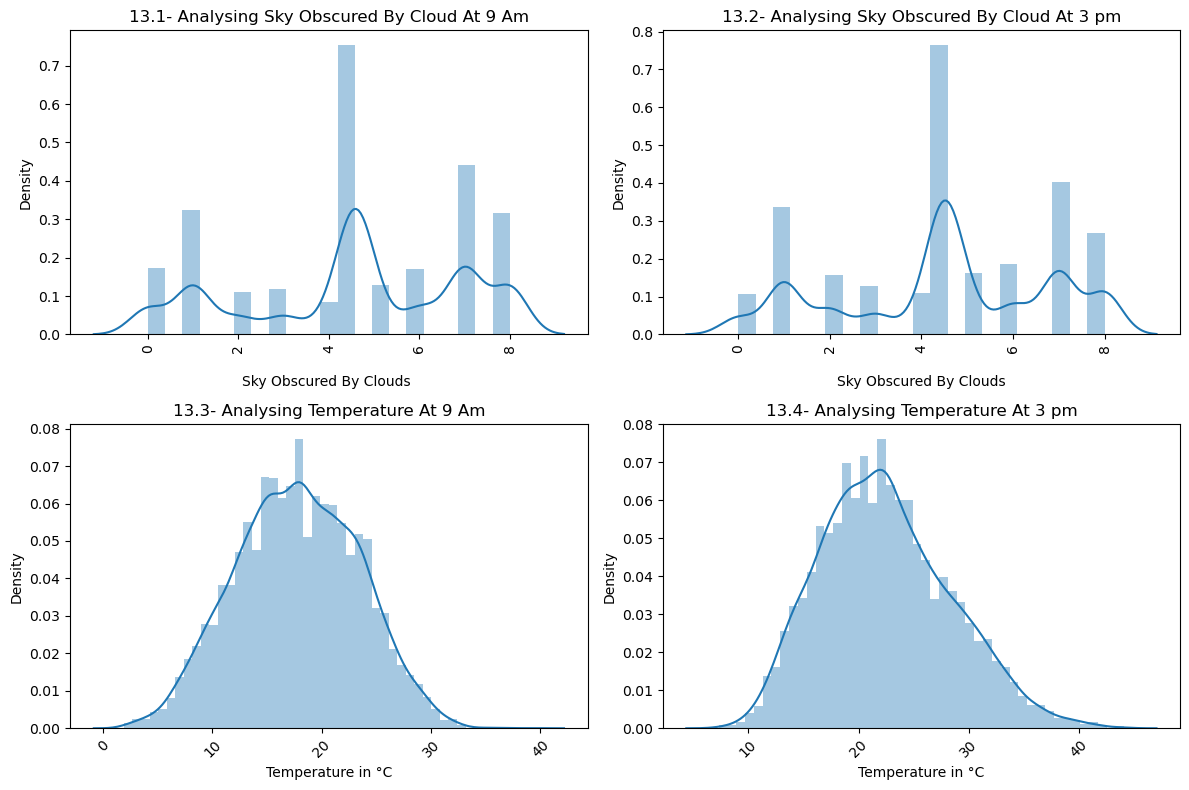

In [106]:
plt.figure(figsize = (12,8), facecolor='white')

plt.subplot (2,2,1)
plt.title('13.1- Analysing Sky Obscured By Cloud At 9 Am')
sns.distplot(df['cloud9am'])
# ax.bar_label(ax.containers[0])
plt.xlabel('\nSky Obscured By Clouds ', fontsize = 10)
plt.xticks(rotation=90,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')

plt.subplot (2,2,2)
plt.title('13.2- Analysing Sky Obscured By Cloud At 3 pm')
sns.distplot(df['cloud3pm'])
# ax.bar_label(ax.containers[0])
plt.xlabel('\nSky Obscured By Clouds', fontsize = 10)
plt.xticks(rotation=90,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')

plt.subplot (2,2,3)
plt.title('13.3- Analysing Temperature At 9 Am')
sns.distplot(df['temp9am'])
# ax.bar_label(ax.containers[0])
plt.xlabel('Temperature in °C', fontsize = 10)
plt.xticks(rotation=45,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')

plt.subplot (2,2,4)
plt.title('13.4- Analysing Temperature At 3 pm')
sns.distplot(df['temp3pm'])
# ax.bar_label(ax.containers[0])
plt.xlabel('Temperature in °C', fontsize = 10)
plt.xticks(rotation=45,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')


plt.tight_layout()
plt.show()

In [107]:
'''  0.0 => Minimum Fraction of sky obscured by cloud at 9am & 3pm
     8.0 => Maximum Fraction of sky obscured by cloud at 9am & 3pm
     5.0 => Mean/ Average Fraction of sky obscured by cloud at 9am & 3pm
     CONCLUSION-1 (for 13.1 & 13.2) - Clouds Obscured at 9am & 3pm is almost similar
     
     
    * 1.9 °C => Minimum Temperature at 9am                            *  7.3 °C => Minimum Temperature at 3pm
    * 39.4 °C => Maximum Temperature at 9am                           *  44.1 °C => Maximum Temperature at 3pm
    * 18 °C => Mean / Average Temperature at 9am                      *  22 °C => Mean / Average Temperature at 3pm
                                                                      *  we can also see the temperature curve is slightly... 
                                                                                    ...Right Skewed at 3pm
     
     CONCLUSION-2 - The Minimum , Maximum & Mean/Average Temperature Values are Higher at 3Pm as compared to 9am
     (for 13.3 & 13.4)
     '''

'  0.0 => Minimum Fraction of sky obscured by cloud at 9am & 3pm\n     8.0 => Maximum Fraction of sky obscured by cloud at 9am & 3pm\n     5.0 => Mean/ Average Fraction of sky obscured by cloud at 9am & 3pm\n     CONCLUSION-1 (for 13.1 & 13.2) - Clouds Obscured at 9am & 3pm is almost similar\n     \n     \n    * 1.9 °C => Minimum Temperature at 9am                            *  7.3 °C => Minimum Temperature at 3pm\n    * 39.4 °C => Maximum Temperature at 9am                           *  44.1 °C => Maximum Temperature at 3pm\n    * 18 °C => Mean / Average Temperature at 9am                      *  22 °C => Mean / Average Temperature at 3pm\n                                                                      *  we can also see the temperature curve is slightly... \n                                                                                    ...Right Skewed at 3pm\n     \n     CONCLUSION-2 - The Minimum , Maximum & Mean/Average Temperature Values are Higher at 3Pm as compared to 

14) Analysing Rain Today & Rain Tomorrow

In [108]:
print(df['raintoday'].unique())
print(df['raintoday'].nunique())
print(df['raintomorrow'].unique())
print(df['raintomorrow'].nunique())

['No' 'Yes']
2
['No' 'Yes']
2


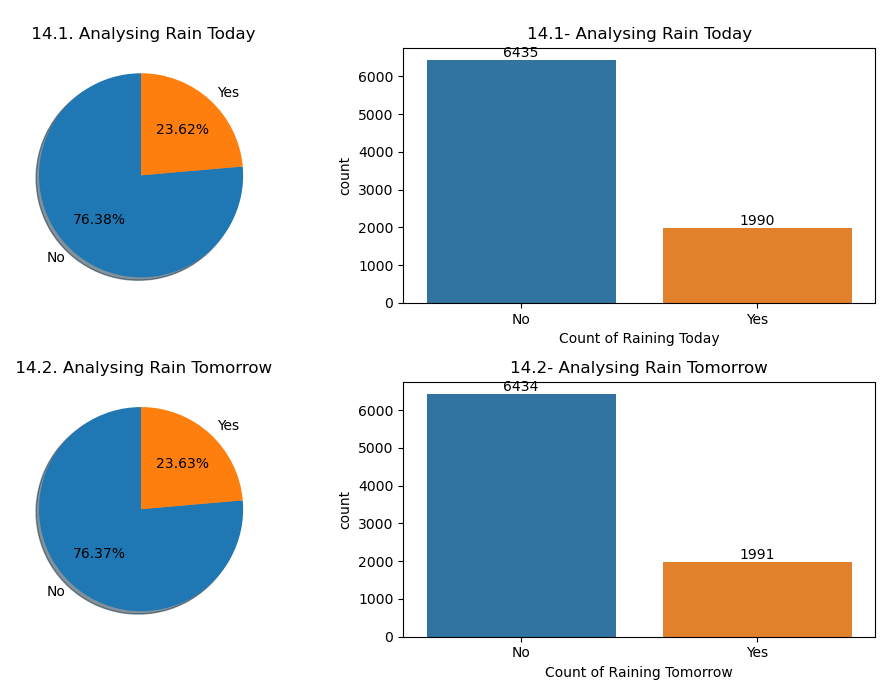

In [109]:
plt.figure(figsize = (10,7), facecolor='white')

plt.subplot (2,2,1)
# plt.figure(figsize=(3,3))
plt.title('\n 14.1. Analysing Rain Today')
def my_autopct(pct):
    return f'{pct:.2f}%'
plt.pie(df['raintoday'].value_counts(),startangle=90,autopct=my_autopct,labels=['No', 'Yes'],shadow= True)

plt.subplot (2,2,2)
plt.title('14.1- Analysing Rain Today')
ax = sns.countplot(df['raintoday'])
ax.bar_label(ax.containers[0])
plt.xlabel('Count of Raining Today', fontsize = 10)
plt.xticks(rotation=0,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')

plt.subplot (2,2,3)
# plt.figure(figsize=(3,3))
plt.title('\n 14.2. Analysing Rain Tomorrow')
def my_autopct(pct):
    return f'{pct:.2f}%'
plt.pie(df['raintomorrow'].value_counts(),startangle=90,autopct=my_autopct,labels=['No', 'Yes'],shadow= True)

plt.subplot (2,2,4)
plt.title('14.2- Analysing Rain Tomorrow')
ax = sns.countplot(df['raintomorrow'])
ax.bar_label(ax.containers[0])
plt.xlabel('Count of Raining Tomorrow', fontsize = 10)
plt.xticks(rotation=0,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')


plt.tight_layout()
plt.show()

In [110]:
'''CONCLUSION :- THE VALUES OF RAIN TODAY & RAIN TOMORROW ARE ALMOST SIMILAR IN THE COLUMNS'''

'CONCLUSION :- THE VALUES OF RAIN TODAY & RAIN TOMORROW ARE ALMOST SIMILAR IN THE COLUMNS'

================= UPTO HERE UNIVARIATE ANALYSIS COMPLETED ==============================

===== Applying Bivariate Or MultiVariate Analysis =========

In [111]:
'''Here we know that we are given with two situations where in :-
* First Situation :- Where we have to predict "Rain Tomorrrow" (Yes/No)
* Second Situtation :- Where we have to predict "Rainfall" (Quantity of Rainfall, if Yes)

So According to situations we need to analyse multiple columns saymalteneously with our both TARGET COLUMNS (1) 'Rain Tomorrow'
& (2) 'Rainfall'.

Analysing Both Conditions in Following Steps :-
'''

'Here we know that we are given with two situations where in :-\n* First Situation :- Where we have to predict "Rain Tomorrrow" (Yes/No)\n* Second Situtation :- Where we have to predict "Rainfall" (Quantity of Rainfall, if Yes)\n\nSo According to situations we need to analyse multiple columns saymalteneously with our both TARGET COLUMNS (1) \'Rain Tomorrow\'\n& (2) \'Rainfall\'.\n\nAnalysing Both Conditions in Following Steps :-\n'

1) Analysing Conditions for "Rain Tomorrow" ===>>

(a) Analysing Rain Tomorrow with Minimum and Maximum temperature :-

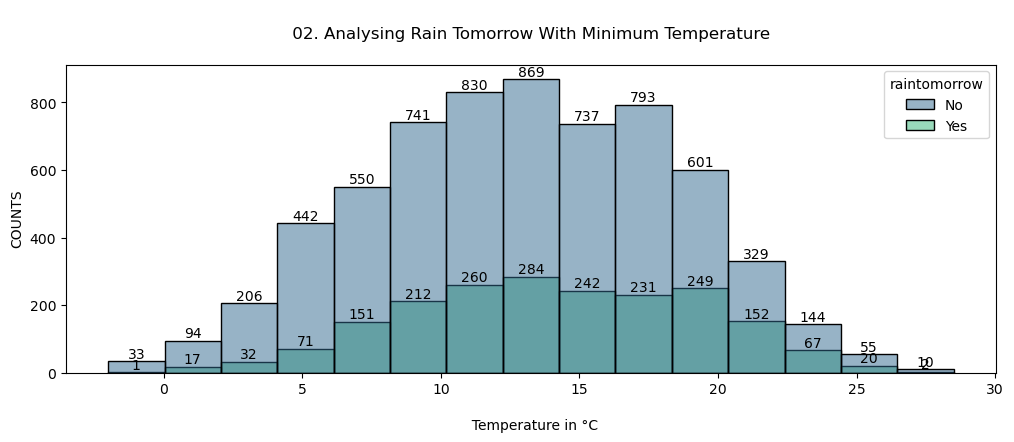

In [112]:
plt.figure (figsize = (12,4), facecolor = "white")

# plt.subplot(2,1,1)
plt.title('\n 02. Analysing Rain Tomorrow With Minimum Temperature \n')
ax=sns.histplot(data=df, x="mintemp", hue="raintomorrow",palette='viridis',bins=15)
# ax.bar_label(ax.containers[0])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom',rotation=0, fontsize=10)
    
# TO IDENTIFY PERCENTAGE ALSO    
# total_counts = len(df)  # Total number of data points
# for r in ax.patches:
#     height = r.get_height()
#     percentage = (height / total_counts) * 100  # Calculate the percentage
#     ax.annotate(f'{percentage:.2f}%', 
#                 (r.get_x() + r.get_width() / 2., height), 
#                 ha='center', va='bottom', rotation=0, fontsize=10)  
#                              va='top', 'bottom', 'center', 'baseline', 'center_baselin
    
plt.xlabel('\n  Temperature in °C', fontsize=10)
# plt.xticks(rotation=30, ha = 'right')
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
# 'best', 'upper right', 'upper left', 'lower left', 'lower right',
# 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

plt.show()

In [113]:
'''
Here in the above graph we can find that the 
% Probability Of RainTomorrow (Yes) is Gradually Increasing, as comapred to RainTomorrow (No) 
when the Min-Temperature Lying in between 18°C - 28 °C 

*      Min-Temp (°C)     RainTomorrow (No)            RainTomorrow (Yes)     Total          % Probability       % Probability
                                                                                              of YES (%)          of NO (%)
         
         15-18°C              1530                           473              2003              23.61 %              76.38 %
         18-20°C               601                           249               850              29.29 %              70.70 %
         20-22°C               329                           152               481              31.60 %              68.39 %
         22-24°C               144                            67               211              31.75 %              68.24 %
         24-26°C                55                            20                75              26.66 %              73.33 %
         26-29°C                10                            02                12              16.66 %              83.33 %


** CONCLUSION :- FROM THE ABOVE ANALYSIS WE FIND THAT THE PROBABILITY OF RAINTOMORROW-YES IS HIGHER 
                 IN THE MIN-TEMP RANGE OF 18°C-24°C
''' 

'\nHere in the above graph we can find that the \n% Probability Of RainTomorrow (Yes) is Gradually Increasing, as comapred to RainTomorrow (No) \nwhen the Min-Temperature Lying in between 18°C - 28 °C \n\n*      Min-Temp (°C)     RainTomorrow (No)            RainTomorrow (Yes)     Total          % Probability       % Probability\n                                                                                              of YES (%)          of NO (%)\n         \n         15-18°C              1530                           473              2003              23.61 %              76.38 %\n         18-20°C               601                           249               850              29.29 %              70.70 %\n         20-22°C               329                           152               481              31.60 %              68.39 %\n         22-24°C               144                            67               211              31.75 %              68.24 %\n         24-26°C            

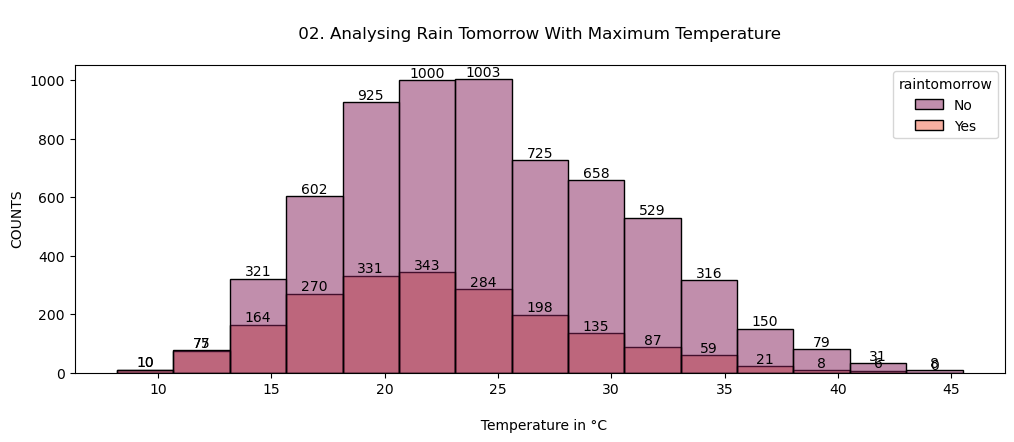

In [114]:
plt.figure (figsize = (12,4), facecolor = "white")

# plt.subplot(2,1,1)
plt.title('\n 02. Analysing Rain Tomorrow With Maximum Temperature \n')
ax=sns.histplot(data=df, x="maxtemp", hue="raintomorrow",palette='rocket',bins=15)
# ax.bar_label(ax.containers[0])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom',rotation=0, fontsize=10)
#               ha = 'center' 'right' 'left
# TO IDENTIFY PERCENTAGE ALSO    
# total_counts = len(df)  # Total number of data points
# for r in ax.patches:
#     height = r.get_height()
#     percentage = (height / total_counts) * 100  # Calculate the percentage
#     ax.annotate(f'{percentage:.2f}%', 
#                 (r.get_x() + r.get_width() / 2., height), 
#                 ha='center', va='bottom', rotation=0, fontsize=10)  
#                              va='top', 'bottom', 'center', 'baseline', 'center_baselin
    
plt.xlabel('\n  Temperature in °C', fontsize=10)
# plt.xticks(rotation=30, ha = 'right')
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
# 'best', 'upper right', 'upper left', 'lower left', 'lower right',
# 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

plt.show()

In [115]:
'''
Here in the above graph we can find that the 
% Probability Of RainTomorrow (Yes) is Gradually Increasing, as comapred to RainTomorrow (No) 
when the Min-Temperature Lying in between 10°C - 18 °C 

*      Min-Temp (°C)     RainTomorrow (No)            RainTomorrow (Yes)     Total          % Probability         % Probability
                                                                                              of YES (%)            of NO (%)
         
         00-10°C              10                             0                 10                100 %                0 %
         10-13°C              77                             75                152               49.34 %              50.65 %
         13-15°C              321                            164               485               33.81 %              66.18 %
         15-18°C              602                            270               872               30.96 %              69.03 %
         18-21°C              925                            331               1256              26.35 %              73.64 %
         21-26°C              2003                           627               2630              23.84 %              76.15 %


** CONCLUSION :- FROM THE ABOVE ANALYSIS WE FIND THAT THE PROBABILITY OF RAINTOMORROW-YES IS HIGHER 
                 IN THE MAXIMUM-TEMP RANGE OF 10°C-18°C
''' 

'\nHere in the above graph we can find that the \n% Probability Of RainTomorrow (Yes) is Gradually Increasing, as comapred to RainTomorrow (No) \nwhen the Min-Temperature Lying in between 10°C - 18 °C \n\n*      Min-Temp (°C)     RainTomorrow (No)            RainTomorrow (Yes)     Total          % Probability         % Probability\n                                                                                              of YES (%)            of NO (%)\n         \n         00-10°C              10                             0                 10                100 %                0 %\n         10-13°C              77                             75                152               49.34 %              50.65 %\n         13-15°C              321                            164               485               33.81 %              66.18 %\n         15-18°C              602                            270               872               30.96 %              69.03 %\n         18-21°C        

In [116]:
'''
OVERALL CONCLUSION FOR ABOVE = (1)THE PROBABILITY OF RAINTOMORROW-YES IS HIGHER IN THE MIN-TEMP RANGE OF 18°C-24°C
         ANALYSIS              (2)THE PROBABILITY OF RAINTOMORROW-YES IS HIGHER IN THE MAXIMUM-TEMP RANGE OF 10°C-18°C
                               
     [ THAT MEANS WE CAN SAY THAT THE % PROBABILITY OF RAIN-TOMORROW (YES) IS HIGHER IN THE TEMPERATURE RANGE OF 10°C-24°C ]
'''

'\nOVERALL CONCLUSION FOR ABOVE = (1)THE PROBABILITY OF RAINTOMORROW-YES IS HIGHER IN THE MIN-TEMP RANGE OF 18°C-24°C\n         ANALYSIS              (2)THE PROBABILITY OF RAINTOMORROW-YES IS HIGHER IN THE MAXIMUM-TEMP RANGE OF 10°C-18°C\n                               \n     [ THAT MEANS WE CAN SAY THAT THE % PROBABILITY OF RAIN-TOMORROW (YES) IS HIGHER IN THE TEMPERATURE RANGE OF 10°C-24°C ]\n'

3)  Analysing Rain Tomorrow with Direction Of Wind & Speed at 9 AM ==========================================================

In [117]:
# wind direction at 9am = what is the direction of wind at 9am
# wind speed at 9am = Wind speed (km/hr) averaged over 10 minutes prior to 9am

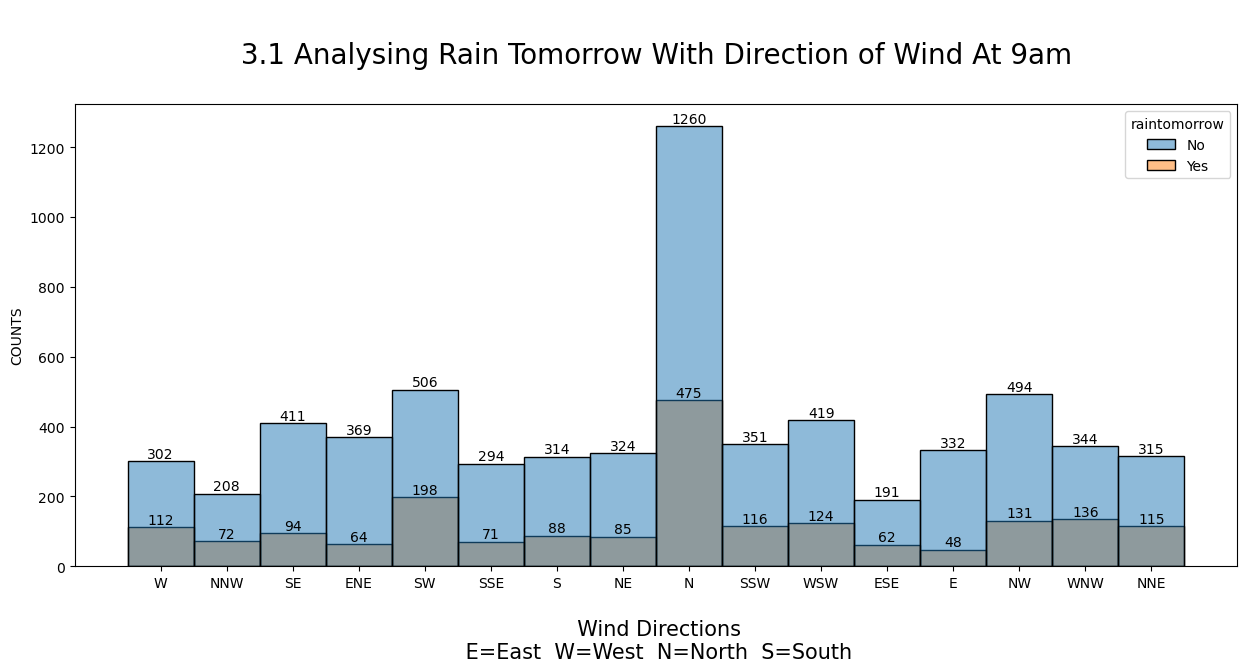

In [118]:
plt.figure (figsize = (15,6), facecolor = "white")

plt.title('\n 3.1 Analysing Rain Tomorrow With Direction of Wind At 9am \n', fontsize=20)
ax=sns.histplot(data=df, x="winddir9am", hue="raintomorrow")
# ax.bar_label(ax.containers[0])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom',rotation=0, fontsize=10)
#               ha = 'center' 'right' 'left

        
plt.xlabel('\n  Wind Directions \n E=East  W=West  N=North  S=South', fontsize=15)
plt.xticks(rotation=0, ha = 'center',fontsize=10)
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
# ha = 'best', 'upper right', 'upper left', 'lower left', 'lower right',
#     'right', 'center left', 'center right', 'lower center', 'upper center', 'center'


plt.show()

In [119]:
''' Here above we analyse that ,
    what is the direction of the wind in which the % PROBABILITY IS HIGIH for "RainTomorrow (YES)" at ==> [9 AM]
    
      Direction                    % Probability                        Direction                  % Probability of
       of Wind                 of "RainTomorrow" (YES)                   of Wind                "Rain Tomorrow" (YES)
       
       
    W = (112/414%)                    27.05 %                              N   =                        27.37 %
    NNW =                             25.71 %                              SSW =                        24.83 %
    SE =                              18.61 %                              WSW =                        22.83 %
    ENE =                             14.78 %                              ESE =                        24.50 %
    SW =                              28.12 %                              E   =                        12.63 %
    SSE =                             19.45 %                              NW  =                        20.96 %
    S =                               21.89 %                              WNW =                        28.33 %
    NE =                              20.78 %                              NNE =                        26.74 %
    
    So Here from the above analysis we found that the Highest Percentage Probability of "RainTomorrow"(YES) is with
    the following Top 3 Wind Directions at (9AM) :-
    
    1) WNW = 28.33 %
    2) SW  = 28.12 %  
    3) N   = 27.37 % , W = 27.05 %
    
[CONCLUSION - SO HERE WE CAN CONCLUDE THAT THE % PROBABILITY OF "RAIN-TOMORROW"(YES) IS HIGHER WITH THE DIRECTION WNW,SW & N ] 
'''

' Here above we analyse that ,\n    what is the direction of the wind in which the % PROBABILITY IS HIGIH for "RainTomorrow (YES)" at ==> [9 AM]\n    \n      Direction                    % Probability                        Direction                  % Probability of\n       of Wind                 of "RainTomorrow" (YES)                   of Wind                "Rain Tomorrow" (YES)\n       \n       \n    W = (112/414%)                    27.05 %                              N   =                        27.37 %\n    NNW =                             25.71 %                              SSW =                        24.83 %\n    SE =                              18.61 %                              WSW =                        22.83 %\n    ENE =                             14.78 %                              ESE =                        24.50 %\n    SW =                              28.12 %                              E   =                        12.63 %\n    SSE =                    

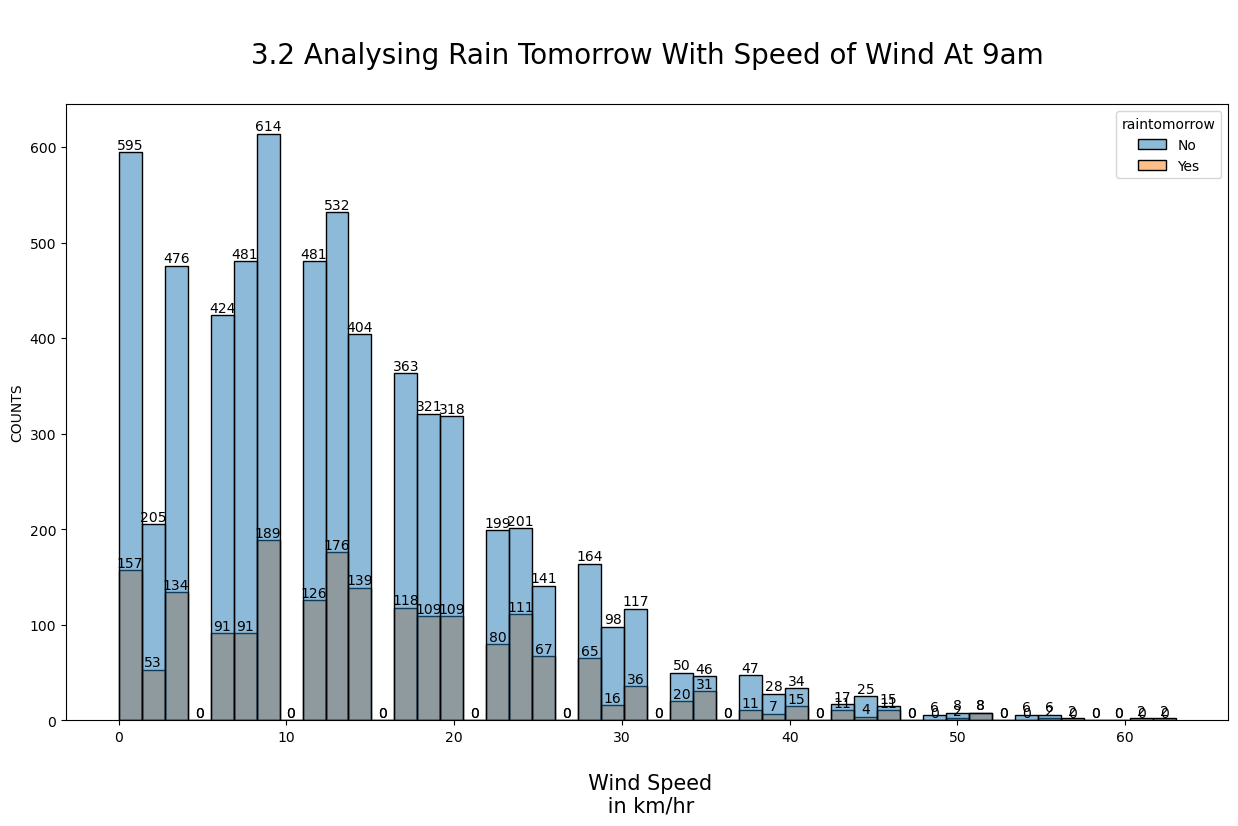

In [120]:
plt.figure (figsize = (15,8), facecolor = "white")

plt.title('\n 3.2 Analysing Rain Tomorrow With Speed of Wind At 9am \n', fontsize=20)
ax=sns.histplot(data=df, x="windSpeed9am", hue="raintomorrow")
# ax.bar_label(ax.containers[0])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom',rotation=0, fontsize=10)
#               ha = 'center' 'right' 'left

        
plt.xlabel('\n  Wind Speed \n in km/hr', fontsize=15)
plt.xticks(rotation=0, ha = 'center',fontsize=10)
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
# ha = 'best', 'upper right', 'upper left', 'lower left', 'lower right',
#     'right', 'center left', 'center right', 'lower center', 'upper center', 'center'


plt.show()

In [121]:
''' Here above we analyse that ,
    what is the Speed of the wind in which the % PROBABILITY IS HIGIH for "RainTomorrow (YES)" at 9 AM
    
   Speed of Wind                          % Probability                       % Probability
      in km/hr                         of "RainTomorrow" (YES)            of "RainTomorrow" (NO)    
       
       
    0 - 10 km/hr  = (112/414%)                20.37 % -----------------------   79.62 %  
    10 -20 km/hr  =                           24.31 %                           75.68 %   
    20 - 30 km/hr =                           28.95 % -----------------------   71.04 %                             
    30 - 40 km/hr =                           29.06 %                           70.93 %   
    above 40 km/hr=                           26.35 % -----------------------   73.64 %   
    
    So Here from the above analysis we found that the Highest Percentage Probability of "RainTomorrow"(YES) is with
    the following Top  Wind speeds at (9AM) :-
    
    1) 10 -20 km/hr   = 24.31 %
    2) 20 -30 km/hr   = 28.95 %  
    3) 30 -40 km/hr   = 29.06 % 
    4) Above 40 km/hr = 26.35 %
    
         
                    [ CONCLUSION - THE % PROBABILITY OF "RAINT-OMORROW(YES)" IS HIGHEST WITH 
         THE 20 - 40 KM/HR WINDSPEED AT 9AM | TEMPERATURE RANGE OF 10°C-24°C & WITH THE DIRECTION WNW, SW & N ]
'''

' Here above we analyse that ,\n    what is the Speed of the wind in which the % PROBABILITY IS HIGIH for "RainTomorrow (YES)" at 9 AM\n    \n   Speed of Wind                          % Probability                       % Probability\n      in km/hr                         of "RainTomorrow" (YES)            of "RainTomorrow" (NO)    \n       \n       \n    0 - 10 km/hr  = (112/414%)                20.37 % -----------------------   79.62 %  \n    10 -20 km/hr  =                           24.31 %                           75.68 %   \n    20 - 30 km/hr =                           28.95 % -----------------------   71.04 %                             \n    30 - 40 km/hr =                           29.06 %                           70.93 %   \n    above 40 km/hr=                           26.35 % -----------------------   73.64 %   \n    \n    So Here from the above analysis we found that the Highest Percentage Probability of "RainTomorrow"(YES) is with\n    the following Top  Wind speeds at

In [122]:
''' [ CONCLUSION - THE % PROBABILITY OF "RAINT-OMORROW(YES)" IS HIGHEST WITH THE 20 - 40 KM/HR WINDSPEED AT 9AM 
    | TEMPERATURE RANGE OF 10°C-24°C & WITH THE DIRECTION WNW (WestNorthWest), SW (SouthWest) & N (North) direction AT 9AM ]
'''

' [ CONCLUSION - THE % PROBABILITY OF "RAINT-OMORROW(YES)" IS HIGHEST WITH THE 20 - 40 KM/HR WINDSPEED AT 9AM \n    | TEMPERATURE RANGE OF 10°C-24°C & WITH THE DIRECTION WNW (WestNorthWest), SW (SouthWest) & N (North) direction AT 9AM ]\n'

4) Analysing RainTomorrow with Wind Direction & speed at 3 PM ================================================================

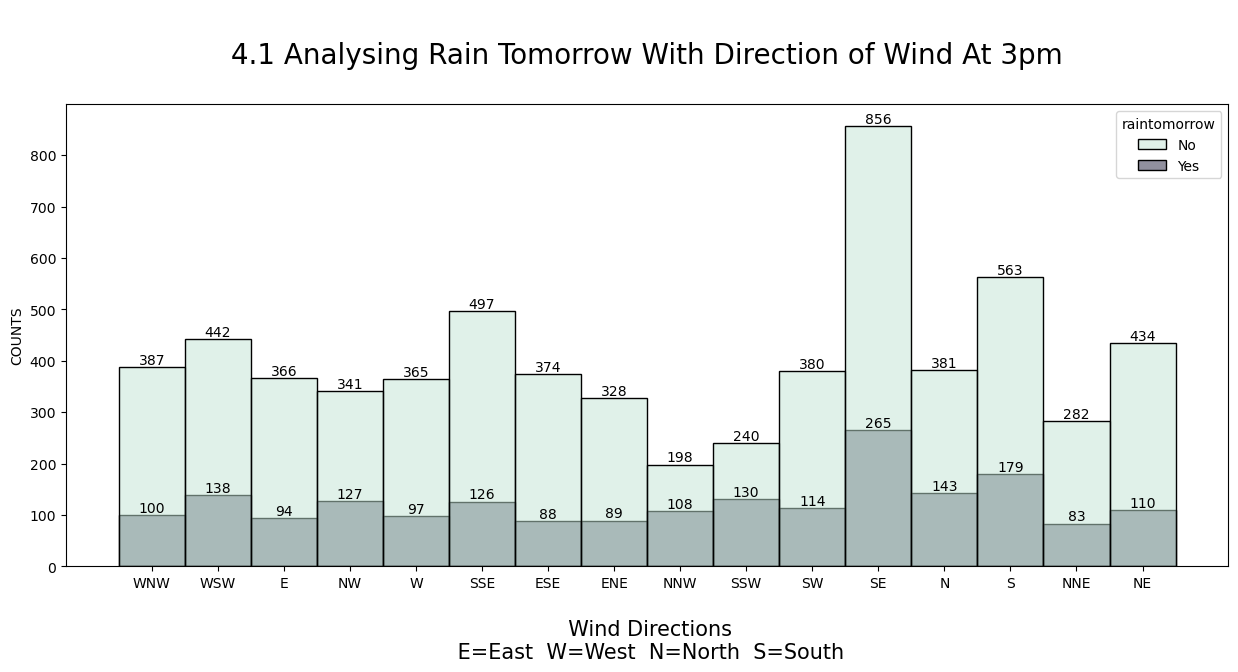

In [123]:
plt.figure (figsize = (15,6), facecolor = "white")

plt.title('\n 4.1 Analysing Rain Tomorrow With Direction of Wind At 3pm \n', fontsize=20)
ax=sns.histplot(data=df, x="winddir3pm", hue="raintomorrow",palette = 'ch:start=.2,rot=-.4')
# palette = 'viridis' 'rocket' 'deep' 'dark=blue' 'ch:start=.2,rot=-.4'
# ax.bar_label(ax.containers[0])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom',rotation=0, fontsize=10)
#               ha = 'center' 'right' 'left

        
plt.xlabel('\n  Wind Directions \n E=East  W=West  N=North  S=South', fontsize=15)
plt.xticks(rotation=0, ha = 'center',fontsize=10)
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
# ha = 'best', 'upper right', 'upper left', 'lower left', 'lower right',
#     'right', 'center left', 'center right', 'lower center', 'upper center', 'center'


plt.show()

In [124]:
''' Here above we analyse that ,
    what is the direction of the wind in which the % PROBABILITY IS HIGIH for "RainTomorrow (YES)" at ==> [3 PM]
    
      Direction                    % Probability                        Direction                  % Probability of
       of Wind                 of "RainTomorrow" (YES)                   of Wind                "Rain Tomorrow" (YES)
       
       
    WNW = (100/487%)                 20.53 %                              NNW   =                     35.29 %
    WSW =                            23.79 %                              SSW   =                     35.13 %
    E   =                            20.43 %                              SW    =                     23.07 %
    NW  =                            27.13 %                              SE    =                     23.63 %
    W   =                            20.99 %                              N     =                     27.29 %
    SSE =                            20.22 %                              S     =                     24.12 %
    ESE =                            19.00 %                              NNE   =                     22.73 %
    ENE =                            21.34 %                              NE    =                     20.22 %
    
    So Here from the above analysis we found that the Highest Percentage Probability of "RainTomorrow"(YES) is with
    the following Top 3 Wind Directions at (3PM) :-
    
    1) NNW  = 35.29 %
    2) SSW  = 35.13 %  
    3) N    = 27.29 % , NW = 27.13 %
    
    
                  [CONCLUSION - SO HERE WE CAN CONCLUDE THAT THE % PROBABILITY OF "RAIN-TOMORROW"(YES) IS ]
                                    [ HIGHER WITH THE DIRECTION NNW,SSW & N AT (3PM)] 
'''

' Here above we analyse that ,\n    what is the direction of the wind in which the % PROBABILITY IS HIGIH for "RainTomorrow (YES)" at ==> [3 PM]\n    \n      Direction                    % Probability                        Direction                  % Probability of\n       of Wind                 of "RainTomorrow" (YES)                   of Wind                "Rain Tomorrow" (YES)\n       \n       \n    WNW = (100/487%)                 20.53 %                              NNW   =                     35.29 %\n    WSW =                            23.79 %                              SSW   =                     35.13 %\n    E   =                            20.43 %                              SW    =                     23.07 %\n    NW  =                            27.13 %                              SE    =                     23.63 %\n    W   =                            20.99 %                              N     =                     27.29 %\n    SSE =                            20

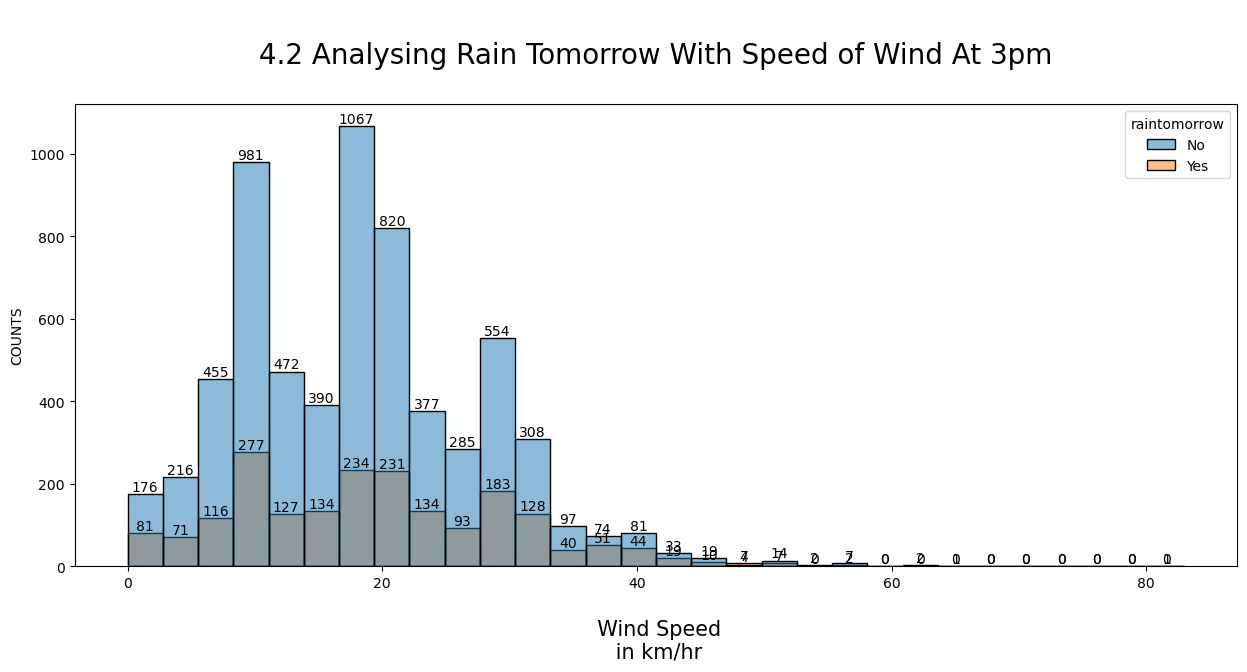

In [125]:
plt.figure (figsize = (15,6), facecolor = "white")

plt.title('\n 4.2 Analysing Rain Tomorrow With Speed of Wind At 3pm \n', fontsize=20)
ax=sns.histplot(data=df, x="windSpeed3pm", hue="raintomorrow",bins=30)
# ax.bar_label(ax.containers[0])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom',rotation=0, fontsize=10)
#               ha = 'center' 'right' 'left

        
plt.xlabel('\n  Wind Speed \n in km/hr', fontsize=15)
plt.xticks(rotation=0, ha = 'center',fontsize=10)
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
# ha = 'best', 'upper right', 'upper left', 'lower left', 'lower right',
#     'right', 'center left', 'center right', 'lower center', 'upper center', 'center'


plt.show()

In [126]:
''' Here above we analyse that ,
    what is the Speed of the wind in which the % PROBABILITY IS HIGIH for "RainTomorrow (YES)" at ==> [3 PM]
    
   Speed of Wind                          % Probability                       % Probability
      in km/hr                         of "RainTomorrow" (YES)            of "RainTomorrow" (NO)    
       
       
    0 - 20 km/hr  = (112/414%)                21.67 % -----------------------   78.31 %  
    20 - 40 km/hr =                           25.82 % -----------------------   74.17 %                             
    40 - 60 km/hr =                           33.87 % -----------------------   66.12 %   
    
    So Here from the above analysis we found that the Highest Percentage Probability of "RainTomorrow"(YES) is with
    the following Top  Wind speeds at (3PM) :-
    
    1) 40 -60 km/hr   = [ 33.87 % ]
    
         
                    [ CONCLUSION - THE % PROBABILITY OF "RAINT-OMORROW(YES)" IS HIGHEST [33.87%] WITH 
         THE 40-60 KM/HR WINDSPEED AT 3PM | TEMPERATURE RANGE OF 10°C-24°C & WITH THE DIRECTION NNW,SSW & N AT (3PM) ]
'''

' Here above we analyse that ,\n    what is the Speed of the wind in which the % PROBABILITY IS HIGIH for "RainTomorrow (YES)" at ==> [3 PM]\n    \n   Speed of Wind                          % Probability                       % Probability\n      in km/hr                         of "RainTomorrow" (YES)            of "RainTomorrow" (NO)    \n       \n       \n    0 - 20 km/hr  = (112/414%)                21.67 % -----------------------   78.31 %  \n    20 - 40 km/hr =                           25.82 % -----------------------   74.17 %                             \n    40 - 60 km/hr =                           33.87 % -----------------------   66.12 %   \n    \n    So Here from the above analysis we found that the Highest Percentage Probability of "RainTomorrow"(YES) is with\n    the following Top  Wind speeds at (3PM) :-\n    \n    1) 40 -60 km/hr   = [ 33.87 % ]\n    \n         \n                    [ CONCLUSION - THE % PROBABILITY OF "RAINT-OMORROW(YES)" IS HIGHEST [33.87%] WITH \n   

In [127]:
'''                                         
                                         OVERALL CONCLUSIONS UPTO HERE
                                         

[OVERALL CONCLUSION (9AM)-THE % PROBABILITY OF "RAINT-TOMORROW(YES)" IS HIGHEST [29.00 %] WITH THE 20-40 KM/HR WINDSPEED AT 9AM 
    | TEMPERATURE RANGE OF 10°C-24°C & WITH THE DIRECTION WNW (WestNorthWest), SW (SouthWest) & N (North) direction AT 9AM ]


[OVERALL CONCLUSION (3PM)-THE % PROBABILITY OF "RAINT-TOMORROW(YES)" IS HIGHEST [33.87 %] WITH THE 40-60 KM/HR WINDSPEED AT 3PM 
| TEMPERATURE RANGE OF 10°C-24°C & WITH THE DIRECTION NNW (NorthNorthWest), SSW (SouthSouthWest) & N (North) direction AT 3PM ]

'''

'                                         \n                                         OVERALL CONCLUSIONS UPTO HERE\n                                         \n\n[OVERALL CONCLUSION (9AM)-THE % PROBABILITY OF "RAINT-TOMORROW(YES)" IS HIGHEST [29.00 %] WITH THE 20-40 KM/HR WINDSPEED AT 9AM \n    | TEMPERATURE RANGE OF 10°C-24°C & WITH THE DIRECTION WNW (WestNorthWest), SW (SouthWest) & N (North) direction AT 9AM ]\n\n\n[OVERALL CONCLUSION (3PM)-THE % PROBABILITY OF "RAINT-TOMORROW(YES)" IS HIGHEST [33.87 %] WITH THE 40-60 KM/HR WINDSPEED AT 3PM \n| TEMPERATURE RANGE OF 10°C-24°C & WITH THE DIRECTION NNW (NorthNorthWest), SSW (SouthSouthWest) & N (North) direction AT 3PM ]\n\n'

5) Analysing Raintomorrow (Yes) with Humidity at 9am & 3 pm ==================================================================

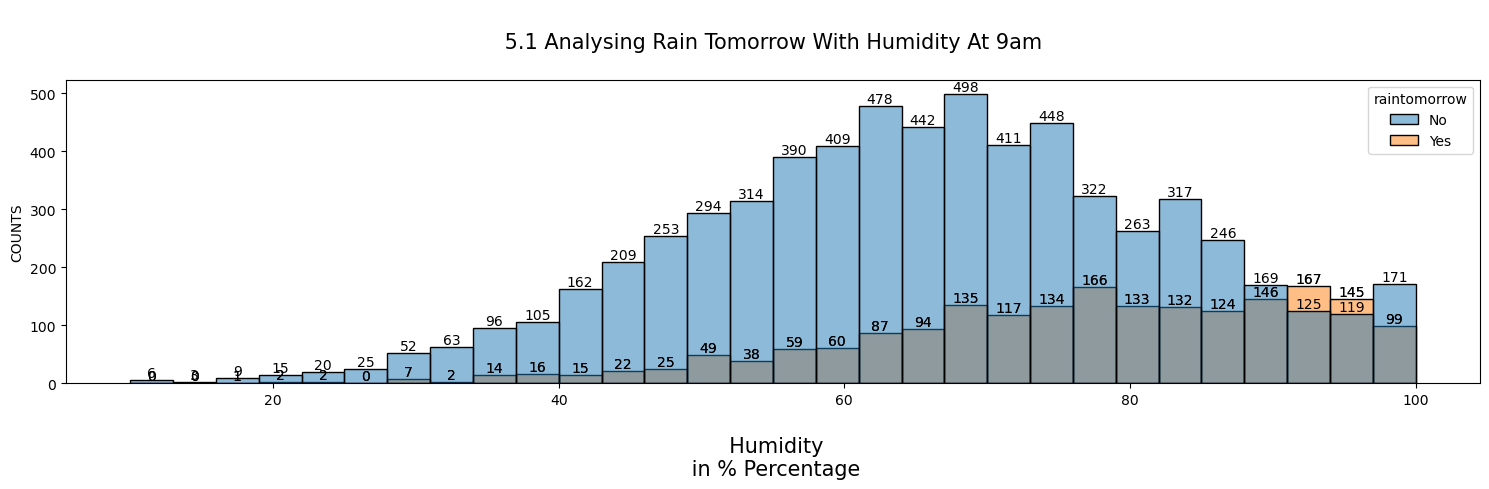

In [128]:
plt.figure (figsize = (15,5), facecolor = "white")


plt.title('\n 5.1 Analysing Rain Tomorrow With Humidity At 9am \n', fontsize=15)
ax=sns.histplot(data=df, x="humidity9am", hue="raintomorrow",bins=30)
ax.bar_label(ax.containers[0])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom',rotation=0, fontsize=10)
#               ha = 'center' 'right' 'left

        
plt.xlabel('\n  Humidity \n in % Percentage', fontsize=15)
plt.xticks(rotation=0, ha = 'center',fontsize=10)
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
# ha = 'best', 'upper right', 'upper left', 'lower left', 'lower right',
#     'right', 'center left', 'center right', 'lower center', 'upper center', 'center'


plt.tight_layout()
plt.show()

In [129]:
'''                Analysing Effect of Humidity % on Predicting Tomorrow Rain Probability                      [HUMIDITY 9-AM]
 
Here in the above Graph we find that as the Humidity Incresing after 40 % then Probability of "RainTomorroe(yes)" is 
also Incresing Gradually. we analysing the Percentage Probability of "RainTomorrow(yes)" by 20% Increase in Humidity follows :-

      Humidity %               % Probabilty                        % Probabilty 
       at 9 AM             of "RainTomorrow(yes)"               of "RainTomorrow(no)"

      20 - 40 %----------------  10.26 %  -------------------------  89.73 %
      40 - 60 %                  11.65 %                             88.34 %
      60 - 80 %----------------  23.22 %  ---------------------------76.77 %
      80 -100 %                  41.47 %                             58.52 %
      
Here above we can find that the Percentage Probability of "RainTomorrow (yes)" is gradually increses as % of humidity Increases
The Highest (41 %) Probability for "RainToorrow (yes)" is in b/w 80-100% of Humidity = MAXIMUM CHANCES OF RAINING TOMORROW
The Lowest (10.26 %) Probability for "RainTomorrow (yes)" is in b/w 20-40 % of Humidity = LOWEST CHANCES OF RAINING TOMORROW

                 
                 [CONCLUSION-5.1 :- HIGHER THE PERCENTAGE OF HUMIDITY AT 9 AM == HIGHER THE CHANCES OF RAINING]
'''

'                Analysing Effect of Humidity % on Predicting Tomorrow Rain Probability                      [HUMIDITY 9-AM]\n \nHere in the above Graph we find that as the Humidity Incresing after 40 % then Probability of "RainTomorroe(yes)" is \nalso Incresing Gradually. we analysing the Percentage Probability of "RainTomorrow(yes)" by 20% Increase in Humidity follows :-\n\n      Humidity %               % Probabilty                        % Probabilty \n       at 9 AM             of "RainTomorrow(yes)"               of "RainTomorrow(no)"\n\n      20 - 40 %----------------  10.26 %  -------------------------  89.73 %\n      40 - 60 %                  11.65 %                             88.34 %\n      60 - 80 %----------------  23.22 %  ---------------------------76.77 %\n      80 -100 %                  41.47 %                             58.52 %\n      \nHere above we can find that the Percentage Probability of "RainTomorrow (yes)" is gradually increses as % of humidity Increases\nT

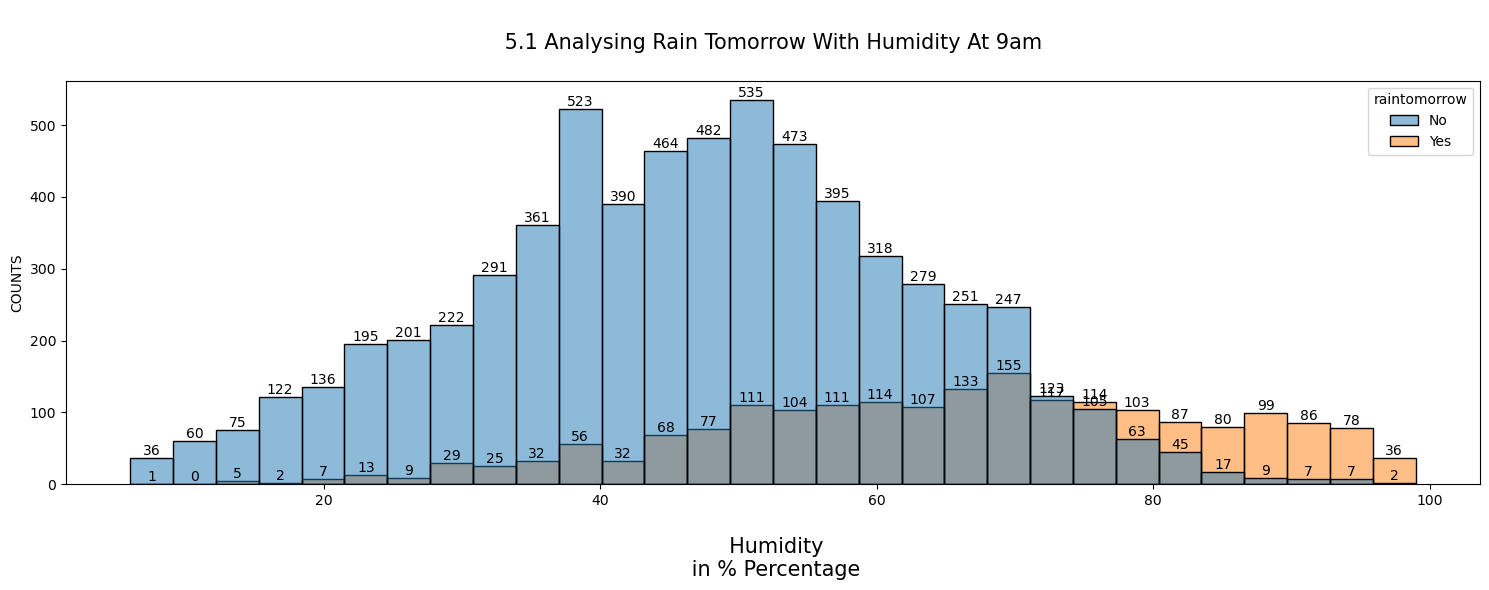

In [130]:
plt.figure (figsize = (15,6), facecolor = "white")


plt.title('\n 5.1 Analysing Rain Tomorrow With Humidity At 9am \n', fontsize=15)
ax=sns.histplot(data=df, x="humidity3pm", hue="raintomorrow",bins=30)
# ax.bar_label(ax.containers[0])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom',rotation=0, fontsize=10)
#               ha = 'center' 'right' 'left

        
plt.xlabel('\n  Humidity \n in % Percentage', fontsize=15)
plt.xticks(rotation=0, ha = 'center',fontsize=10)
plt.ylabel('COUNTS',fontsize=10)

plt.tight_layout()
plt.show()

In [131]:
'''                Analysing Effect of Humidity % on Predicting Tomorrow Rain Probability                      [HUMIDITY 3-PM]
 
Here in the above Graph we find that as the Humidity Incresing after 40 % then Probability of "RainTomorroe(yes)" is 
also Incresing Gradually. we analysing the Percentage Probability of "RainTomorrow(yes)" by 20% Increase in Humidity follows :-

      Humidity %               % Probabilty                        % Probabilty 
       at 3 PM             of "RainTomorrow(yes)"               of "RainTomorrow(no)"

      10 - 20 %                  03.37 %                             96.62 %
      20 - 40 %----------------  08.38 %  -------------------------  91.61 %
      40 - 60 %                  15.51 %                             84.48 %
      60 - 80 %----------------  36.68 %  ---------------------------63.31 %
      80 -100 %                  84.26 %                             15.73 %
      
Here above we can find that the Percentage Probability of "RainTomorrow (yes)" is gradually increses as % of humidity Increases
The Highest (84.26 %) Probability for "RainToorrow (yes)" is in b/w 80-100% of Humidity 3pm= MAXIMUM CHANCES OF RAINING TOMORROW
The Lowest (3.37 %) Probability for "RainTomorrow (yes)" is in b/w 20-40 % of Humidity 3pm= LOWEST CHANCES OF RAINING TOMORROW

                 
                 [CONCLUSION-5.2 :- HIGHER THE PERCENTAGE OF HUMIDITY == HIGHER THE CHANCES OF RAINING]
                     (If Humidity % is in b/w 80-100% at 3pm == Maximum chances of Raining Tomorrow)
'''

'                Analysing Effect of Humidity % on Predicting Tomorrow Rain Probability                      [HUMIDITY 3-PM]\n \nHere in the above Graph we find that as the Humidity Incresing after 40 % then Probability of "RainTomorroe(yes)" is \nalso Incresing Gradually. we analysing the Percentage Probability of "RainTomorrow(yes)" by 20% Increase in Humidity follows :-\n\n      Humidity %               % Probabilty                        % Probabilty \n       at 3 PM             of "RainTomorrow(yes)"               of "RainTomorrow(no)"\n\n      10 - 20 %                  03.37 %                             96.62 %\n      20 - 40 %----------------  08.38 %  -------------------------  91.61 %\n      40 - 60 %                  15.51 %                             84.48 %\n      60 - 80 %----------------  36.68 %  ---------------------------63.31 %\n      80 -100 %                  84.26 %                             15.73 %\n      \nHere above we can find that the Percentage Probabili

In [132]:
'''                               OVERALL CONCLUSION FOR HUMIDITY % AT 9AM & 3PM

[CONCLUSION-5.1 :- HIGHER THE PERCENTAGE OF HUMIDITY AT 9 AM == HIGHER THE CHANCES OF RAINING]
[CONCLUSION-5.2 :- HIGHER THE PERCENTAGE OF HUMIDITY AT 3 PM == HIGHER THE CHANCES OF RAINING]
                   (If Humidity % is in b/w 80-100% at 3pm == Maximum chances of Raining Tomorrow)
'''

'                               OVERALL CONCLUSION FOR HUMIDITY % AT 9AM & 3PM\n\n[CONCLUSION-5.1 :- HIGHER THE PERCENTAGE OF HUMIDITY AT 9 AM == HIGHER THE CHANCES OF RAINING]\n[CONCLUSION-5.2 :- HIGHER THE PERCENTAGE OF HUMIDITY AT 3 PM == HIGHER THE CHANCES OF RAINING]\n                   (If Humidity % is in b/w 80-100% at 3pm == Maximum chances of Raining Tomorrow)\n'

6) Analysing RainTomorrow with Pressure at 9am & 3pm =========================================================================

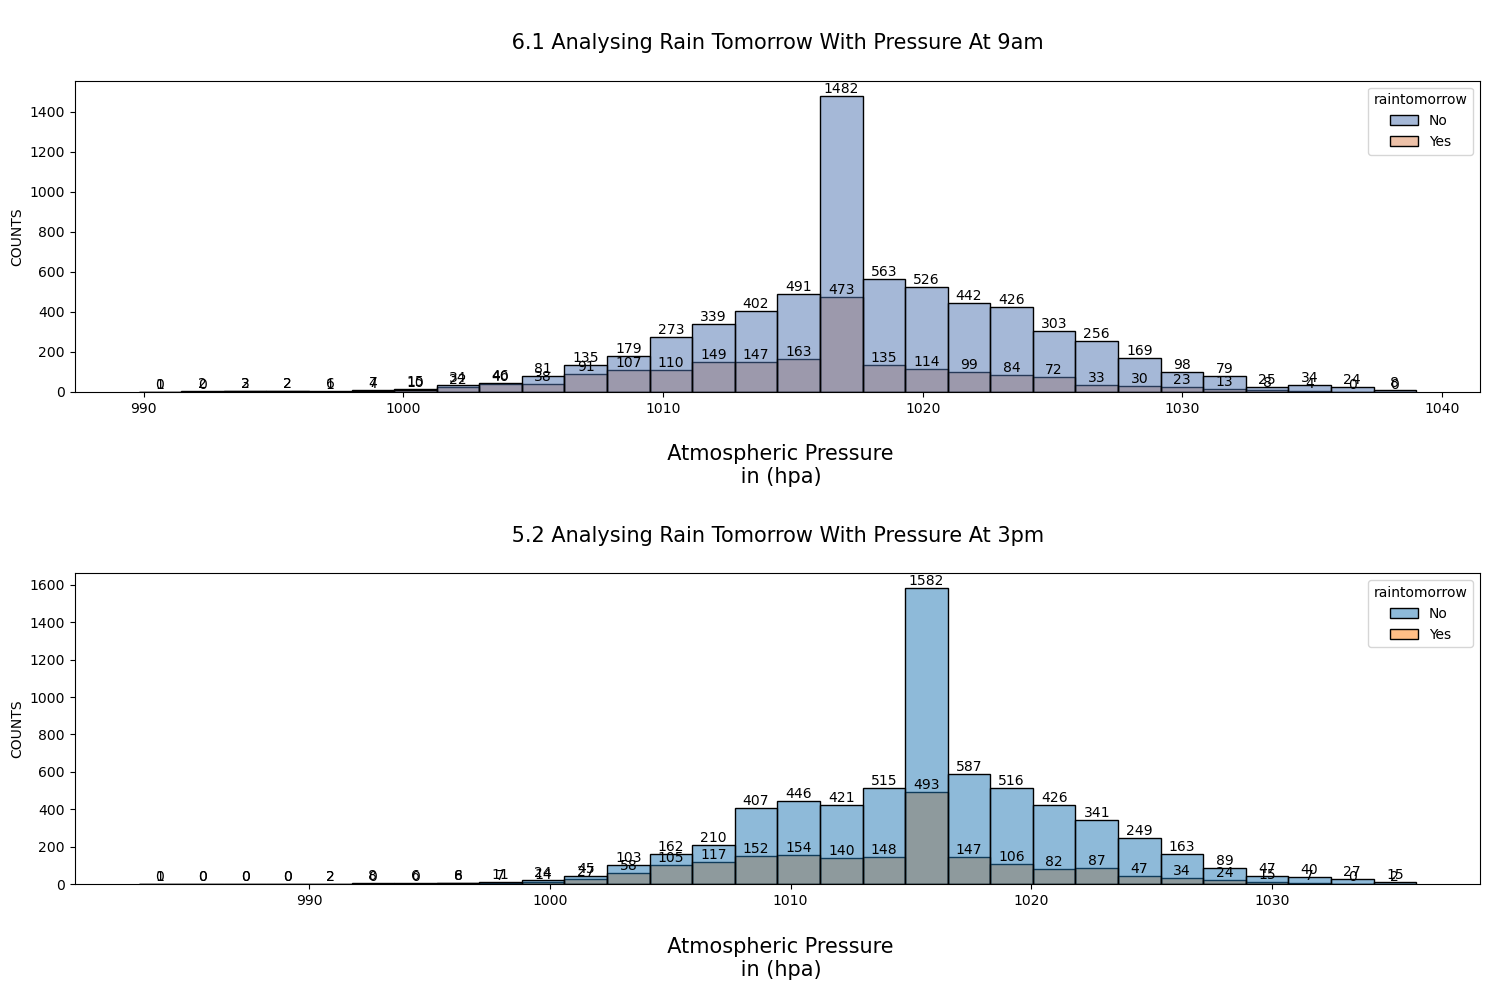

In [133]:
plt.figure (figsize = (15,10), facecolor = "white")

plt.subplot(2,1,1)
plt.title('\n 6.1 Analysing Rain Tomorrow With Pressure At 9am \n', fontsize=15)
ax=sns.histplot(data=df, x="pressure9am", hue="raintomorrow",bins=30,palette='deep')
# ax.bar_label(ax.containers[0])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom',rotation=0, fontsize=10)
#               ha = 'center' 'right' 'left

        
plt.xlabel('\n  Atmospheric Pressure \n in (hpa)', fontsize=15)
plt.xticks(rotation=0, ha = 'center',fontsize=10)
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
# ha = 'best', 'upper right', 'upper left', 'lower left', 'lower right',
#     'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

plt.subplot(2,1,2)
plt.title('\n 5.2 Analysing Rain Tomorrow With Pressure At 3pm \n', fontsize=15)
ax=sns.histplot(data=df, x="pressure3pm", hue="raintomorrow",bins=30)
# ax.bar_label(ax.containers[0])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom',rotation=0, fontsize=10)
#               ha = 'center' 'right' 'left

        
plt.xlabel('\n  Atmospheric Pressure \n in (hpa)', fontsize=15)
plt.xticks(rotation=0, ha = 'center',fontsize=10)
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
# ha = 'best', 'upper right', 'upper left', 'lower left', 'lower right',
#     'right', 'center left', 'center right', 'lower center', 'upper center', 'center'


plt.tight_layout()
plt.show()

In [134]:
'''Here above we analysing ATMOSPHERIC PRESSURE at 9AM & 3PM
we are trying to find the Highest probability of "RainTomorrow (yes)" at what atmospheric pressure :-

CONCLUSION - 
          THE HIGHEST (24%) PROBABILITY OF RAINING TOMORROW (YES) IS WHEN, THE ATMOSPHERIC PRESSURE AT 9 AM IS = 1010-1020 hpa 
          similarly at 3pm also- THE PROBABILITY OF RAINING TOMORROW (YES) HIGHEST (22.60% )WHEN ATMOSPHERIC PRESSURE AT 3PM IS
                                               LYING IN BETWEEN = 1010-1020 hpa
'''

'Here above we analysing ATMOSPHERIC PRESSURE at 9AM & 3PM\nwe are trying to find the Highest probability of "RainTomorrow (yes)" at what atmospheric pressure :-\n\nCONCLUSION - \n          THE HIGHEST (24%) PROBABILITY OF RAINING TOMORROW (YES) IS WHEN, THE ATMOSPHERIC PRESSURE AT 9 AM IS = 1010-1020 hpa \n          similarly at 3pm also- THE PROBABILITY OF RAINING TOMORROW (YES) HIGHEST (22.60% )WHEN ATMOSPHERIC PRESSURE AT 3PM IS\n                                               LYING IN BETWEEN = 1010-1020 hpa\n'

7) Analysing RainTomorrow With Clouds at 9am & 3pm ===========================================================================

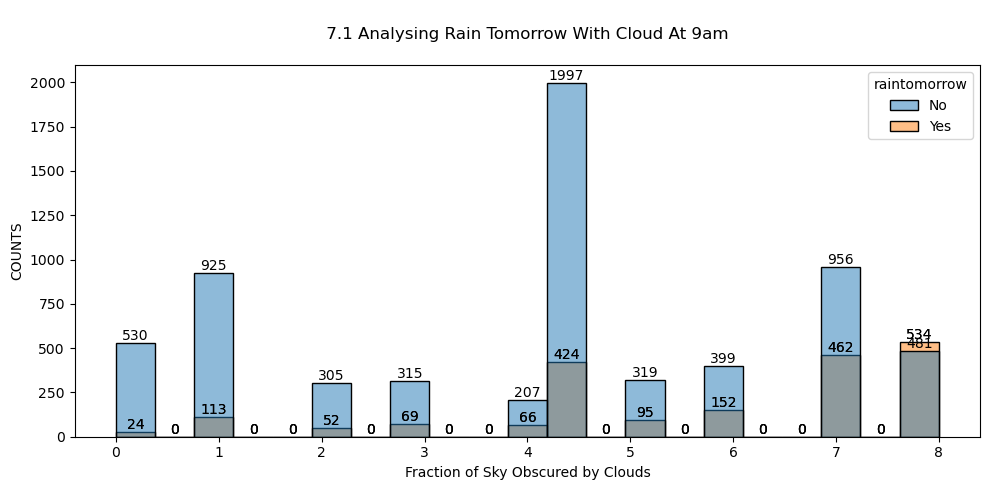

In [135]:
plt.figure (figsize = (10,5), facecolor = "white")

plt.title('\n 7.1 Analysing Rain Tomorrow With Cloud At 9am \n', fontsize=12)
ax=sns.histplot(data=df, x="cloud9am", hue="raintomorrow")
ax.bar_label(ax.containers[0])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom',rotation=0, fontsize=10)
#               ha = 'center' 'right' 'left

        
plt.xlabel('Fraction of Sky Obscured by Clouds', fontsize=10)
plt.xticks(rotation=0, ha = 'center',fontsize=10)
plt.ylabel('COUNTS',fontsize=10)

plt.tight_layout()
plt.show()

In [136]:
'''                Analysing Effect of Clouds on Predicting Tomorrow Rain Probability                      [HUMIDITY 9-AM]
 
Here in the above Graph we find that as the Clouds Obscured are in categories of 0 - 8.
we can find after 4 then Probability of "RainTomorroe(yes)" is Increasing 
we can analysing the Percentage Probability of "RainTomorrow(yes)" by each value of 'fraction of sky obscured by cloud' follows :-

      Fraction Of Sky Obscured                   % Probabilty                        % Probabilty 
       by Clouds at 9 AM                      of "RainTomorrow(yes)"               of "RainTomorrow(no)"

             Fraction-0 ------------------------- 04.33 %  ----------------------------95.66 %
             Fraction-1                           10.88 %                              89.11 %  
             Fraction-2 ------------------------- 14.56 %  ----------------------------85.43 %  
             Fraction-3                           17.96 %                              82.03 %  
             Fraction-4 ------------------------- 18.18 %  ----------------------------81.81 %  
             Fraction-5                           22.94 %                              77.65 %
             Fraction-6 ------------------------- 27.58 %  ----------------------------72.41 %
             Fraction-7                           32.58 %                              67.41 %
             Fraction-8 ------------------------- 52.61 %  ----------------------------47.38 %
             
Here above we can find that the Percentage Probability of "RainTomorrow (yes)" is gradually increses as 'Fractions Increases'

* The Highest (52.61 %) Probability for "RainToorrow (yes)" 
is at 8th Fraction of sky Obscured by cloud at 9 AM = MAXIMUM CHANCES OF RAINING TOMORROW

The Lowest (4.33 %) Probability for "RainTomorrow (yes)" 
is at 8th Fraction of sky Obscured by cloud at 9 AM= LOWEST CHANCES OF RAINING TOMORROW

     
     [CONCLUSION-7.1 :- INCREASE IN NO. OF FRACTIONS OS SKY OBSCURED BY CLOUDS == HIGHER THE CHANCES OF RAINING TOMORROW]
                        (Here at 9 AM at Fraction-8th the Highest Probability is Lower as compared to 3 PM )
'''

'                Analysing Effect of Clouds on Predicting Tomorrow Rain Probability                      [HUMIDITY 9-AM]\n \nHere in the above Graph we find that as the Clouds Obscured are in categories of 0 - 8.\nwe can find after 4 then Probability of "RainTomorroe(yes)" is Increasing \nwe can analysing the Percentage Probability of "RainTomorrow(yes)" by each value of \'fraction of sky obscured by cloud\' follows :-\n\n      Fraction Of Sky Obscured                   % Probabilty                        % Probabilty \n       by Clouds at 9 AM                      of "RainTomorrow(yes)"               of "RainTomorrow(no)"\n\n             Fraction-0 ------------------------- 04.33 %  ----------------------------95.66 %\n             Fraction-1                           10.88 %                              89.11 %  \n             Fraction-2 ------------------------- 14.56 %  ----------------------------85.43 %  \n             Fraction-3                           17.96 %                 

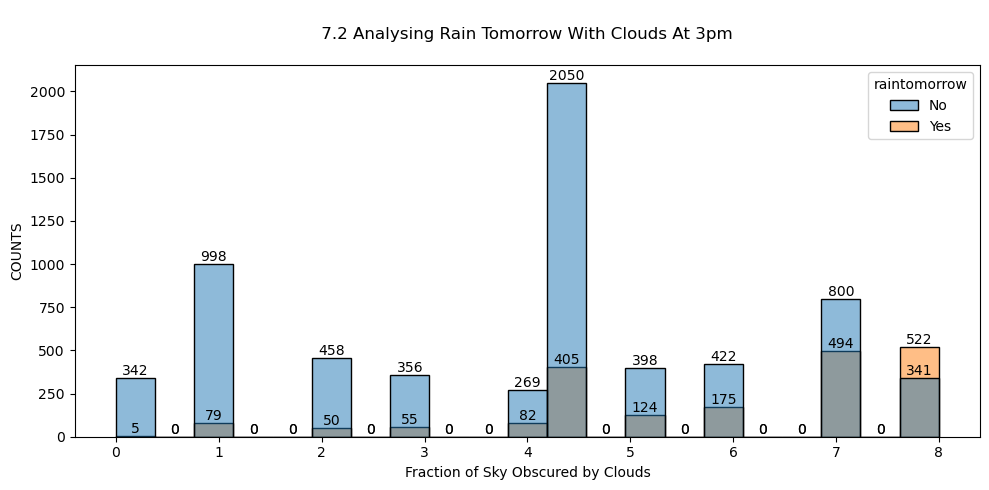

In [137]:
plt.figure (figsize = (10,5), facecolor = "white")

plt.title('\n 7.2 Analysing Rain Tomorrow With Clouds At 3pm \n', fontsize=12)
ax=sns.histplot(data=df, x="cloud3pm", hue="raintomorrow")
# ax.bar_label(ax.containers[0])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom',rotation=0, fontsize=10)
#               ha = 'center' 'right' 'left

        
plt.xlabel('Fraction of Sky Obscured by Clouds', fontsize=10)
plt.xticks(rotation=0, ha = 'center',fontsize=10)
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
# ha = 'best', 'upper right', 'upper left', 'lower left', 'lower right',
#     'right', 'center left', 'center right', 'lower center', 'upper center', 'center'


plt.tight_layout()
plt.show()

In [138]:
'''                Analysing Effect of Clouds on Predicting Tomorrow Rain Probability                      [HUMIDITY 3-PM]
 
Here in the above Graph we find that as the Clouds Obscured are in categories of 0 - 8.
we can find after 4 then Probability of "RainTomorroe(yes)" is Increasing 
we can analysing the Percentage Probability of "RainTomorrow(yes)" by each value of 'fraction of sky obscured by cloud' follows :-

      Fraction Of Sky Obscured                   % Probabilty                        % Probabilty 
       by Clouds at 3 PM                      of "RainTomorrow(yes)"               of "RainTomorrow(no)"

             Fraction-0 ------------------------- 01.44 %  ----------------------------98.55 %
             Fraction-1                           07.33 %                              92.66 %  
             Fraction-2 ------------------------- 09.84 %  ----------------------------90.15 %  
             Fraction-3                           13.38 %                              86.61 %  
             Fraction-4 ------------------------- 17.35 %  ----------------------------82.64 %  
             Fraction-5                           23.75 %                              76.24 %
             Fraction-6 ------------------------- 29.31 %  ----------------------------70.68 %
             Fraction-7                           38.17 %                              61.82 %
             Fraction-8 ------------------------- 60.48 %  ----------------------------39.51 %
             
Here above we can find that the Percentage Probability of "RainTomorrow (yes)" is gradually increses as 'Fractions Increases'

* The Highest (60.48 %) Probability for "RainToorrow (yes)" 
is at 8th Fraction of sky Obscured by cloud at 3 PM = MAXIMUM CHANCES OF RAINING TOMORROW

The Lowest (1.44 %) Probability for "RainTomorrow (yes)" 
is at 8th Fraction of sky Obscured by cloud at 3 PM= LOWEST CHANCES OF RAINING TOMORROW

     
     [CONCLUSION-7.2 :- INCREASE IN NO. OF FRACTIONS Of SKY OBSCURED BY CLOUDS == HIGHER THE CHANCES OF RAINING TOMORROW]
                     
'''

'                Analysing Effect of Clouds on Predicting Tomorrow Rain Probability                      [HUMIDITY 3-PM]\n \nHere in the above Graph we find that as the Clouds Obscured are in categories of 0 - 8.\nwe can find after 4 then Probability of "RainTomorroe(yes)" is Increasing \nwe can analysing the Percentage Probability of "RainTomorrow(yes)" by each value of \'fraction of sky obscured by cloud\' follows :-\n\n      Fraction Of Sky Obscured                   % Probabilty                        % Probabilty \n       by Clouds at 3 PM                      of "RainTomorrow(yes)"               of "RainTomorrow(no)"\n\n             Fraction-0 ------------------------- 01.44 %  ----------------------------98.55 %\n             Fraction-1                           07.33 %                              92.66 %  \n             Fraction-2 ------------------------- 09.84 %  ----------------------------90.15 %  \n             Fraction-3                           13.38 %                 

In [139]:
'''                         OVERALL CONCLUSION OF FRACTION OF SKY OBSCURED BY CLOUDS AT 9AM & 3PM

[CONCLUSION-7.1 :- INCREASE IN NO. OF FRACTIONS OS SKY OBSCURED BY CLOUDS == HIGHER THE CHANCES OF RAINING TOMORROW]
                        (Here at 9 AM at Fraction-8th the Highest Probability (52.61 %) is Lower as compared to 3 PM )

[CONCLUSION-7.2 :- INCREASE IN NO. OF FRACTIONS OS SKY OBSCURED BY CLOUDS == HIGHER THE CHANCES OF RAINING TOMORROW]
                        (At 3 PM at 8th-Fraction, the Highest Probability (60.48 %) is Higher as compared to 9 AM )
'''

'                         OVERALL CONCLUSION OF FRACTION OF SKY OBSCURED BY CLOUDS AT 9AM & 3PM\n\n[CONCLUSION-7.1 :- INCREASE IN NO. OF FRACTIONS OS SKY OBSCURED BY CLOUDS == HIGHER THE CHANCES OF RAINING TOMORROW]\n                        (Here at 9 AM at Fraction-8th the Highest Probability (52.61 %) is Lower as compared to 3 PM )\n\n[CONCLUSION-7.2 :- INCREASE IN NO. OF FRACTIONS OS SKY OBSCURED BY CLOUDS == HIGHER THE CHANCES OF RAINING TOMORROW]\n                        (At 3 PM at 8th-Fraction, the Highest Probability (60.48 %) is Higher as compared to 9 AM )\n'

8) Analysing RainTomorrow with RainToday ===================================================================================

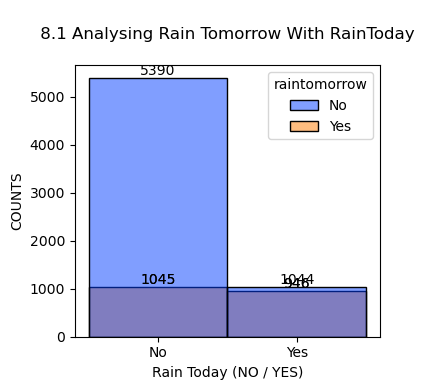

In [140]:
plt.figure (figsize = (4,4), facecolor = "white")

plt.title('\n 8.1 Analysing Rain Tomorrow With RainToday \n', fontsize=12)
ax=sns.histplot(data=df, x="raintoday", hue="raintomorrow",palette='bright')
ax.bar_label(ax.containers[0])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom',rotation=0, fontsize=10)
#               ha = 'center' 'right' 'left

        
plt.xlabel('Rain Today (NO / YES)', fontsize=10)
plt.xticks(rotation=0, ha = 'center',fontsize=10)
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
# ha = 'best', 'upper right', 'upper left', 'lower left', 'lower right',
#     'right', 'center left', 'center right', 'lower center', 'upper center', 'center'


plt.tight_layout()
plt.show()

In [141]:
'''
The above Analysis is for Finding Probability for RainTomorrow (YES) with the help of Rain Today.

   RAIN TODAY            COUNT OF PROBABILITY        % OF PROBABILITY
                         OF RAIN TOMORROW            OF RAIN TOMORROW
                         
       NO [5390]               1045                    16.23 %
       YES [1044]              946                     47.53 %
       
    [CONCLUSIN-8.1 :- IF THERE IS RAINING TODAY (YES) == HIGHER THE % OF PROBABILITY (47.53 %) FOR RAINING TOMORROW (YES) ]
'''

'\nThe above Analysis is for Finding Probability for RainTomorrow (YES) with the help of Rain Today.\n\n   RAIN TODAY            COUNT OF PROBABILITY        % OF PROBABILITY\n                         OF RAIN TOMORROW            OF RAIN TOMORROW\n                         \n       NO [5390]               1045                    16.23 %\n       YES [1044]              946                     47.53 %\n       \n    [CONCLUSIN-8.1 :- IF THERE IS RAINING TODAY (YES) == HIGHER THE % OF PROBABILITY (47.53 %) FOR RAINING TOMORROW (YES) ]\n'

======================= UPTO HERE BIVARIATE AND MULTIVARIATE ANALYSIS IS COMPLETED ===================================

============== Applying Encoding Techniques ===================

In [142]:
'''
Upto Here our Univariate, Bivariate & Multi-Variate Analysis Part is completed . Now for further More analysis like correlation,
finding Outlier etc we need to ENCODE our dataset first. because in our dataset there are so many columns with datatype='object'
,so we need to ENCODE THEM FIRST.
for this here we are going to apply ENCODING TECHNIQUES.
so here we are applying "LABEL ENCODER" for all 'object' categorical column :-
for which we have to import some libraries
'''

'\nUpto Here our Univariate, Bivariate & Multi-Variate Analysis Part is completed . Now for further More analysis like correlation,\nfinding Outlier etc we need to ENCODE our dataset first. because in our dataset there are so many columns with datatype=\'object\'\n,so we need to ENCODE THEM FIRST.\nfor this here we are going to apply ENCODING TECHNIQUES.\nso here we are applying "LABEL ENCODER" for all \'object\' categorical column :-\nfor which we have to import some libraries\n'

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           8425 non-null   datetime64[ns]
 1   location       8425 non-null   object        
 2   mintemp        8425 non-null   float64       
 3   maxtemp        8425 non-null   float64       
 4   rainfall       8425 non-null   float64       
 5   evaporation    8425 non-null   float64       
 6   sunshine       8425 non-null   float64       
 7   windgustdir    8425 non-null   object        
 8   windgustspeed  8425 non-null   float64       
 9   winddir9am     8425 non-null   object        
 10  winddir3pm     8425 non-null   object        
 11  windSpeed9am   8425 non-null   float64       
 12  windSpeed3pm   8425 non-null   float64       
 13  humidity9am    8425 non-null   float64       
 14  humidity3pm    8425 non-null   float64       
 15  pressure9am    8425 n

In [144]:
'''
here above we can see that out of all 35 columns, there are 6 columns are of 'object' & 1 column is 'datetime' datatype.
And we need encode them for further analysis.
'''

"\nhere above we can see that out of all 35 columns, there are 6 columns are of 'object' & 1 column is 'datetime' datatype.\nAnd we need encode them for further analysis.\n"

In [145]:
object_column = []

In [146]:
for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        object_column.append(i)

In [147]:
print(object_column)
# there are 6 'object/string' columns, which need to be encoded.

['location', 'windgustdir', 'winddir9am', 'winddir3pm', 'raintoday', 'raintomorrow']


======= NOW APPLYING LABEL ENCODER ON ALL OBJECT COLUMNS ==============

In [148]:
from sklearn.preprocessing import LabelEncoder

In [149]:
le = LabelEncoder()

In [150]:
for i in object_column:
    df[i] = le.fit_transform(df[i])

In [151]:
'''upto Here above all object columns are ENCODED SUCCESSFULLY'''

'upto Here above all object columns are ENCODED SUCCESSFULLY'

In [152]:
df["date"]=le.fit_transform(df["date"])

# here we can encoded date columns also..beause in pridiction of 'Raintomorrow' data column will also plays an important role.

In [153]:
df.head(5)

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,windSpeed9am,windSpeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
0,0,1,13.4,22.9,0.6,5.389395,7.632205,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0
1,1,1,7.4,25.1,0.0,5.389395,7.632205,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0
2,2,1,12.9,25.7,0.0,5.389395,7.632205,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0
3,3,1,9.2,28.0,0.0,5.389395,7.632205,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0
4,4,1,17.5,32.3,1.0,5.389395,7.632205,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0


In [154]:
print(df.dtypes)
'''here we can see below now there is not any column is in object or string formate.
and date column is also encoded into intiger fomrate.'''

date               int64
location           int32
mintemp          float64
maxtemp          float64
rainfall         float64
evaporation      float64
sunshine         float64
windgustdir        int32
windgustspeed    float64
winddir9am         int32
winddir3pm         int32
windSpeed9am     float64
windSpeed3pm     float64
humidity9am      float64
humidity3pm      float64
pressure9am      float64
pressure3pm      float64
cloud9am         float64
cloud3pm         float64
temp9am          float64
temp3pm          float64
raintoday          int32
raintomorrow       int32
dtype: object


'here we can see below now there is not any column is in object or string formate.\nand date column is also encoded into intiger fomrate.'

============ FINDING CORRELATION IN DATASET ========================

In [155]:
cor = df.corr()
cor

# non graphically finding correlation, here we can see that it is difficult to understand this kind of correlation....
# ....so further we find the correlation graphically by HEAT MAP.

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,windSpeed9am,windSpeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
date,1.000000,0.475037,0.016931,0.102409,0.004945,0.153853,0.065101,-0.084552,-0.037361,-0.012369,-0.002895,-0.083943,-0.046362,0.086328,-0.038345,0.030809,0.013545,0.005237,-0.010572,0.070703,0.113734,-0.011365,-0.011228
location,0.475037,1.000000,0.116531,0.064268,0.007693,0.143519,0.057817,-0.035408,0.231396,-0.027103,-0.027736,0.221378,0.231801,0.005662,0.055790,-0.032261,-0.020574,0.038019,0.017561,0.118051,0.060570,0.003071,0.002824
mintemp,0.016931,0.116531,1.000000,0.717522,0.087684,0.254965,0.056184,-0.145316,0.230058,-0.041650,-0.147166,0.136872,0.178349,-0.130731,0.079048,-0.429432,-0.422991,0.091604,0.038414,0.887119,0.685520,0.064789,0.092942
maxtemp,0.102409,0.064268,0.717522,1.000000,-0.087451,0.322405,0.378403,-0.224670,0.139998,-0.214119,-0.180622,0.013314,0.088172,-0.390976,-0.421879,-0.325721,-0.403258,-0.253968,-0.250132,0.866039,0.974506,-0.224883,-0.152886
rainfall,0.004945,0.007693,0.087684,-0.087451,1.000000,0.023517,-0.169432,0.038812,0.086000,0.093821,0.038560,0.050631,0.024791,0.228800,0.235444,-0.072668,-0.033649,0.185444,0.150760,-0.007083,-0.090687,0.461106,0.220021
evaporation,0.153853,0.143519,0.254965,0.322405,0.023517,1.000000,0.226001,-0.078765,0.136371,-0.061677,-0.047952,0.104294,0.101126,-0.213108,-0.161661,-0.177786,-0.189558,-0.062283,-0.108022,0.305264,0.315109,-0.088654,-0.059012
sunshine,0.065101,0.057817,0.056184,0.378403,-0.169432,0.226001,1.000000,-0.105918,-0.013778,-0.076560,-0.068553,-0.018069,0.030145,-0.360831,-0.440268,0.021887,-0.035863,-0.533391,-0.547304,0.250640,0.395324,-0.234230,-0.327731
windgustdir,-0.084552,-0.035408,-0.145316,-0.224670,0.038812,-0.078765,-0.105918,1.000000,0.016591,0.403562,0.505799,0.025399,0.094623,0.036467,0.053567,-0.109704,-0.024997,0.123883,0.092979,-0.176318,-0.238856,0.125188,0.051832
windgustspeed,-0.037361,0.231396,0.230058,0.139998,0.086000,0.136371,-0.013778,0.016591,1.000000,-0.072058,0.071235,0.600198,0.634939,-0.269593,-0.091860,-0.407139,-0.372651,0.023313,0.078631,0.202298,0.102199,0.076822,0.190127
winddir9am,-0.012369,-0.027103,-0.041650,-0.214119,0.093821,-0.061677,-0.076560,0.403562,-0.072058,1.000000,0.249527,0.054272,0.047116,0.025604,0.124556,-0.011024,0.073446,0.099582,0.062947,-0.103111,-0.221634,0.157324,0.032860


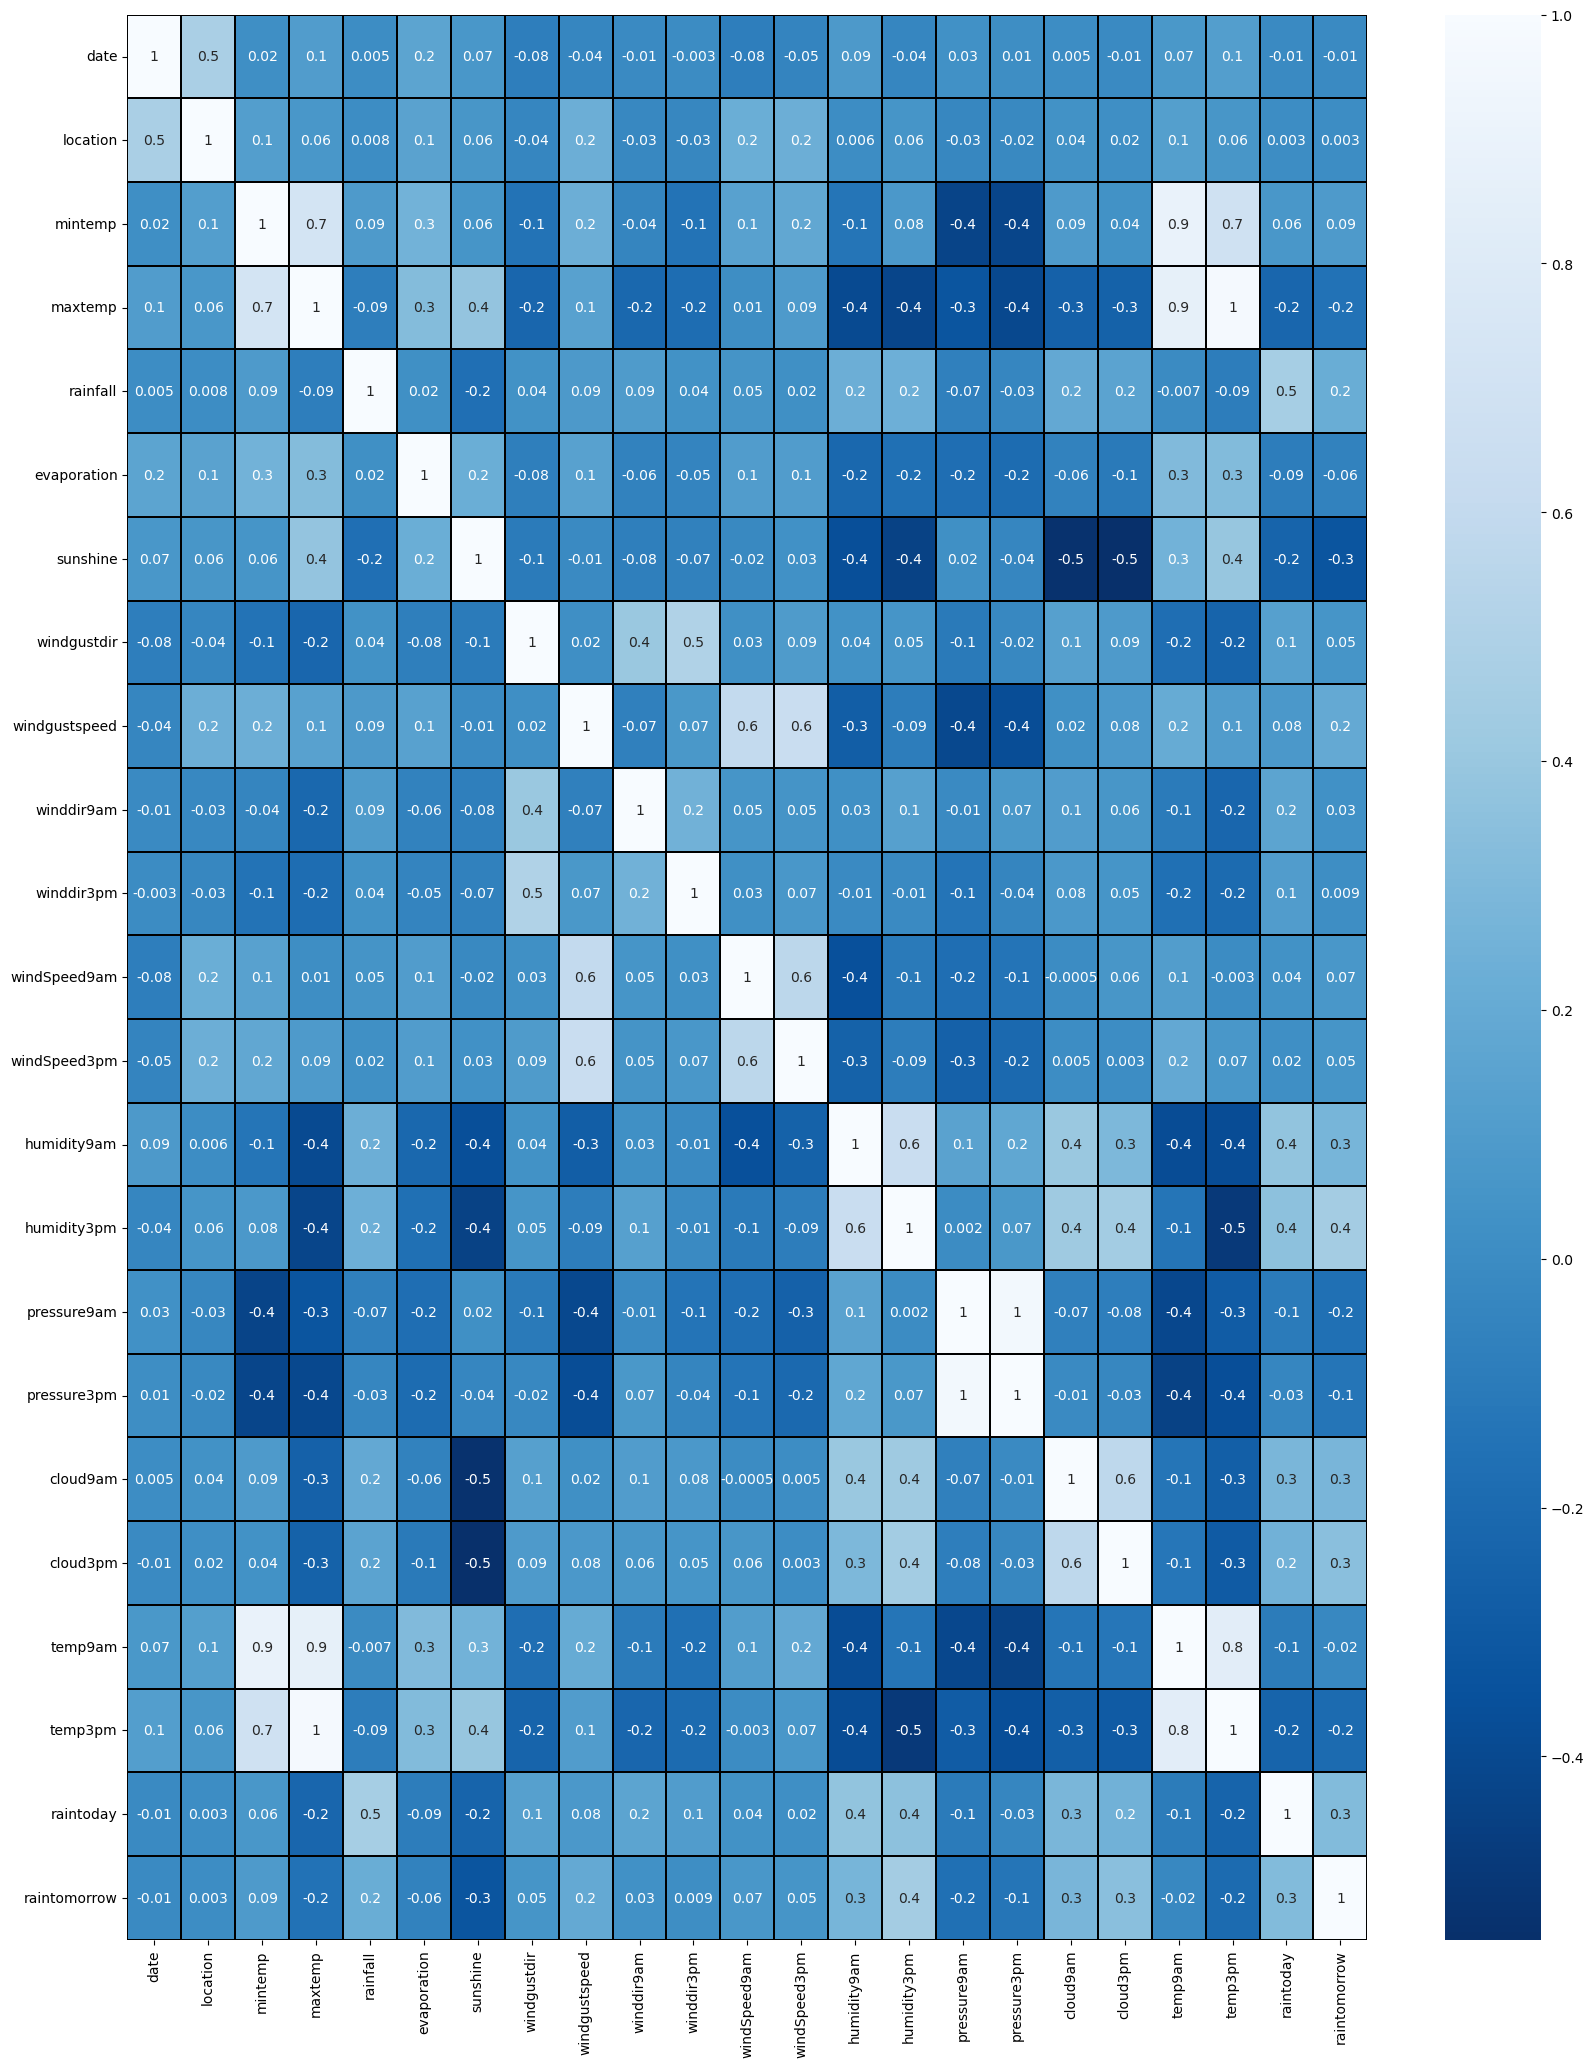

In [156]:
plt.figure (figsize = (20,25), facecolor = "white")
sns.heatmap(df.corr(),linewidth=0.1,fmt="0.1g",linecolor="black",annot=True,cmap="Blues_r")
plt.xticks(rotation=90);
plt.yticks(rotation=0);
plt.show()


In [157]:
'''If the Correlation Value is +1 (Highly Correlated) & If it is -1 (Negativelty Correlated)
   we need to analyse the values of each column and calculate their Negatively / Positively Correlation with all other columns.

   Here in the above Correlation - Heatmap we can find the correlation of columns with eachother & also with Target column
   which is explained as follows :-
   
   * Correlation of columns with each other :
     1. Minimum Temperature & Maximum Temperature is Highly Correlated with each other with = [.7]
     2. Minimum Temperature & Maximum Temperature is also Highly Correlated with Temp9am & Temp3pm with = [.9]
     3. WindSpeed9am & Windspeed3pm & WindgustDir are also correlated with each other with = [.6]
     4. Humidity9am & Humidity3pm are also Highly correlate with =[.6]
     5. Cloud9am & Cloud3pm are Highly Correlated with  =[.6]
     6. Pressureat9am & pressureat3pm are Most Higly Correlated Columns with  =[.1]
     
These Highly Correlated Columns can Affect our Model also so further after more analysis we will decide to remove or not. 
   '''

'If the Correlation Value is +1 (Highly Correlated) & If it is -1 (Negativelty Correlated)\n   we need to analyse the values of each column and calculate their Negatively / Positively Correlation with all other columns.\n\n   Here in the above Correlation - Heatmap we can find the correlation of columns with eachother & also with Target column\n   which is explained as follows :-\n   \n   * Correlation of columns with each other :\n     1. Minimum Temperature & Maximum Temperature is Highly Correlated with each other with = [.7]\n     2. Minimum Temperature & Maximum Temperature is also Highly Correlated with Temp9am & Temp3pm with = [.9]\n     3. WindSpeed9am & Windspeed3pm & WindgustDir are also correlated with each other with = [.6]\n     4. Humidity9am & Humidity3pm are also Highly correlate with =[.6]\n     5. Cloud9am & Cloud3pm are Highly Correlated with  =[.6]\n     6. Pressureat9am & pressureat3pm are Most Higly Correlated Columns with  =[.1]\n     \nThese Highly Correlated Co

In [158]:
''' We need to Analyse Given PREOBLEM STATEMENT , where we have to Analyse data with
    2 TARGET COLUMNS ['Raintomorrow'] & ['rainfall']
    
So here below we need to check all columns individual correlation with our 2 GIVEN TARGET COLUMNS :-

TARGET COLUMN -1 '''

print(cor['raintomorrow'].sort_values(ascending=False))

'''CONCLUSION - HIGHEST CORRELATED COLUMN WITH THE TARGET COLUMN-1 IS ['humidity3pm'] with = [.44] values.
                (which is not consider as a HIGHLY CORRELATION)
'''

raintomorrow     1.000000
humidity3pm      0.444808
cloud3pm         0.344369
raintoday        0.312929
cloud9am         0.278943
humidity9am      0.271222
rainfall         0.220021
windgustspeed    0.190127
mintemp          0.092942
windSpeed9am     0.068285
windSpeed3pm     0.053568
windgustdir      0.051832
winddir9am       0.032860
winddir3pm       0.008918
location         0.002824
date            -0.011228
temp9am         -0.023211
evaporation     -0.059012
pressure3pm     -0.135242
maxtemp         -0.152886
pressure9am     -0.163985
temp3pm         -0.193805
sunshine        -0.327731
Name: raintomorrow, dtype: float64


"CONCLUSION - HIGHEST CORRELATED COLUMN WITH THE TARGET COLUMN-1 IS ['humidity3pm'] with = [.44] values.\n                (which is not consider as a HIGHLY CORRELATION)\n"

In [159]:
'''WITH TARGET COLUMN -2'''

print(cor['rainfall'].sort_values(ascending=False))

'''CONCLUSION - HIGHEST CORRELATED COLUMN WITH THE TARGET COLUMN-1 IS ['raintoday'] with = [.46] values.
                (which is not consider as a HIGHLY CORRELATION)
'''

rainfall         1.000000
raintoday        0.461106
humidity3pm      0.235444
humidity9am      0.228800
raintomorrow     0.220021
cloud9am         0.185444
cloud3pm         0.150760
winddir9am       0.093821
mintemp          0.087684
windgustspeed    0.086000
windSpeed9am     0.050631
windgustdir      0.038812
winddir3pm       0.038560
windSpeed3pm     0.024791
evaporation      0.023517
location         0.007693
date             0.004945
temp9am         -0.007083
pressure3pm     -0.033649
pressure9am     -0.072668
maxtemp         -0.087451
temp3pm         -0.090687
sunshine        -0.169432
Name: rainfall, dtype: float64


"CONCLUSION - HIGHEST CORRELATED COLUMN WITH THE TARGET COLUMN-1 IS ['raintoday'] with = [.46] values.\n                (which is not consider as a HIGHLY CORRELATION)\n"

In [160]:
'''OVERALL CONCLUSION FOR ABOVE ANALYSIS = THERE IS NOT ANY COLUMN WHICH IS HIGHLY CORRELATED WITH BOTH TARGET COLUMNS'''

'OVERALL CONCLUSION FOR ABOVE ANALYSIS = THERE IS NOT ANY COLUMN WHICH IS HIGHLY CORRELATED WITH BOTH TARGET COLUMNS'

========== NOW NEED TO CHEK OUTLIERS IN THE DATASET ===================

In [161]:
df.describe()
# here in the describe methode we are getting soo many STATISTICAL INFORMATION about the dataset for each column.
# 1. first of all above we are getting 'count' for each of the column.
#                 as we know the total number of row counts for each column is 18,249. and here we are getting count for each..
#                 ... column is smame. not a single blank/'nan' is present in any of the column.

# 2. MEAN : In this, we can get MEAN VALUE for the every column.
# 3. STD : which is Standard Deviation , which shows that how the data of the column is deviate from its MEAN.
# 4. MIN : It shows the Minimum value present in the column.
# 5. 25% : It gives us the 25th Percentile Value in the column.
# 6. 50% : It gives us the 50th Percentile Value in the column.
# 7. 75% : It gives us the 75th Percentile Value in the column.
# 8. Max : It gives us the MAXIMUM VALUE present the column.

# As If in any column the Difference between the value at 75th Percentile & MAX is Higher then, there may be presence of outlier
# so we have to check the 75th% & MAX for each of the column.


,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,windSpeed9am,windSpeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,1296.570564,5.793591,13.193305,23.859976,2.805913,5.389395,7.632205,7.217804,40.174469,7.267418,7.810445,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,0.236202,0.236320
std,854.249434,3.162654,5.379488,6.114516,10.309308,3.852004,2.825451,4.702616,13.776101,4.588045,4.430162,10.128579,9.704759,16.774231,18.311894,6.275759,6.217451,2.429205,2.299419,5.608301,5.945849,0.424773,0.424846
min,0.000000,0.000000,-2.000000,8.200000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000
25%,589.000000,3.000000,9.300000,19.300000,0.000000,4.000000,7.632205,3.000000,31.000000,3.000000,4.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000,0.000000,0.000000
50%,1088.000000,6.000000,13.200000,23.300000,0.000000,5.389395,7.632205,7.000000,40.174469,7.000000,8.000000,13.000000,19.000000,68.000000,51.000000,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.000000,0.000000,0.000000
75%,2021.000000,8.000000,17.300000,28.000000,1.400000,5.389395,8.900000,12.000000,48.000000,12.000000,11.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000,0.000000,0.000000
max,3003.000000,11.000000,28.500000,45.500000,371.000000,145.000000,13.900000,15.000000,107.000000,15.000000,15.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,1.000000,1.000000


In [162]:
'''
here in the above table we can find difference in 75% & MAX in the following columns, so there may may be presence of OUTLIER
in those columns.

==>> maxtemp, rainfall, Evaporation, Sunshine, windgustspeed, windspeed9am & 3pm, Pressure 9am & 3pm, Temp 9am & 3pm 

in above 3 columns there is huge difference between 75% & Maximum  so we need more focus on those columns while cheking outliers.
BUT WE CAN NOT REMOVE OUTLIERS FROM ['rainfall'] BECAUSE IT OUR TARGET COLUMN. & WE CAN'T REMOVE OUTLIERS FROM TARGET COLUMN.
'''

"\nhere in the above table we can find difference in 75% & MAX in the following columns, so there may may be presence of OUTLIER\nin those columns.\n\n==>> maxtemp, rainfall, Evaporation, Sunshine, windgustspeed, windspeed9am & 3pm, Pressure 9am & 3pm, Temp 9am & 3pm \n\nin above 3 columns there is huge difference between 75% & Maximum  so we need more focus on those columns while cheking outliers.\nBUT WE CAN NOT REMOVE OUTLIERS FROM ['rainfall'] BECAUSE IT OUR TARGET COLUMN. & WE CAN'T REMOVE OUTLIERS FROM TARGET COLUMN.\n"

In [163]:
df.columns.nunique()
# 23 Numbers of columns are present in the dataset

23

In [164]:
df.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windSpeed9am', 'windSpeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'raintomorrow'],
      dtype='object')

In [165]:
df1 = df[['date', 'location', 'mintemp','rainfall', 'maxtemp', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windSpeed9am', 'windSpeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday','raintomorrow']]

# do not take both target columns in this new dataframe, where can apply outlier removal techniques.

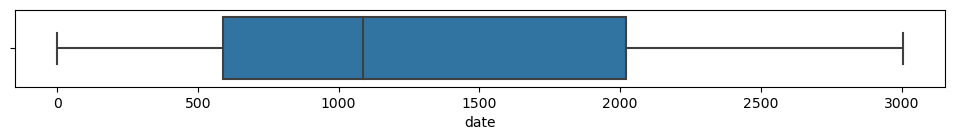

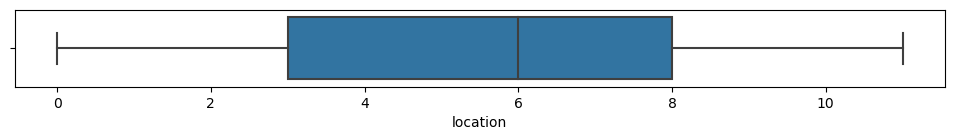

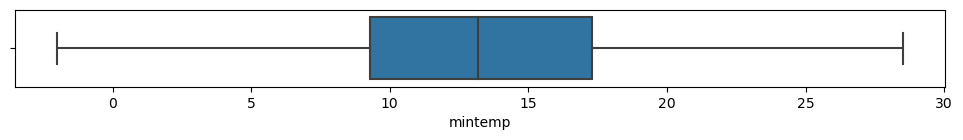

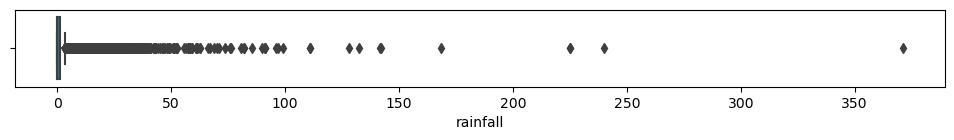

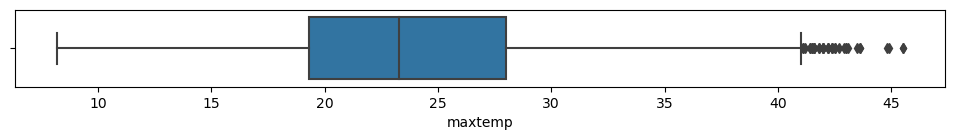

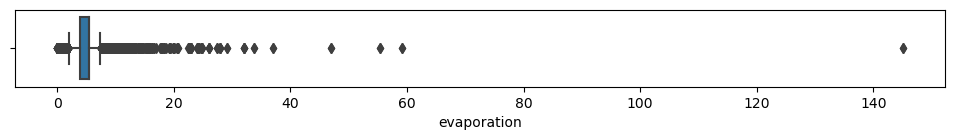

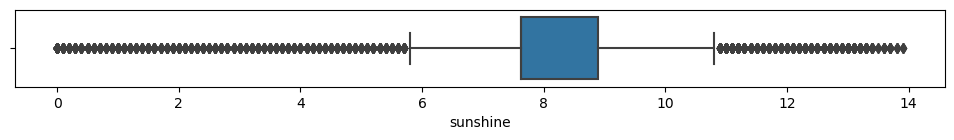

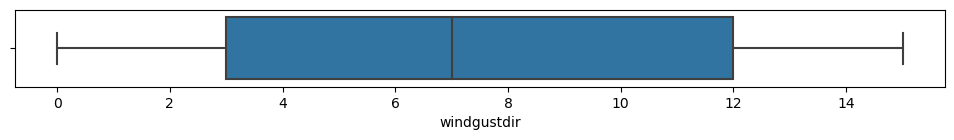

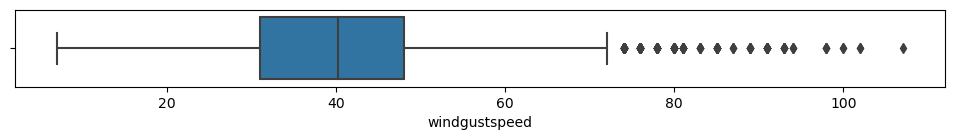

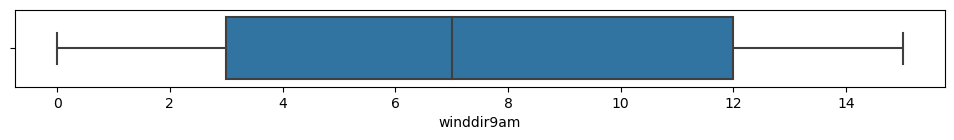

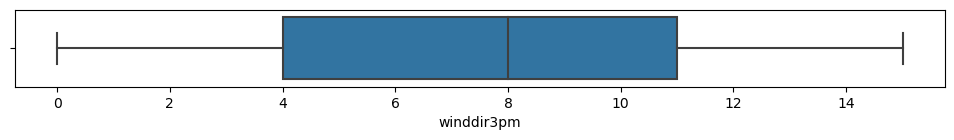

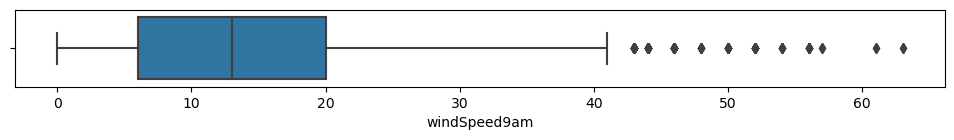

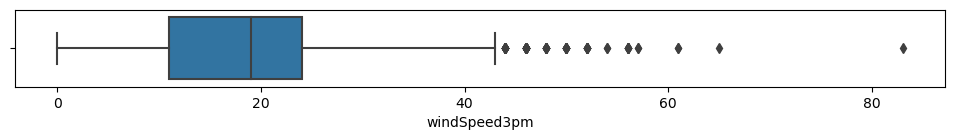

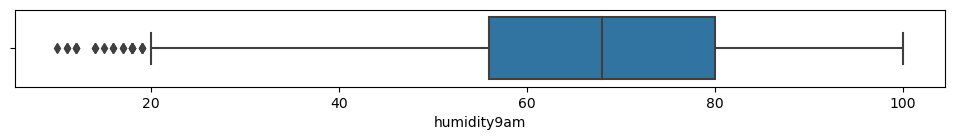

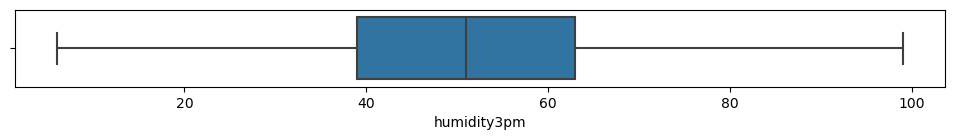

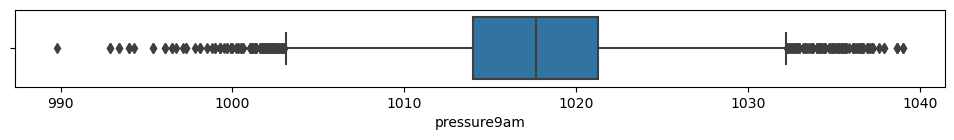

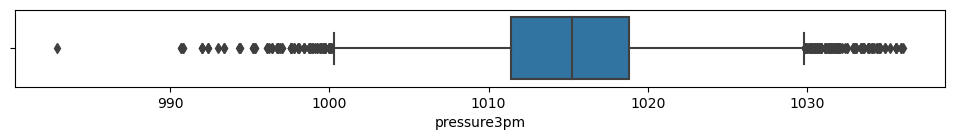

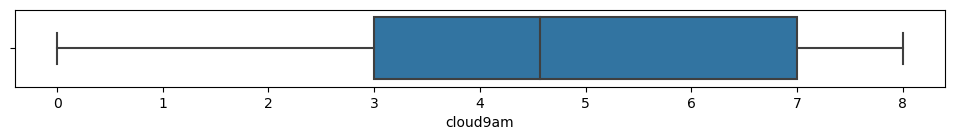

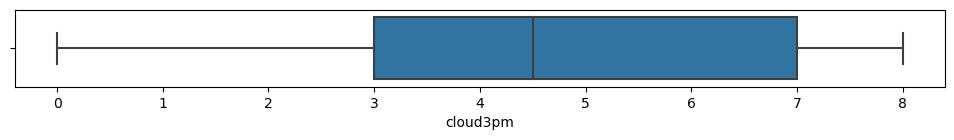

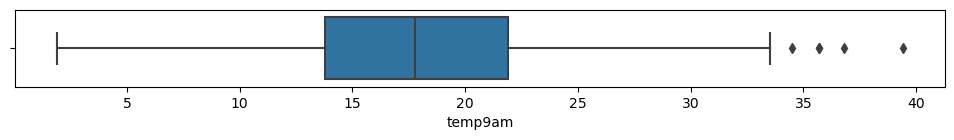

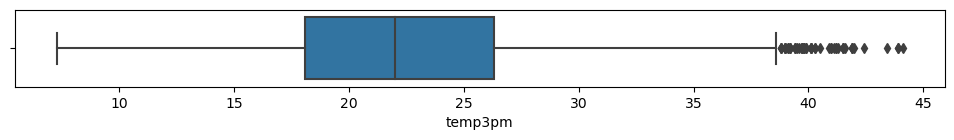

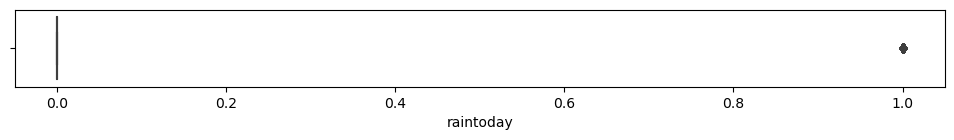

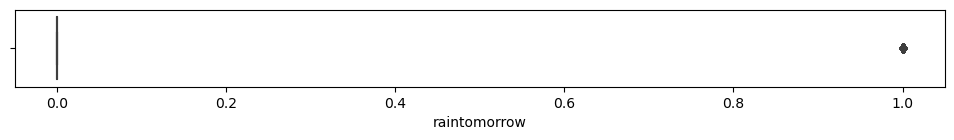

In [166]:
for i in df1.columns[0:23]:
    plt.figure (figsize = (12,1), facecolor = "white")
    sns.boxplot(x=i,data=df1)
    plt.show()
    
#  here below we can find the outliers for all the cloumns by using boxplot.
#  and we found outliers in :
#  maxtemp, Evaporation, Sunshine, windgustspeed, windspeed9am & 3pm, Pressure 9am & 3pm, Temp 9am & 3pm
#  are having outliers.
# so out of 23 columns we found OUTLIERS IN 10 COLUMNS , now we have to remove those outliers from out dataset.

========== REMOVING OF OUTLIERS BY USING Z-SCORE METHOD  ====================

In [167]:
# For Removing Outliers, first we need to identify the ZSCORE VALUES, for which we have to import some libraries.

In [168]:
from scipy.stats import zscore

In [169]:
z = np.abs(zscore(df1))
z.head(5)

# by applying 'abs' (absolute method), we are getting all the entries whose z-score value is positive side
#  Ideally we can call the OUTLIERS whos ZSCORE VALUE is LESS THEN 3 AND MORE THEN 3
# so we have to remove all the data whose ZSCORE >3 & <3
#  below here we apllying "abs" i.e absolute method it returns us the all zscore values greater then 3
#  so we just need to remove lesserr then 3 zscore values.

,date,location,mintemp,rainfall,maxtemp,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,windSpeed9am,windSpeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
0,1.517879,1.515776,0.038425,0.213986,0.157009,2.305893e-16,3.143679e-16,1.229643,0.277710,1.249535,1.397222,0.607461,0.563297,0.189439,1.597406,1.584003,1.308665,1.413459,3.862851e-16,0.153712,0.108138,0.556099,0.556282
1,1.516709,1.515776,1.076989,0.272189,0.202812,2.305893e-16,3.143679e-16,1.442303,0.277710,0.276260,1.622961,0.972321,0.357200,1.420268,1.433568,1.121880,1.196072,0.000000,3.862851e-16,0.100217,0.312348,0.556099,0.556282
2,1.515538,1.515776,0.054526,0.272189,0.300945,2.305893e-16,3.143679e-16,1.654964,0.422897,1.249535,1.622961,0.508725,0.769394,1.777981,1.160505,1.599939,1.051309,0.000000,1.088680e+00,0.577390,0.127334,0.556099,0.556282
3,1.514367,1.515776,0.742365,0.272189,0.677121,2.305893e-16,3.143679e-16,0.684299,1.174166,0.377652,1.763120,0.281166,0.982428,1.360650,1.925081,0.006411,0.391836,0.000000,3.862851e-16,0.060269,0.682376,0.556099,0.556282
4,1.513197,1.515776,0.800625,0.175183,1.380408,2.305893e-16,3.143679e-16,1.229643,0.059928,1.366114,0.182949,0.676112,0.151104,0.845246,0.996668,1.090010,1.485596,1.001777,1.520830e+00,0.006773,1.220599,0.556099,0.556282


In [170]:
threshold = 3
print(np.where(z>3))

(array([  12,   12,   44,   44,   52,   52,   60,   60,   61,   61,   62,
         62,   62,   67,   68,   68,  123,  267,  296,  381,  381,  405,
        406,  407,  407,  431,  462,  563,  568,  568,  569,  602,  683,
        683,  699,  713,  748,  748,  770,  796,  797,  802,  928,  935,
        949,  979,  980,  980,  980, 1008, 1009, 1011, 1138, 1148, 1149,
       1151, 1189, 1202, 1203, 1237, 1241, 1264, 1265, 1357, 1411, 1412,
       1413, 1479, 1480, 1481, 1513, 1535, 1587, 1644, 1661, 1665, 1673,
       1680, 1774, 1819, 1873, 1898, 1903, 1945, 2016, 2028, 2043, 2063,
       2074, 2108, 2116, 2186, 2201, 2219, 2219, 2230, 2231, 2265, 2429,
       2488, 2500, 2505, 2527, 2527, 2541, 2593, 2676, 2677, 2735, 2827,
       2835, 2849, 2849, 2855, 2859, 2863, 2869, 2877, 2883, 2890, 2891,
       2897, 2898, 2900, 2901, 2905, 2909, 2911, 2919, 2925, 2933, 2939,
       2947, 2953, 2961, 2967, 2975, 2989, 3003, 3051, 3051, 3058, 3059,
       3059, 3060, 3066, 3067, 3067, 3067, 3068, 3

In [171]:
df_new = df1[(z<3).all(axis=1)]
df_new

# here we can see the difference clearly that, earlier there was 8425 total rows are there, and now after removing outliers..
# ...there are only 7987 rows are present in our dataset.
# so there are  438 OUTLIERS are removed during this process.

,date,location,mintemp,rainfall,maxtemp,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,windSpeed9am,windSpeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
0,0,1,13.4,0.6,22.900000,5.389395,7.632205,13,44.000000,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0
1,1,1,7.4,0.0,25.100000,5.389395,7.632205,14,44.000000,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0
2,2,1,12.9,0.0,25.700000,5.389395,7.632205,15,46.000000,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0
3,3,1,9.2,0.0,28.000000,5.389395,7.632205,4,24.000000,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0
4,4,1,17.5,1.0,32.300000,5.389395,7.632205,13,41.000000,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2999,9,2.8,0.0,23.400000,5.389395,7.632205,0,31.000000,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0,0
8421,3000,9,3.6,0.0,25.300000,5.389395,7.632205,6,22.000000,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0,0
8422,3001,9,5.4,0.0,26.900000,5.389395,7.632205,3,37.000000,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0,0
8423,3002,9,7.8,0.0,27.000000,5.389395,7.632205,9,28.000000,10,3,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0,0


In [172]:
print(df.shape)
print(df_new.shape)

(8425, 23)
(7987, 23)


In [173]:
''' Here above we can clearly see the difference in dataset shape before and after removing OUTLIERS form the dataset.
Earlier there was 8425 Rows are there and after removing outliers there are only 7987 Rows are remaining.

So There are [ 438 ] Outliers are removed during the process.'''

' Here above we can clearly see the difference in dataset shape before and after removing OUTLIERS form the dataset.\nEarlier there was 8425 Rows are there and after removing outliers there are only 7987 Rows are remaining.\n\nSo There are [ 438 ] Outliers are removed during the process.'

===============CHECKING REMOVAL OF OUTLIERS BY BOXPLOT (COMPARING  'df1'  &  'df_new') ========================

In [174]:
df.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windSpeed9am', 'windSpeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'raintomorrow'],
      dtype='object')

In [175]:
'''Following are the Columns where outliers are present earlier :-
# maxtemp, #evaporation, #Sunshine, #windgustspeed, #windspeed9am & 3pm, #Pressure 9am & 3pm, #Temp 9am & 3pm'''

'Following are the Columns where outliers are present earlier :-\n# maxtemp, #evaporation, #Sunshine, #windgustspeed, #windspeed9am & 3pm, #Pressure 9am & 3pm, #Temp 9am & 3pm'

In [176]:
'''# Analysing BEFORE & AFTER REMOVAL OF OUTLIERS (column by column) =====>>>>'''

'# Analysing BEFORE & AFTER REMOVAL OF OUTLIERS (column by column) =====>>>>'

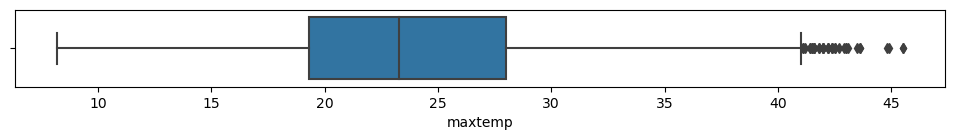

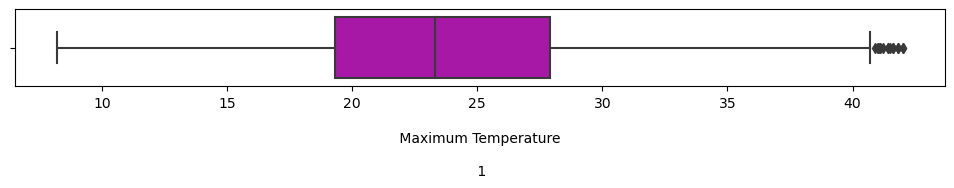

In [177]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='maxtemp',data=df1)
plt.show()

# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='maxtemp',data=df_new, color='m')
plt.xlabel('\n Maximum Temperature \n\n 1')
plt.show()

# outliers are succesfully removed.
# it is the Newer (df_new dataset)  OUTLIERS ARE REMOVED.
# So as we can see , outlier which is removed above by Z-SCORE METHOD is from column.

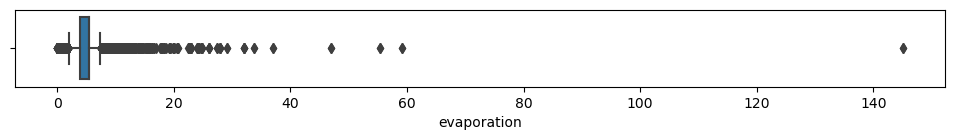

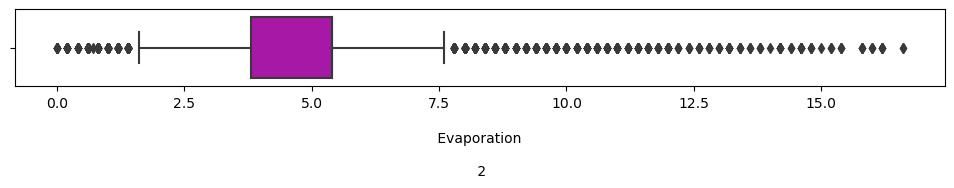

In [178]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='evaporation',data=df1)
plt.show()

# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='evaporation',data=df_new, color='m')
plt.xlabel('\n Evaporation \n\n 2')
plt.show()

# outliers are succesfully removed.
# it is the Newer (df_new dataset)  OUTLIERS ARE REMOVED.
# So as we can see , outlier which is removed above by Z-SCORE METHOD is from column.

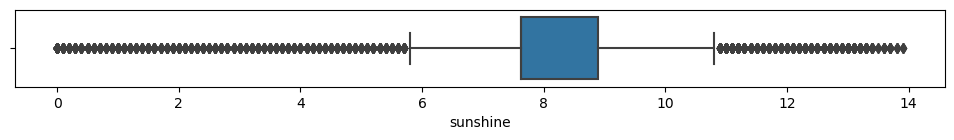

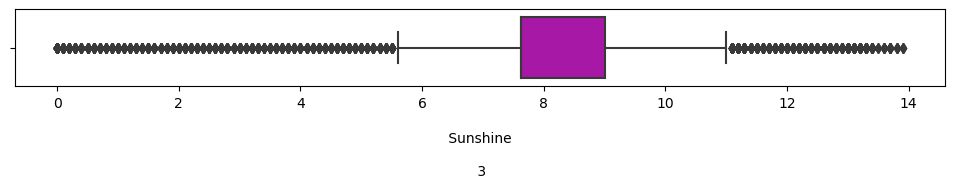

In [179]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='sunshine',data=df1)
plt.show()

# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='sunshine',data=df_new, color='m')
plt.xlabel('\n Sunshine \n\n 3')
plt.show()

# No Removal Of outliers From this Column.
# it is the Newer (df_new dataset)  NO OUTLIERS ARE REMOVED.

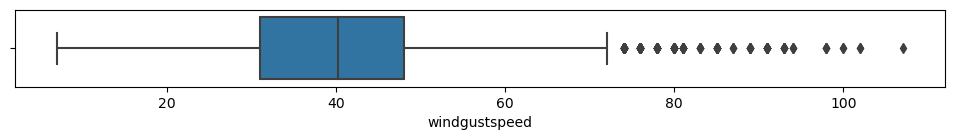

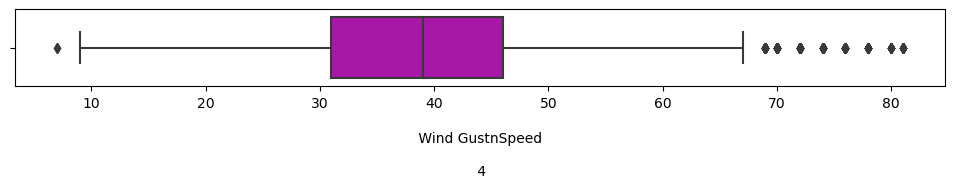

In [180]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='windgustspeed',data=df1)
plt.show()

# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='windgustspeed',data=df_new, color='m')
plt.xlabel('\n Wind GustnSpeed \n\n 4')
plt.show()

# outliers are succesfully removed.
# it is the Newer (df_new dataset)  OUTLIERS ARE REMOVED.
# So as we can see , outlier which is removed above by Z-SCORE METHOD is from column.

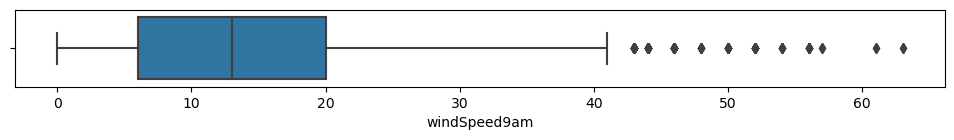

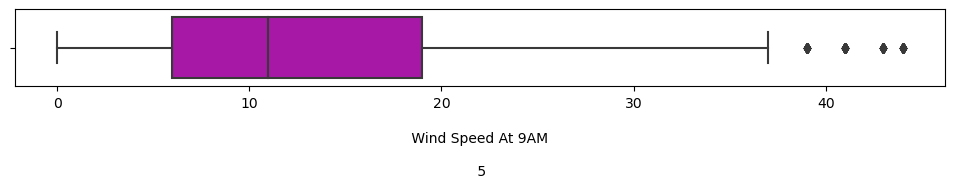

In [181]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='windSpeed9am',data=df1)
plt.show()

# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='windSpeed9am',data=df_new, color='m')
plt.xlabel('\n Wind Speed At 9AM \n\n 5')
plt.show()

# outliers are succesfully removed.
# it is the Newer (df_new dataset)  OUTLIERS ARE REMOVED.
# So as we can see , outlier which is removed above by Z-SCORE METHOD is from column.

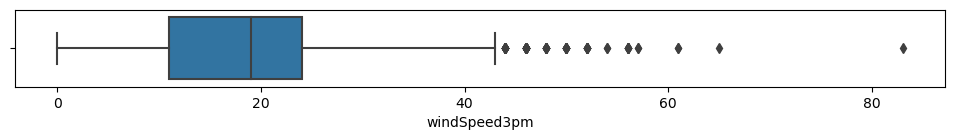

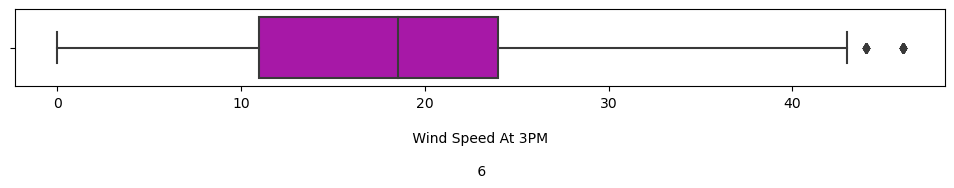

In [182]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='windSpeed3pm',data=df1)
plt.show()

# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='windSpeed3pm',data=df_new, color='m')
plt.xlabel('\n Wind Speed At 3PM \n\n 6')
plt.show()

# outliers are succesfully removed.
# it is the Newer (df_new dataset)  OUTLIERS ARE REMOVED.
# So as we can see , outlier which is removed above by Z-SCORE METHOD is from column.

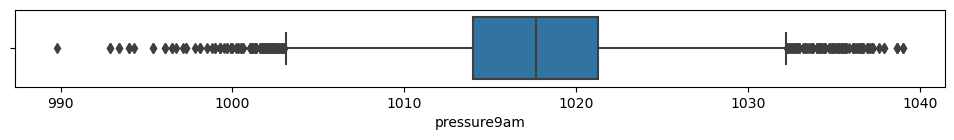

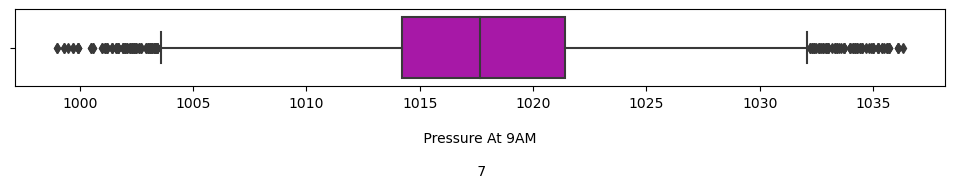

In [183]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='pressure9am',data=df1)
plt.show()

# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='pressure9am',data=df_new, color='m')
plt.xlabel('\n Pressure At 9AM \n\n 7')
plt.show()

# outliers are succesfully removed.
# it is the Newer (df_new dataset)  OUTLIERS ARE REMOVED.
# So as we can see , outlier which is removed above by Z-SCORE METHOD is from column.

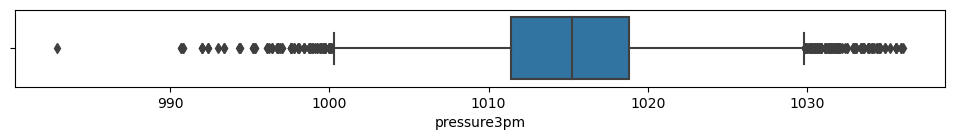

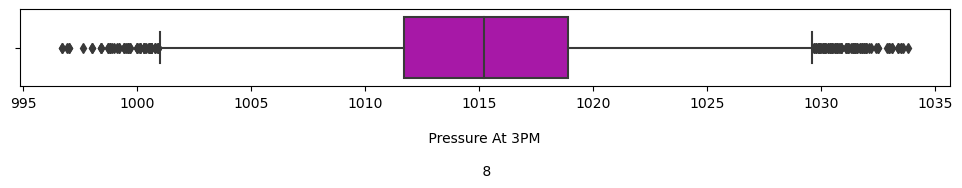

In [184]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='pressure3pm',data=df1)
plt.show()

# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='pressure3pm',data=df_new, color='m')
plt.xlabel('\n Pressure At 3PM \n\n 8')
plt.show()

# outliers are succesfully removed.
# it is the Newer (df_new dataset)  OUTLIERS ARE REMOVED.
# So as we can see , outlier which is removed above by Z-SCORE METHOD is from column.

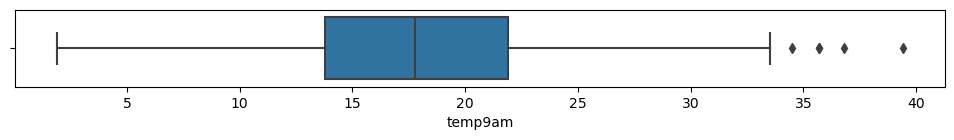

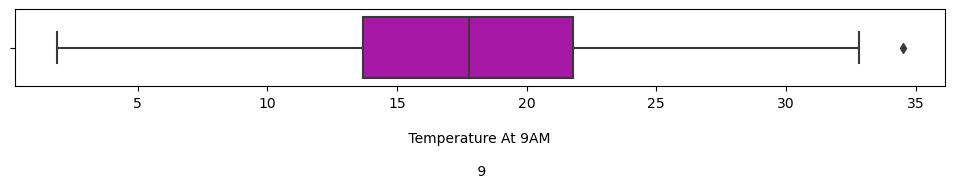

In [185]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='temp9am',data=df1)
plt.show()

# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='temp9am',data=df_new, color='m')
plt.xlabel('\n Temperature At 9AM \n\n 9')
plt.show()

# outliers are succesfully removed.
# it is the Newer (df_new dataset)  OUTLIERS ARE REMOVED.
# So as we can see , outlier which is removed above by Z-SCORE METHOD is from column.

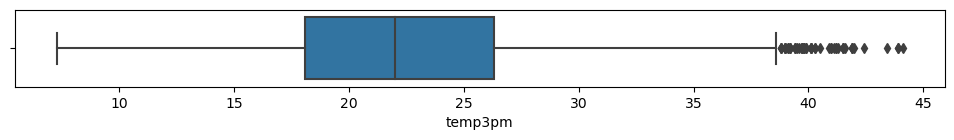

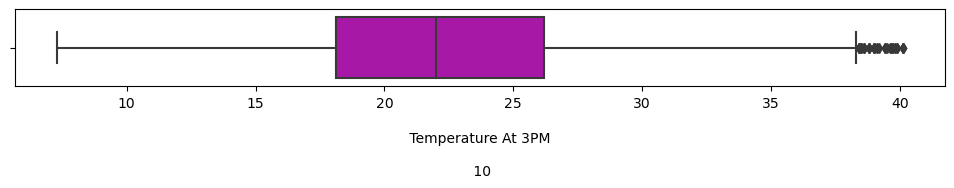

In [186]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='temp3pm',data=df1)
plt.show()

# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='temp3pm',data=df_new, color='m')
plt.xlabel('\n Temperature At 3PM \n\n 10')
plt.show()

# outliers are succesfully removed.
# it is the Newer (df_new dataset)  OUTLIERS ARE REMOVED.
# So as we can see , outlier which is removed above by Z-SCORE METHOD is from column.

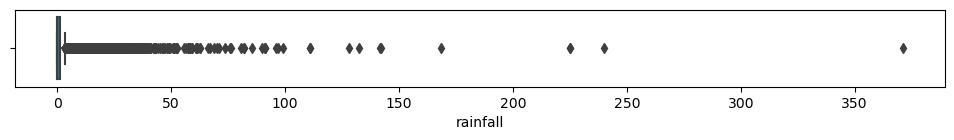

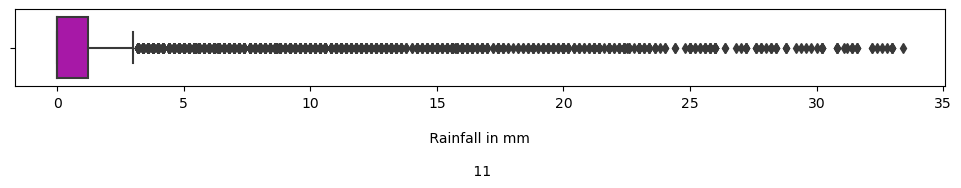

In [187]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='rainfall',data=df1)
plt.show()

# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='rainfall',data=df_new, color='m')
plt.xlabel('\n Rainfall in mm \n\n 11')
plt.show()

# outliers are succesfully removed.
# it is the Newer (df_new dataset)  OUTLIERS ARE REMOVED.
# So as we can see , outlier which is removed above by Z-SCORE METHOD is from column.

In [188]:
'''CONCLUSION = THERE ARE TOTAL 330 OUTLIERS ARE REMOVED FROM 10 COLUMS SUCCESSFULLY'''

'CONCLUSION = THERE ARE TOTAL 330 OUTLIERS ARE REMOVED FROM 10 COLUMS SUCCESSFULLY'

========================   CHECKING SKEWNESS  ======================================================

In [189]:
# the skewness shows the distribution of data, if the data is widely skewed that means it is not good for our model.
#  ideal range of skewness is ( -0.5 to +0.5)
# We can't remove skewness from our Target Column

In [190]:
df_new.skew()

# here below we  find any skewness in 'RAINFALL' in the data,
# there is little skewness is present in ' RAIN TODAY' , we Cant remove it. beaucse it a categorical columns where values are
# ..in only 'yes' or 'no'



date             0.398008
location        -0.040284
mintemp         -0.084549
rainfall         3.488446
maxtemp          0.314510
evaporation      0.846181
sunshine        -0.723970
windgustdir      0.112339
windgustspeed    0.506897
winddir9am       0.160081
winddir3pm      -0.126255
windSpeed9am     0.711395
windSpeed3pm     0.300109
humidity9am     -0.231656
humidity3pm      0.125150
pressure9am      0.020735
pressure3pm      0.044876
cloud9am        -0.356892
cloud3pm        -0.266829
temp9am         -0.038035
temp3pm          0.334170
raintoday        1.301170
raintomorrow     1.296077
dtype: float64

DIVIDING DATA INTO INDEPENDENT & TARGET VARIABLE ===================================================================================================================

In [191]:
df_new.columns

Index(['date', 'location', 'mintemp', 'rainfall', 'maxtemp', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windSpeed9am', 'windSpeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'raintomorrow'],
      dtype='object')

In [192]:
''' FOR CONDITION -1'''

' FOR CONDITION -1'

In [193]:
x1 = df_new[['date', 'location', 'mintemp', 'rainfall', 'maxtemp', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windSpeed9am', 'windSpeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday']]


In [194]:
y1= df_new[['raintomorrow']]

In [195]:
''' FOR CONDITION -2'''

' FOR CONDITION -2'

In [196]:
x2 = df_new[['date', 'location', 'mintemp', 'maxtemp', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windSpeed9am', 'windSpeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday','raintomorrow']]


In [197]:
y2= df_new[['rainfall']]

In [198]:
print(x1.shape)
print(y1.shape)

(7987, 22)
(7987, 1)


In [199]:
print(x2.shape)
print(y2.shape)

(7987, 22)
(7987, 1)


 APPLYING SCALING TECHNIQUES ==================================================================================================================>>>>>>

In [200]:
# here we need to apply scaling techniques on our dataset,by scaling techniques we normalise the values.
#  we can't apply SCALING TECHNIQUES on TARGET VARIABLE
#  to aplly scaling techinuque we need to import some libraries first.

In [201]:
from sklearn.preprocessing import StandardScaler

In [202]:
st = StandardScaler()

=========================================================================================================================

In [203]:
                                    '''APPLYING SCALING TECHNIQUES FOR CONDITION-1'''

' FOR CONDITION-1'

In [204]:
x1 = st.fit_transform(x1)
x1

array([[-1.51886155, -1.50842735,  0.05644354, ..., -0.13809939,
        -0.09859334, -0.54247553],
       [-1.51768225, -1.50842735, -1.05847646, ..., -0.08425401,
         0.32974721, -0.54247553],
       [-1.51650296, -1.50842735, -0.03646646, ...,  0.59778751,
         0.14127737, -0.54247553],
       ...,
       [ 2.02020726,  1.02942282, -1.43011646, ..., -0.92783168,
         0.6381524 , -0.54247553],
       [ 2.02138656,  1.02942282, -0.98414846, ..., -0.46117169,
         0.62101878, -0.54247553],
       [ 2.02256586,  1.02942282,  0.33517354, ..., -0.47912015,
        -0.25279593, -0.54247553]])

In [205]:
xf1 = pd.DataFrame(data=x1)
print(xf1)

# here we get our dataset (xf1) after applying SCALING TECHING (STANDARD SCALER)


            0         1         2         3         4         5         6   \
0    -1.518862 -1.508427  0.056444 -0.282088 -0.145732  0.110484 -0.013374   
1    -1.517682 -1.508427 -1.058476 -0.408537  0.220676  0.110484 -0.013374   
2    -1.516503 -1.508427 -0.036466 -0.408537  0.320605  0.110484 -0.013374   
3    -1.515324 -1.508427 -0.724000 -0.408537  0.703668  0.110484 -0.013374   
4    -1.514144 -1.508427  0.818306 -0.197789  1.419829  0.110484 -0.013374   
...        ...       ...       ...       ...       ...       ...       ...   
7982  2.017849  1.029423 -1.913248 -0.408537 -0.062457  0.110484 -0.013374   
7983  2.019028  1.029423 -1.764592 -0.408537  0.253986  0.110484 -0.013374   
7984  2.020207  1.029423 -1.430116 -0.408537  0.520464  0.110484 -0.013374   
7985  2.021387  1.029423 -0.984148 -0.408537  0.537119  0.110484 -0.013374   
7986  2.022566  1.029423  0.335174 -0.408537  0.014151  0.110484 -0.013374   

            7         8         9         10        11        1

In [206]:
xf1.columns

RangeIndex(start=0, stop=22, step=1)

In [207]:
column = ['date', 'location','rainfall', 'mintemp', 'maxtemp', 'evaporation', 'sunshine',
       'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windSpeed9am', 'windSpeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday']

In [208]:
xf1.columns = column

In [209]:
yf1 = y1
# assigning y1 (target column to yf1)

In [210]:
xf1.columns

Index(['date', 'location', 'rainfall', 'mintemp', 'maxtemp', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windSpeed9am', 'windSpeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday'],
      dtype='object')

In [211]:
yf1.head(2)

,raintomorrow
0,0
1,0


In [212]:
print(xf1.shape)
print(yf1.shape)

(7987, 22)
(7987, 1)


In [213]:
y1['raintomorrow'].nunique()

2

In [214]:
yf1.value_counts()

raintomorrow
0               6165
1               1822
dtype: int64

=========================================================================================================================

In [215]:
                                    '''APPLYING SCALING TECHNIQUES FOR CONDITION-2'''

'FOR CONDITION-2'

In [216]:
x2 = st.fit_transform(x2)
x2

array([[-1.51886155, -1.50842735,  0.05644354, ..., -0.09859334,
        -0.54247553, -0.5436353 ],
       [-1.51768225, -1.50842735, -1.05847646, ...,  0.32974721,
        -0.54247553, -0.5436353 ],
       [-1.51650296, -1.50842735, -0.03646646, ...,  0.14127737,
        -0.54247553, -0.5436353 ],
       ...,
       [ 2.02020726,  1.02942282, -1.43011646, ...,  0.6381524 ,
        -0.54247553, -0.5436353 ],
       [ 2.02138656,  1.02942282, -0.98414846, ...,  0.62101878,
        -0.54247553, -0.5436353 ],
       [ 2.02256586,  1.02942282,  0.33517354, ..., -0.25279593,
        -0.54247553, -0.5436353 ]])

In [217]:
xf2 = pd.DataFrame(data=x2)
print(xf2)

# here we get our dataset (xf2) after applying SCALING TECHING (STANDARD SCALER)


            0         1         2         3         4         5         6   \
0    -1.518862 -1.508427  0.056444 -0.145732  0.110484 -0.013374  1.229267   
1    -1.517682 -1.508427 -1.058476  0.220676  0.110484 -0.013374  1.441960   
2    -1.516503 -1.508427 -0.036466  0.320605  0.110484 -0.013374  1.654654   
3    -1.515324 -1.508427 -0.724000  0.703668  0.110484 -0.013374 -0.684977   
4    -1.514144 -1.508427  0.818306  1.419829  0.110484 -0.013374  1.229267   
...        ...       ...       ...       ...       ...       ...       ...   
7982  2.017849  1.029423 -1.913248 -0.062457  0.110484 -0.013374 -1.535751   
7983  2.019028  1.029423 -1.764592  0.253986  0.110484 -0.013374 -0.259589   
7984  2.020207  1.029423 -1.430116  0.520464  0.110484 -0.013374 -0.897670   
7985  2.021387  1.029423 -0.984148  0.537119  0.110484 -0.013374  0.378492   
7986  2.022566  1.029423  0.335174  0.014151  0.110484 -0.013374 -0.897670   

            7         8         9         10        11        1

In [218]:
xf2.columns

RangeIndex(start=0, stop=22, step=1)

In [219]:
column2 = ['date', 'location', 'mintemp', 'maxtemp', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windSpeed9am', 'windSpeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday','raintomorrow']

In [220]:
xf2.columns = column2

In [221]:
yf2=y2

In [222]:
xf2.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'evaporation', 'sunshine',
       'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windSpeed9am', 'windSpeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'raintomorrow'],
      dtype='object')

In [223]:
yf2.head(2)

,rainfall
0,0.6
1,0.0


In [224]:
print(xf2.shape)
print(yf2.shape)

(7987, 22)
(7987, 1)


In [225]:
y2['rainfall'].nunique()

171

In [226]:
y2.value_counts()

rainfall 
0.000000     5071
0.200000      390
2.805913      232
0.400000      176
0.600000      115
             ... 
26.800000       1
22.800000       1
6.300000        1
23.800000       1
33.400000       1
Length: 171, dtype: int64

FINDING MULTICOLINEARITY ======================================================================================================================

In [227]:
# We have to find the multicollinearity between the features and to remove it we can use VIF (VARIANCE INFLATION FACTOR)
# we can not apply VIF on the TARGET COLUMN
# for apllyin VIF we have to import some libraries as follows

In [228]:
import statsmodels.api as sm
from scipy import stats
from statsmodels .stats.outliers_influence import variance_inflation_factor

===================================================================================================================

In [229]:
                                           '''CALCULATING VIF FOR CONDITION-1'''

'CALCULATING VIF FOR CONDITION-1'

In [230]:
# here we are making "def function" for calculating VIF 
def calc_vif(xf1):
    vif = pd.DataFrame()
    vif["FETURES"] = xf1.columns
    vif["VIF FACTOR"] = [variance_inflation_factor(xf1.values,i) for i in range (xf1.shape[1])]
    return (vif)

In [231]:
calc_vif(xf1)
# here we can't find any HIGHER Multicolinearity in our dataset

,FETURES,VIF FACTOR
0,date,1.481534
1,location,1.543485
2,rainfall,8.554876
3,mintemp,1.953926
4,maxtemp,26.363719
5,evaporation,1.543202
6,sunshine,1.939156
7,windgustdir,1.614334
8,windgustspeed,2.313953
9,winddir9am,1.352454


In [232]:
''' here above we find the MultiCollinearity, and we found that the Highest Multicollinearity is at ['temp3pm'] & ['maxtemp']
both the columns Min-temp,Max-temp are correlated with Temp-9am, temp_3pm are showing Multicollinearity & also showing
the repeated values of tempreature. So we can drop any one of them.
'''

" here above we find the MultiCollinearity, and we found that the Highest Multicollinearity is at ['temp3pm'] & ['maxtemp']\nboth the columns Min-temp,Max-temp are correlated with Temp-9am, temp_3pm are showing Multicollinearity & also showing\nthe repeated values of tempreature. So we can drop any one of them.\n"

In [233]:
xf1.drop(['temp3pm'],axis=1,inplace=True)

In [234]:
xf1.drop(['temp9am'],axis=1,inplace=True)

In [235]:
calc_vif(xf1)
# the Highest Multicollinearity is successfully reduced.

,FETURES,VIF FACTOR
0,date,1.454183
1,location,1.540309
2,rainfall,4.593034
3,mintemp,1.951865
4,maxtemp,5.757207
5,evaporation,1.537367
6,sunshine,1.930888
7,windgustdir,1.610235
8,windgustspeed,2.264126
9,winddir9am,1.351331


In [236]:
'''
HERE ABOVE WE CAN CLEALRY SEE THE DIFFERENCE

Now there is not much any higher VIF VALUE that means our dataset is not MULTICOLLINEARED NOW
and we can apply the further operations on our dataset for the prediction.
'''

'\nHERE ABOVE WE CAN CLEALRY SEE THE DIFFERENCE\n\nNow there is not much any higher VIF VALUE that means our dataset is not MULTICOLLINEARED NOW\nand we can apply the further operations on our dataset for the prediction.\n'

=======================================================================================================================

In [237]:
                                         '''CALULATING VIF FOR CONDITION-2'''

'CALULATING VIF FOR CONDITION-2'

In [238]:
# here we are making "def function" for calculating VIF 
def calc_vif(xf2):
    vif = pd.DataFrame()
    vif["FETURES"] = xf2.columns
    vif["VIF FACTOR"] = [variance_inflation_factor(xf2.values,i) for i in range (xf2.shape[1])]
    return (vif)

In [239]:
calc_vif(xf2)

,FETURES,VIF FACTOR
0,date,1.485559
1,location,1.553178
2,mintemp,8.567086
3,maxtemp,26.371041
4,evaporation,1.543206
5,sunshine,1.956736
6,windgustdir,1.616491
7,windgustspeed,2.392374
8,winddir9am,1.351125
9,winddir3pm,1.482830


In [240]:
''' here above also we find the MultiCollinearity, and we found that the Highest Multicollinearity is at ['temp3pm'] & 
['maxtemp'] both the columns Min-temp,Max-temp are correlated with Temp-9am, temp_3pm are showing Multicollinearity & 
also showing the repeated values of tempreature. So we can drop any one of them.
'''

" here above also we find the MultiCollinearity, and we found that the Highest Multicollinearity is at ['temp3pm'] & \n['maxtemp'] both the columns Min-temp,Max-temp are correlated with Temp-9am, temp_3pm are showing Multicollinearity & \nalso showing the repeated values of tempreature. So we can drop any one of them.\n"

In [241]:
xf2.drop(['temp3pm'],axis=1,inplace=True)

In [242]:
xf2.drop(['temp9am'],axis=1,inplace=True)

In [243]:
calc_vif(xf2)
# the Highest Multicollinearity is successfully reduced.

,FETURES,VIF FACTOR
0,date,1.457993
1,location,1.550070
2,mintemp,4.606410
3,maxtemp,5.772393
4,evaporation,1.537391
5,sunshine,1.948460
6,windgustdir,1.612358
7,windgustspeed,2.343624
8,winddir9am,1.350069
9,winddir3pm,1.480588


In [244]:
''' 
CONCLUSION = Here above we apply the same Procedure for CONDITION-1 & 2 because we are having 2 different datasets with name of
             XF1 & YF1, XF2 & YF2  therefore we need to apply same repeated procedure for both of the dataset'''

' \nCONCLUSION = Here above we apply the same Procedure for CONDITION-1 & 2 because we are having 2 different datasets with name of\n             XF1 & YF1, XF2 & YF2  therefore we need to apply same repeated procedure for both of the dataset'

INITIATING RESAMPLING TECHNIQUE (APPLYING SMOTE FOR ONLY CONDITION-1) ========================================================================================================

In [245]:
# Here we know that our Target Column is a Categorical column. which is having values from 0-1.
# so we have to chek the distribution of values are equal or not, offcourse i would be not, so we have to make them equally
#  'equally balanced distributed' for better results.

# SOLVING CLASS IMMBALANCE PROBLEM BY SMOTE TECHNIQUE.

In [246]:
xf1.columns

Index(['date', 'location', 'rainfall', 'mintemp', 'maxtemp', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windSpeed9am', 'windSpeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'raintoday'],
      dtype='object')

In [247]:
print(xf1.shape)
print(xf2.shape)
print(y1.shape)
print(y2.shape)

(7987, 20)
(7987, 20)
(7987, 1)
(7987, 1)


In [248]:
yf1.value_counts()

# IT CAN BE BALANCABLE BY SMOTE

raintomorrow
0               6165
1               1822
dtype: int64

In [249]:
yf2.value_counts()
#
# HERE IT A CONTINEOUS DATA WHICH CAN'T BE BALANCABLE WITH SMOTE

rainfall 
0.000000     5071
0.200000      390
2.805913      232
0.400000      176
0.600000      115
             ... 
26.800000       1
22.800000       1
6.300000        1
23.800000       1
33.400000       1
Length: 171, dtype: int64

In [250]:
'''
Here above we can find the IMMBALANCE OF DATA DISTRIBUTION IN CATEGORIES
To solve this prolem we need import SMOTE LIBRARY from the IMBLEARN.'''

'\nHere above we can find the IMMBALANCE OF DATA DISTRIBUTION IN CATEGORIES\nTo solve this prolem we need import SMOTE LIBRARY from the IMBLEARN.'

In [251]:
from imblearn.over_sampling import SMOTE

In [252]:
smt = SMOTE()

In [253]:
trainx1, trainy1 = smt.fit_resample(xf1,yf1)

In [254]:
trainy1.value_counts()
# here as you can see below the immbalanceness is cleared now.
# and now our Target Column Categories are BALANCED NOW.

raintomorrow
0               6165
1               6165
dtype: int64

In [255]:
print(xf1.shape)
print(yf1.shape)
print(trainx1.shape)
print(trainy1.shape)

(7987, 20)
(7987, 1)
(12330, 20)
(12330, 1)


In [256]:
''' 
CONCLUSION = *ABOVE WE CAN SEE THE DIFFERENCE AFTER APPLYING SAMPLING TECHINIQUE, VALUE COUNTS OF CATEGORIES OF['YF1'] ARE EQUAL
              NOW ,WHICH WILL HELP OUR MODEL FOR BETTER PREDICTION.
             *AFTER APPLYING RESAMPLING TECHNIQUES, NUMBER OF ROWS ARE INCREASED FROM 7987 TO 12,330'''

" \nCONCLUSION = *ABOVE WE CAN SEE THE DIFFERENCE AFTER APPLYING SAMPLING TECHINIQUE, VALUE COUNTS OF CATEGORIES OF['YF1'] ARE EQUAL\n              NOW ,WHICH WILL HELP OUR MODEL FOR BETTER PREDICTION.\n             *AFTER APPLYING RESAMPLING TECHNIQUES, NUMBER OF ROWS ARE INCREASED FROM 7987 TO 12,330"

              ================  UPTO HERE EDA AND OTHER TECHINIQUES ARE COMPLETED ==================================

In [257]:
'''NOW WE ARE HAVING 2 GIVEN CONDITIONS :-

  CONDITION-1 = WHERE TARGET COLUMN IS ['RAIN TOMORROW'] => HERE WE NEED TO APPLY CLASSIFICATION MODEL
                (because target column is CATEGORICAL)
                
  CONDITION-2 = WHERE TARGET COLUMN IS ['RAINFALL'] => HERE WE NEED TO APPLY REGRESSION MODEL
                (because target column is 'CONITNEOUS' NUMERICAL )
                
 SO OVERALL POINT IS THAT, WE NEED TO BUILD TWO MODEL, MODEL-1 IS CLASSIFICATIN MODEL & MODEL-2 IS REGRESSION MODEL'''

"NOW WE ARE HAVING 2 GIVEN CONDITIONS :-\n\n  CONDITION-1 = WHERE TARGET COLUMN IS ['RAIN TOMORROW'] => HERE WE NEED TO APPLY CLASSIFICATION MODEL\n                (because target column is CATEGORICAL)\n                \n  CONDITION-2 = WHERE TARGET COLUMN IS ['RAINFALL'] => HERE WE NEED TO APPLY REGRESSION MODEL\n                (because target column is 'CONITNEOUS' NUMERICAL )\n                \n SO OVERALL POINT IS THAT, WE NEED TO BUILD TWO MODEL, MODEL-1 IS CLASSIFICATIN MODEL & MODEL-2 IS REGRESSION MODEL"

==========================    APPLYING CLASSIFICATION ML-MODEL (CONDITION-1)  ======================================

========= Applying Train Test Split ===================

In [258]:
#  Applying TRAIN_TEST_SPLIT ====>>>
#  IMPORTING SOME IMPORTANT REQUIIRED LIBRARIES

In [259]:
from sklearn.model_selection import train_test_split

In [260]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [261]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [262]:
lg = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()

In [263]:
model = [lg,gnb,svc,dtc,knn]

In [264]:
#  1) FINDING BEST RANDOM STATE WITH MODEL-1===>

In [265]:
maxaccu = 0
maxrs = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(trainx1,trainy1,test_size=0.20,random_state=i)
    lg = LogisticRegression()
    lg.fit(x_train,y_train)
    pred = lg.predict(x_test)
    acc = accuracy_score(y_test,pred)
    
    if acc > maxaccu :
        maxaccu = acc
        maxrs = i
        
print ("Best accuracy is",maxaccu, "at random state", maxrs)
print ("with Best Fitted Model is :",lg)

Best accuracy is 0.7911597729115978 at random state 175
with Best Fitted Model is : LogisticRegression()


In [266]:
#  2) FINDING BEST RANDOM STATE WITH MODEL-2===>

In [267]:
maxaccu = 0
maxrs = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(trainx1,trainy1,test_size=0.20,random_state=i)
    gnb = GaussianNB()
    gnb.fit(x_train,y_train)
    pred = gnb.predict(x_test)
    acc = accuracy_score(y_test,pred)
    
    if acc > maxaccu :
        maxaccu = acc
        maxrs = i
        
print ("Best accuracy is",maxaccu, "at random state", maxrs)
print ("with Best Fitted Model is :",gnb)

Best accuracy is 0.7643957826439578 at random state 51
with Best Fitted Model is : GaussianNB()


In [268]:
#  3) FINDING BEST RANDOM STATE WITH MODEL-3===>

In [269]:
maxaccu = 0
maxrs = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(trainx1,trainy1,test_size=0.20,random_state=i)
    dtc = DecisionTreeClassifier(criterion="entropy")
    dtc.fit(x_train,y_train)
    pred = dtc.predict(x_test)
    acc = accuracy_score(y_test,pred)
    
    if acc > maxaccu :
        maxaccu = acc
        maxrs = i
        
print ("Best accuracy is",maxaccu, "at random state", maxrs)
print ("with Best Fitted Model is :",dtc)

Best accuracy is 0.8986212489862125 at random state 104
with Best Fitted Model is : DecisionTreeClassifier(criterion='entropy')


In [270]:
#  4) FINDING BEST RANDOM STATE WITH MODEL-4===>

In [271]:
maxaccu = 0
maxrs = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(trainx1,trainy1,test_size=0.20,random_state=i)
    knn = KNeighborsClassifier()
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    acc = accuracy_score(y_test,pred)
    
    if acc > maxaccu :
        maxaccu = acc
        maxrs = i
        
print ("Best accuracy is",maxaccu, "at random state", maxrs)
print ("with Best Fitted Model is :",knn)

Best accuracy is 0.8864557988645579 at random state 51
with Best Fitted Model is : KNeighborsClassifier()


In [272]:
'''HERE FROM THE ALL OF THE ABOVE MODELS , WE ARE GETTING HIGHEST ACCURACY FROM - DECISIONTREE CLASSIFIER MODEL
                                                                                 WITH BEST RANDOM STATE OF 156'''

'HERE FROM THE ALL OF THE ABOVE MODELS , WE ARE GETTING HIGHEST ACCURACY FROM - DECISIONTREE CLASSIFIER MODEL\n                                                                                 WITH BEST RANDOM STATE OF 156'

FINDING BEST PERAMETERS WITH GRIDSEARCH CV FOR DTC MODEL =====================================================================================

In [273]:
from sklearn.model_selection import GridSearchCV

In [274]:
grid_param = {'criterion':['gini','entropy']}

In [275]:
gd_sr = GridSearchCV (estimator=dtc, param_grid= grid_param, scoring="accuracy",cv=5)

In [276]:
gd_sr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'criterion': ['gini', 'entropy']}, scoring='accuracy')

In [277]:
best_perameter = gd_sr.best_params_
print(best_perameter)

{'criterion': 'entropy'}


In [278]:
# here we can find the best perameter for the model is "entropy"

In [279]:
best_result = gd_sr.best_score_
print(best_result)

0.8669902712994595


In [280]:
print(round(best_result,2))

0.87


In [281]:
                                        '''APPLYING FINAL MODEL (DTC)'''

'APPLYING FINAL MODEL (DTC)'

In [282]:
final_model = DecisionTreeClassifier (criterion="entropy")

In [283]:
x_train,x_test,y_train,y_test = train_test_split(trainx1,trainy1,test_size=0.20,random_state=116)
final_model.fit(x_train,y_train)
final_model.score(x_train,y_train)
final_model_pred = final_model.predict(x_test)
print(accuracy_score(y_test,final_model_pred))
print(confusion_matrix(y_test,final_model_pred))
print(classification_report(y_test,final_model_pred))

0.884022708840227
[[1094  154]
 [ 132 1086]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1248
           1       0.88      0.89      0.88      1218

    accuracy                           0.88      2466
   macro avg       0.88      0.88      0.88      2466
weighted avg       0.88      0.88      0.88      2466



In [284]:
'''CONCLUSION- Here above we find our BestFitModel is DECISION TREE CLASSIFIER with parameter (criterion="entropy")
               we also chek for best perameter with GRID SEARCH CV & also chek for BEST RANDOM STATE which is = 116
               WITH ACCURACY SCORE OF = 89 %
               therefore by applying above checks we consider DTC as a FINAL MODEL'''

'CONCLUSION- Here above we find our BestFitModel is DECISION TREE CLASSIFIER with parameter (criterion="entropy")\n               we also chek for best perameter with GRID SEARCH CV & also chek for BEST RANDOM STATE which is = 116\n               WITH ACCURACY SCORE OF = 89 %\n               therefore by applying above checks we consider DTC as a FINAL MODEL'

====== Making 'def' function to CHECK / VERIFY samples :

In [285]:
trainx1.shape

(12330, 20)

In [286]:
xf1.shape

(7987, 20)

In [287]:
def pred_func(rain):
    rain= rain.reshape(1,20)
    rain_tomorrow = final_model.predict(rain)
    print(rain_tomorrow)
    
    if rain_tomorrow == 0:
        print("No Rain Tomorrow")
    elif (rain_tomorrow == 1):
        print ("Yes It will Raining Tomorrow")
    else:
        print('Not Known')
# making 'def' function to predict Attrition .

In [288]:
pd.set_option('display.max_columns', None)
xf1.head(10)

# here by making 'display.max_columns' we can see all the 31 columns of dataset.

,date,location,rainfall,mintemp,maxtemp,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,windSpeed9am,windSpeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,raintoday
0,-1.518862,-1.508427,0.056444,-0.282088,-0.145732,0.110484,-0.013374,1.229267,0.364103,1.250245,1.400214,0.712891,0.638072,0.184123,-1.624174,-1.687142,-1.398115,1.425345,0.013138,-0.542476
1,-1.517682,-1.508427,-1.058476,-0.408537,0.220676,0.110484,-0.013374,1.441960,0.364103,-0.277857,1.626597,-0.987382,0.421555,-1.455097,-1.457752,-1.202435,-1.279988,0.011773,0.013138,-0.542476
2,-1.516503,-1.508427,-0.036466,-0.408537,0.320605,0.110484,-0.013374,1.654654,0.520531,1.250245,1.626597,0.606624,0.854590,-1.819368,-1.180382,-1.703856,-1.128109,0.011773,-1.076661,-0.542476
3,-1.515324,-1.508427,-0.724000,-0.408537,0.703668,0.110484,-0.013374,-0.684977,-1.200173,0.377044,-1.769138,-0.243513,-0.985811,-1.394385,-1.957019,-0.032451,-0.436219,0.011773,0.013138,-0.542476
4,-1.514144,-1.508427,0.818306,-0.197789,1.419829,0.110484,-0.013374,1.229267,0.129462,-1.369358,-0.184462,-0.668581,0.205037,0.851954,-1.013959,-1.169007,-1.583744,1.013630,1.535531,-0.542476
5,-1.512965,-1.508427,0.279428,-0.366387,0.986801,0.110484,-0.013374,1.441960,1.302669,1.250245,1.173832,0.606624,0.638072,-0.787267,-1.568700,-1.436431,-1.684997,0.011773,0.013138,-0.542476
6,-1.511786,-1.508427,0.223682,-0.408537,0.204021,0.110484,-0.013374,1.229267,0.833386,1.031945,1.173832,0.712891,0.638072,-1.151538,-1.790597,-1.369575,-1.212486,-1.456659,0.013138,-0.542476
7,-1.510606,-1.508427,-1.002730,-0.408537,0.487154,0.110484,-0.013374,1.229267,-0.339821,0.595344,1.173832,-0.774848,-0.119740,-1.212250,-1.790597,-0.734441,-0.891854,0.011773,0.013138,-0.542476
8,-1.509427,-1.508427,-0.631090,-0.408537,1.353209,0.110484,-0.013374,-0.259589,3.179801,0.377044,-0.184462,-0.668581,1.071108,-1.576521,-2.345337,-1.486574,-1.988753,0.011773,0.013138,-0.542476
9,-1.508248,-1.508427,0.000698,-0.113490,1.053421,0.110484,-0.013374,1.229267,-0.887318,0.158744,0.494685,0.181556,-0.769293,-0.605131,-1.346804,-1.804140,-1.634370,0.011773,0.013138,1.843401


In [289]:
yf1.head(10)

,raintomorrow
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,0


In [290]:
# Test Sample 1 (taking data from row no. '0')

In [291]:
rain= np.array([-1.518862,-1.508427,0.056444,-0.282088,-0.145732,0.110484,-0.013374,1.229267,0.364103,1.250245,1.400214,0.712891,0.638072,0.184123,-1.624174,-1.687142,-1.398115,1.425345,0.013138,-0.542476])
pred_func(rain)

# here below we can see that our model is predictiong [0] No Rain For Tomorrow, which as 100% matched to 'Actual Answer'

[0]
No Rain Tomorrow


In [292]:
# Test Sample 2 (taking data from row no. '8')

In [293]:
rain= np.array([-1.509427,-1.508427,-0.631090,-0.408537,1.353209,0.110484,-0.013374,-0.259589,3.179801,0.377044,-0.184462,-0.668581,1.071108,-1.576521,-2.345337,-1.486574,-1.988753,0.011773,0.013138,-0.542476])
pred_func(rain)

# here below we can see that our model is predictiong [1] Yes It Will Raining For Tomorrow, which as 100% matched to 'Actual Answer'

[1]
Yes It will Raining Tomorrow


SAVING MODEL ===================================================================================================================

In [294]:
import pickle

In [295]:
# file_name = 'Tomorrow_Rain_detection.pkl' 
# pickle.dump(final_model,open(file_name,'wb'))

============================================   CLASSIFICATION MODEL-1 COMPLETED ========================================

==========================    APPLYING REGRESSION ML-MODEL (CONDITION-2)  ======================================

In [296]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [297]:
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=1.0) 
elasticnet = ElasticNet(alpha=1.0, l1_ratio=0.5)
lr = LinearRegression()
dtr = DecisionTreeRegressor()
knn = KNeighborsRegressor(n_neighbors=5)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
rfr = RandomForestRegressor()
svr = SVR()

MODEL-1 ======================

In [298]:
maxaccu = 0
maxrs = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(xf2,yf2,test_size=0.20,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)*100
        
    
    if acc > maxaccu :
        maxaccu = acc
        maxrs = i
        
print ("Best accuracy is",maxaccu, "at random state", maxrs)
print ("with Best Fitted Model is :",lr)

Best accuracy is 53.596049531166365 at random state 67
with Best Fitted Model is : LinearRegression()


MODEL-2 ================================

In [299]:
maxaccu = 0
maxrs = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(xf2,yf2,test_size=0.20,random_state=i)
    dtr = DecisionTreeRegressor()
    dtr.fit(x_train,y_train)
    pred = dtr.predict(x_test)
    acc = r2_score(y_test,pred)*100
        
    
    if acc > maxaccu :
        maxaccu = acc
        maxrs = i
        
print ("Best accuracy is",maxaccu, "at random state", maxrs)
print ("with Best Fitted Model is :",dtr)

Best accuracy is 51.4660517090306 at random state 9
with Best Fitted Model is : DecisionTreeRegressor()


MODEL-3 ====================

In [300]:
maxaccu = 0
maxrs = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(xf2,yf2,test_size=0.20,random_state=i)
    ridge = Ridge(alpha=1.0)
    ridge.fit(x_train,y_train)
    pred = ridge.predict(x_test)
    acc = r2_score(y_test,pred)*100
        
    
    if acc > maxaccu :
        maxaccu = acc
        maxrs = i
        
print ("Best accuracy is",maxaccu, "at random state", maxrs)
print ("with Best Fitted Model is :",ridge)



Best accuracy is 53.595487423908075 at random state 67
with Best Fitted Model is : Ridge()


MODEL-4 =============================

In [301]:
maxaccu = 0
maxrs = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(xf2,yf2,test_size=0.20,random_state=i)
    lasso = Lasso(alpha=1.0) 
    lasso.fit(x_train,y_train)
    pred = lasso.predict(x_test)
    acc = r2_score(y_test,pred)*100
        
    
    if acc > maxaccu :
        maxaccu = acc
        maxrs = i
        
print ("Best accuracy is",maxaccu, "at random state", maxrs)
print ("with Best Fitted Model is :",lasso)



Best accuracy is 47.77053724585332 at random state 170
with Best Fitted Model is : Lasso()


MODEL-5 =============================

In [302]:
maxaccu = 0
maxrs = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(xf2,yf2,test_size=0.20,random_state=i)
    elasticnet = ElasticNet(alpha=1.0, l1_ratio=0.5) 
    elasticnet.fit(x_train,y_train)
    pred = elasticnet.predict(x_test)
    acc = r2_score(y_test,pred)*100
        
    
    if acc > maxaccu :
        maxaccu = acc
        maxrs = i
        
print ("Best accuracy is",maxaccu, "at random state", maxrs)
print ("with Best Fitted Model is :",elasticnet)



Best accuracy is 44.478447854789415 at random state 170
with Best Fitted Model is : Lasso()


MODEL-6 ==========================

In [303]:
maxaccu = 0
maxrs = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(xf2,yf2,test_size=0.20,random_state=i)
    knn = KNeighborsRegressor(n_neighbors=5) 
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    acc = r2_score(y_test,pred)*100
        
    
    if acc > maxaccu :
        maxaccu = acc
        maxrs = i
        
print ("Best accuracy is",maxaccu, "at random state", maxrs)
print ("with Best Fitted Model is :",knn)



Best accuracy is 56.777653860165515 at random state 188
with Best Fitted Model is : KNeighborsRegressor()


MODEL-7 ===========================================

In [304]:
# maxaccu = 0
# maxrs = 0

# for i in range(1,200):
#     x_train,x_test,y_train,y_test = train_test_split(xf2,yf2,test_size=0.20,random_state=i)
#     gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3) 
#     gbr.fit(x_train,y_train)
#     pred = gbr.predict(x_test)
#     acc = r2_score(y_test,pred)*100
        
    
#     if acc > maxaccu :
#         maxaccu = acc
#         maxrs = i
        
# print ("Best accuracy is",maxaccu, "at random state", maxrs)
# print ("with Best Fitted Model is :",knn)

# IT IS TAKING TOO LARGE TIME & STILL NO RESPONDING

MODEL-8 ==================================

In [ ]:
# maxaccu = 0
# maxrs = 0

# for i in range(1,200):
#     x_train,x_test,y_train,y_test = train_test_split(xf2,yf2,test_size=0.20,random_state=i)
#     svr = SVR()
#     svr.fit(x_train,y_train)
#     pred = svr.predict(x_test)
#     acc = r2_score(y_test,pred)*100
        
    
#     if acc > maxaccu :
#         maxaccu = acc
#         maxrs = i
        
# print ("Best accuracy is",maxaccu, "at random state", maxrs)
# print ("with Best Fitted Model is :",svr)

# SVR MODEL ALSO TAKEN VERY LONG TIME AND STILL NOT RESPONDING.

APPLYING KNN AS A FINAL MODEL =============================

In [307]:
x_train,x_test,y_train,y_test = train_test_split(xf2,yf2,test_size=0.20,random_state=188)
knn = KNeighborsRegressor(n_neighbors=5) 
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
accuracy= r2_score(y_test,pred)*100
mse = mean_squared_error (y_test,pred)
        

print(knn.score(x_train,y_train))
print("Accuracy of the model is %.2f" %accuracy)
print("mean squared error:", np.sqrt(mean_squared_error(y_test,pred)))

# print(f'Intercept: {knn.intercept_[0]}')
# print(f'Coefficient: {knn.coef_[0][0]}')
print(f'R-squared (R2): {accuracy:.2f}')

print ("with Best Fitted Model is :",knn)

# HERE THE MODEL IS WORKING GOOD WITH THE ACCURACY RATE OF = 56.78 %
# & MEAN SQUARED ERROR IS ALSO VERY LESS (difference between actual & pridected points) = 3.109

0.6584292350841758
Accuracy of the model is 56.78
mean squared error: 3.109112835373793
R-squared (R2): 56.78
with Best Fitted Model is : KNeighborsRegressor()


SAVING MODEL (CONDITION-2) where target is = RAIN FALL =======================================================================

In [308]:
# file_name = 'RainFall_Prediction.pkl' 
# pickle.dump(knn,open(file_name,'wb'))

In [309]:
'''                                            CONCLUSIONS FOR ML-MODELS   

   FOR MODEL-1 =     Here above we find our BestFitModel is DECISION TREE CLASSIFIER with parameter (criterion="entropy")
(Classification)     we also chek for best perameter with GRID SEARCH CV & also chek for BEST RANDOM STATE which is = 116
                     with ACCURACY SCORE OF = 89 %
               
   FOR MODEL-2 =    Here in the Model-2 our BestFit Model is KNeighborsRegressor() with MeanSquaredError = 3.10,
  (Regression)      R2 Score is = 56.78 & with BestRandom State for the Model is 188.
                    ACCURACY SCORE IS = 56.78 %
'''

'                                               CONCLUSION   \n\n   FOR MODEL-1 =     Here above we find our BestFitModel is DECISION TREE CLASSIFIER with parameter (criterion="entropy")\n(Classification)     we also chek for best perameter with GRID SEARCH CV & also chek for BEST RANDOM STATE which is = 116\n                     with ACCURACY SCORE OF = 89 %\n               \n   FOR MODEL-2 =    Here in the Model-2 our BestFit Model is KNeighborsRegressor() with MeanSquaredError = 3.10,\n  (Regression)      R2 Score is = 56.78 & with BestRandom State for the Model is 188.\n                    ACCURACY SCORE IS = 56.78 %\n'

In [311]:
'''                                                 SUMMARY
                                         OVERALL CONCLUSIONS OF ANALYSIS
                                         

[OVERALL CONCLUSION (9AM)-THE % PROBABILITY OF "RAINT-TOMORROW(YES)" IS HIGHETS WITH FOLLOWING CONDITIONS :-  
                          :- HIGHEST [29.00 %] WITH THE 20-40 KM/HR WINDSPEED AT 9AM 
                          :- IN THE TEMPERATURE RANGE OF 10°C-24°C 
                          :- WITH THE DIRECTION WNW (WestNorthWest), SW (SouthWest) & N (North) direction AT 9AM
                          :- IF % OF HUMIDITY HIGHER (THE HUMIDITY AT 9AM (avg- 69%) IS HIGHER THEN 3PM (avg-58 %))
                          :- THE HIGHEST (24%) PROBABILITY WITH THE ATMOSPHERIC PRESSURE AT 9 AM IS = 1010-1020 hpa
                          :- INCREASE IN NO. OF FRACTIONS OS SKY OBSCURED BY CLOUDS == HIGHER THE CHANCES OF RAINING TOMORROW]
                             (9 AM at Fraction-8th the Highest Probability (52.61 %) is Lower as compared to 3 PM)
                          :- HIGHEST (47.53%) PROBABILITY, IF THERE IS RAINING TODAY (YES) 
                          
[OVERALL CONCLUSION (3PM)-THE % PROBABILITY OF "RAINT-TOMORROW(YES)" IS HIGHEST WITH THE FOLLOWING CONDITIONS :-
                          :- HIGHEST [33.87 %] WITH THE 40-60 KM/HR WINDSPEED AT 3PM 
                          :- IN THE TEMPERATURE RANGE OF 10°C-24°C
                             (The Minimum , Maximum & Mean/Average Temperature Values are Higher at 3Pm as compared to 9am)
                          :- WITH THE DIRECTION NNW (NorthNorthWest), SSW (SouthSouthWest) & N (North) direction AT 3PM
                          :- IF HUMIDITY % IS IN B/W 80-100% AT 3PM == HIGHEST PROBABILITY OF RAINING TOMORROW (YES)
                          :- THE HIGHEST (22.60 %) PROBABILITY WITH THE ATMOSPHERIC PRESSURE AT 3 PM IS = 1010-1020 hpa
                          :- INCREASE IN NO. OF FRACTIONS OS SKY OBSCURED BY CLOUDS == HIGHER THE CHANCES OF RAINING TOMORROW]
                             (At 3 PM at 8th-Fraction, the Highest Probability (60.48 %) is Higher as compared to 9 AM )
                          :- HIGHEST (47.53%) PROBABILITY, IF THERE IS RAINING TODAY (YES)
                          :- THE SPEED OF WIND IS HIGHER AT EVENING TIME, AS COMPARED TO 9AM
'''

'                                                 SUMMARY\n                                         OVERALL CONCLUSIONS OF ANALYSIS\n                                         \n\n[OVERALL CONCLUSION (9AM)-THE % PROBABILITY OF "RAINT-TOMORROW(YES)" IS HIGHETS WITH FOLLOWING CONDITIONS :-  \n                          :- HIGHEST [29.00 %] WITH THE 20-40 KM/HR WINDSPEED AT 9AM \n                          :- IN THE TEMPERATURE RANGE OF 10°C-24°C \n                          :- WITH THE DIRECTION WNW (WestNorthWest), SW (SouthWest) & N (North) direction AT 9AM\n                          :- IF % OF HUMIDITY HIGHER (THE HUMIDITY AT 9AM (avg- 69%) IS HIGHER THEN 3PM (avg-58 %))\n                          :- THE HIGHEST (24%) PROBABILITY WITH THE ATMOSPHERIC PRESSURE AT 9 AM IS = 1010-1020 hpa\n                          :- INCREASE IN NO. OF FRACTIONS OS SKY OBSCURED BY CLOUDS == HIGHER THE CHANCES OF RAINING TOMORROW]\n                             (9 AM at Fraction-8th the Highest Probability (52

====================================================== FININSHED  =====================================================